# TLC 2024 DATA

## Load Libraris

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## Load Data

In [3]:
import pyarrow.parquet as pq

In [6]:
trips_01 = pq.read_table('yellow_tripdata_2024-01.parquet')
trips_02 = pq.read_table('yellow_tripdata_2024-02.parquet')
trips_03 = pq.read_table('yellow_tripdata_2024-03.parquet')
trips_04 = pq.read_table('yellow_tripdata_2024-04.parquet')
trips_05 = pq.read_table('yellow_tripdata_2024-05.parquet')
trips_06 = pq.read_table('yellow_tripdata_2024-06.parquet')

In [7]:
trips_01 = trips_01.to_pandas()
trips_02 = trips_02.to_pandas()
trips_03 = trips_03.to_pandas()
trips_04 = trips_04.to_pandas()
trips_05 = trips_05.to_pandas()
trips_06 = trips_06.to_pandas()

In [9]:
trips = pd.concat([trips_01,trips_02,trips_03,trips_04,trips_05,trips_06], axis=0)

### Check the Missing data

In [12]:
trips.isna().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count          1975985
trip_distance                  0
RatecodeID               1975985
store_and_fwd_flag       1975985
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     1975985
Airport_fee              1975985
dtype: int64

In [15]:
trips.shape

(20332093, 19)

Fewer than 2 million data points are missing some values, constituting approximately 10% of the dataset, which contains a total of 20 million data points. There are three strategies to handle missing data:

1. Remove the data  
2. Fill the data with mean, median, or mode  
3. Impute the data with advanced techniques like regression, KNN, or MICE  

For this practice, we chose to remove the missing data since we still have 18 million complete data points available.


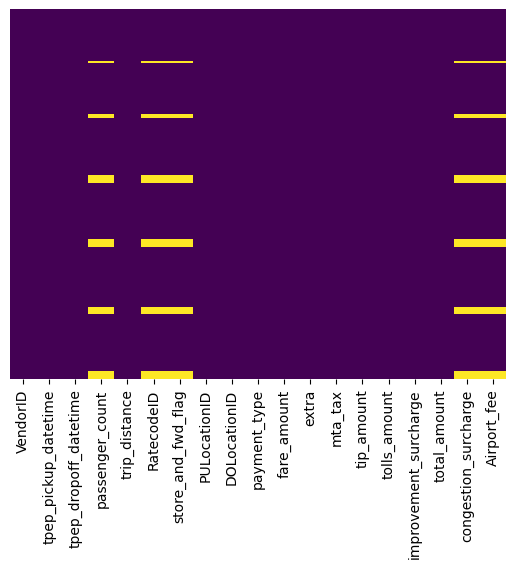

In [196]:
sns.heatmap(trips.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

For Location IDs, numbers **264** and **265** menas outside the NYC or Unknown, to only focus on the NYC, we remove these points from the data.

In [17]:
trips.dropna(inplace=True)
trips = trips[~trips['PULocationID'].isin([264, 265]) & ~trips['DOLocationID'].isin([264, 265])]
trips.reset_index(drop=True, inplace=True)

In [18]:
trips.shape

(18152913, 19)

In [200]:
#trips.to_csv('trips.csv', index=None)

### Sampling the data

To streamline the analysis and improve computational efficiency, we sample 1 million data points from the database. This subset is selected to ensure it is representative of the overall dataset, enabling us to conduct practice and exploratory tasks effectively without processing the entire database.

In [19]:
lyft = trips.sample(n=2000000, random_state=100)

In [857]:
lyft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 6277555 to 1438485
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee          

### Check the Duplicate rows

In [860]:
lyft[lyft.duplicated]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [207]:
#lyft.to_csv('lyft_trips.csv', index=None)

In [208]:
lyft.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
6277555          2  2024-03-07 20:43:45   2024-03-07 20:57:34   
12331145         2  2024-05-05 20:52:26   2024-05-05 21:00:34   
3506583          1  2024-02-08 13:36:34   2024-02-08 14:17:12   
15021017         1  2024-05-31 17:41:44   2024-05-31 17:54:36   
6385001          1  2024-03-08 20:04:23   2024-03-08 20:20:39   

          passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
6277555               1.0           2.33         1.0                  N   
12331145              1.0           0.90         1.0                  N   
3506583               1.0           8.30        99.0                  N   
15021017              1.0           1.10         1.0                  N   
6385001               1.0           1.00         1.0                  N   

          PULocationID  DOLocationID  payment_type  fare_amount  extra  \
6277555            142           262             1         14.9    1.0   
12331145            97           181             1          9.3    1.0   
3506583             49           140             1         31.5    0.0   
15021017           161           170             1         12.1    5.0   
6385001            230           170             1         13.5    3.5   

          mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
6277555       0.5        3.98           0.0                    1.0   
12331145      0.5        1.00           0.0                    1.0   
3506583       0.5        0.00           0.0                    1.0   
15021017      0.5        1.30           0.0                    1.0   
6385001       0.5        3.70           0.0                    1.0   

          total_amount  congestion_surcharge  Airport_fee  
6277555          23.88                   2.5          0.0  
12331145         12.80                   0.0          0.0  
3506583          33.00                   0.0          0.0  
15021017         19.90                   2.5          0.0  
6385001          22.20                   2.5          0.0

In [209]:
lyft.shape

(2000000, 19)

### Converting the Time Data

In [23]:
lyft['tpep_pickup_datetime'] = pd.to_datetime(lyft['tpep_pickup_datetime'])
lyft['tpep_dropoff_datetime'] = pd.to_datetime(lyft['tpep_dropoff_datetime'])

In [25]:
lyft['duration'] = (lyft['tpep_dropoff_datetime']-lyft['tpep_pickup_datetime'])/ np.timedelta64(1,'m')

In [27]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June']

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

lyft['hour'] = lyft['tpep_pickup_datetime'].dt.hour
lyft['day'] = lyft['tpep_pickup_datetime'].dt.day_name()
lyft['day'] = pd.Categorical(lyft['day'], categories=day_order, ordered=True)

lyft['month'] = lyft['tpep_pickup_datetime'].dt.month_name()
lyft['month'] = pd.Categorical(lyft['month'], categories=month_order, ordered=True)

lyft['year'] = lyft['tpep_pickup_datetime'].dt.year
lyft['weekday'] = lyft['tpep_pickup_datetime'].dt.weekday
lyft['week'] = lyft['tpep_pickup_datetime'].dt.strftime('W%V')
lyft["Period"] = lyft['tpep_dropoff_datetime'].dt.strftime("%p")

#### Create time of day columns
We define a function that converts the hour to a time period. This allows us to explore the fare amount and the number of trips in each time period.

In [29]:
# Define a function to check if a given time is during rush hour
def get_time_period(time):
    """
    Divides the day into four time periods based on the hour of the day.
    
    Parameters:
        hour (int): The hour in 24-hour format (0-23).
    
    Returns:
        str: The time period (am_rush_hour, day_time, pm_rush_hour, night_time).
    """
    if 6 <= time.hour < 10:
        return 'am_rush'
    elif 10 <= time.hour < 16:
        return 'day_time'
    elif 16 <= time.hour < 19:
        return 'pm_rush'
    else:
        return 'night_time'

In [30]:
# Apply the function to the time column to create the 'rush_hour' column
lyft['time_period'] = lyft['tpep_pickup_datetime'].apply(get_time_period)
lyft.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
6277555          2  2024-03-07 20:43:45   2024-03-07 20:57:34   
12331145         2  2024-05-05 20:52:26   2024-05-05 21:00:34   
3506583          1  2024-02-08 13:36:34   2024-02-08 14:17:12   
15021017         1  2024-05-31 17:41:44   2024-05-31 17:54:36   
6385001          1  2024-03-08 20:04:23   2024-03-08 20:20:39   

          passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
6277555               1.0           2.33         1.0                  N   
12331145              1.0           0.90         1.0                  N   
3506583               1.0           8.30        99.0                  N   
15021017              1.0           1.10         1.0                  N   
6385001               1.0           1.00         1.0                  N   

          PULocationID  DOLocationID  payment_type  fare_amount  extra  \
6277555            142           262             1         14.9    1.0   
12331145            97           181             1          9.3    1.0   
3506583             49           140             1         31.5    0.0   
15021017           161           170             1         12.1    5.0   
6385001            230           170             1         13.5    3.5   

          mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
6277555       0.5        3.98           0.0                    1.0   
12331145      0.5        1.00           0.0                    1.0   
3506583       0.5        0.00           0.0                    1.0   
15021017      0.5        1.30           0.0                    1.0   
6385001       0.5        3.70           0.0                    1.0   

          total_amount  congestion_surcharge  Airport_fee   duration  hour  \
6277555          23.88                   2.5          0.0  13.816667    20   
12331145         12.80                   0.0          0.0   8.133333    20   
3506583          33.00                   0.0          0.0  40.633333    13   
15021017         19.90                   2.5          0.0  12.866667    17   
6385001          22.20                   2.5          0.0  16.266667    20   

               day     month  year  weekday week Period time_period  
6277555   Thursday     March  2024        3  W10     PM  night_time  
12331145    Sunday       May  2024        6  W18     PM  night_time  
3506583   Thursday  February  2024        3  W06     PM    day_time  
15021017    Friday       May  2024        4  W22     PM     pm_rush  
6385001     Friday     March  2024        4  W10     PM  night_time

### Data Cleaning

In [32]:
lyft.describe().T

count                        mean  \
VendorID               2000000.0                    1.759764   
tpep_pickup_datetime     2000000  2024-04-03 09:42:29.080099   
tpep_dropoff_datetime    2000000  2024-04-03 09:59:16.574135   
passenger_count        2000000.0                    1.332756   
trip_distance          2000000.0                    3.336763   
RatecodeID             2000000.0                    2.223362   
PULocationID           2000000.0                  165.117858   
DOLocationID           2000000.0                  163.677335   
payment_type           2000000.0                    1.219375   
fare_amount            2000000.0                   18.409881   
extra                  2000000.0                    1.550156   
mta_tax                2000000.0                    0.481907   
tip_amount             2000000.0                    3.508273   
tolls_amount           2000000.0                    0.557639   
improvement_surcharge  2000000.0                    0.968168   
total_amount           2000000.0                   27.317416   
congestion_surcharge   2000000.0                    2.260751   
Airport_fee            2000000.0                    0.140767   
duration               2000000.0                   16.791567   
hour                   2000000.0                   14.347574   
year                   2000000.0                 2023.999951   
weekday                2000000.0                    3.008305   

                                       min                         25%  \
VendorID                               1.0                         2.0   
tpep_pickup_datetime   2002-12-31 22:19:28  2024-02-19 11:04:25.250000   
tpep_dropoff_datetime  2002-12-31 23:05:41  2024-02-19 11:19:18.500000   
passenger_count                        0.0                         1.0   
trip_distance                          0.0                         1.0   
RatecodeID                             1.0                         1.0   
PULocationID                           1.0                       132.0   
DOLocationID                           1.0                       114.0   
payment_type                           1.0                         1.0   
fare_amount                         -700.0                         8.6   
extra                                 -7.5                         0.0   
mta_tax                               -0.5                         0.5   
tip_amount                           -90.0                         1.0   
tolls_amount                        -55.55                         0.0   
improvement_surcharge                 -1.0                         1.0   
total_amount                       -695.75                        15.6   
congestion_surcharge                  -2.5                         2.5   
Airport_fee                          -1.75                         0.0   
duration                        -46.116667                         7.4   
hour                                   0.0                        11.0   
year                                2002.0                      2024.0   
weekday                                0.0                         1.0   

                                              50%                         75%  \
VendorID                                      2.0                         2.0   
tpep_pickup_datetime   2024-04-04 16:55:16.500000         2024-05-17 14:57:21   
tpep_dropoff_datetime  2024-04-04 17:14:57.500000  2024-05-17 15:19:13.500000   
passenger_count                               1.0                         1.0   
trip_distance                                 1.7                        3.18   
RatecodeID                                    1.0                         1.0   
PULocationID                                162.0                       233.0   
DOLocationID                                162.0                       234.0   
payment_type                                  1.0                         1.0   
fare_amount                              



There are some negative numbers in the dataset for the amount columns. We need to apply the absolute function to make them positive.

In [34]:
lyft['total_amount'] = lyft['total_amount'].apply(abs)
lyft['fare_amount'] = lyft['fare_amount'].apply(abs)
lyft['extra'] = lyft['extra'].apply(abs)
lyft['mta_tax'] =lyft['mta_tax'].apply(abs)
lyft['tip_amount'] = lyft['tip_amount'].apply(abs)
lyft['tolls_amount'] = lyft['tolls_amount'].apply(abs)
lyft['improvement_surcharge'] = lyft['improvement_surcharge'].apply(abs)
lyft['congestion_surcharge'] = lyft['congestion_surcharge'].apply(abs)
lyft['Airport_fee'] = lyft['Airport_fee'].apply(abs)


The data should be from 2024; any dates outside 2024 will be removed from the dataset. Additionally, Ratecode 99 indicates ‘Unknown,’ so we will exclude those entries. Trips with a minimum of zero passengers will also be removed from the dataset.

In [36]:
lyft = lyft.loc[lyft['year'] ==2024]
lyft = lyft.loc[lyft['passenger_count'] > 0]
lyft = lyft.loc[lyft['RatecodeID'] != 99]

In [37]:
lyft.describe().T

count                        mean  \
VendorID               1953073.0                     1.77798   
tpep_pickup_datetime     1953073  2024-04-03 09:14:58.145299   
tpep_dropoff_datetime    1953073  2024-04-03 09:31:23.902242   
passenger_count        1953073.0                    1.352671   
trip_distance          1953073.0                    3.224288   
RatecodeID             1953073.0                    1.068342   
PULocationID           1953073.0                   165.59927   
DOLocationID           1953073.0                  164.114613   
payment_type           1953073.0                    1.221849   
fare_amount            1953073.0                    18.83124   
extra                  1953073.0                    1.575527   
mta_tax                1953073.0                    0.495362   
tip_amount             1953073.0                    3.556767   
tolls_amount           1953073.0                    0.566024   
improvement_surcharge  1953073.0                    0.999795   
total_amount           1953073.0                   27.974279   
congestion_surcharge   1953073.0                    2.345937   
Airport_fee            1953073.0                    0.150284   
duration               1953073.0                   16.429282   
hour                   1953073.0                   14.392881   
year                   1953073.0                      2024.0   
weekday                1953073.0                    3.014722   

                                       min                  25%  \
VendorID                               1.0                  2.0   
tpep_pickup_datetime   2024-01-01 00:00:42  2024-02-19 07:07:23   
tpep_dropoff_datetime  2024-01-01 00:03:11  2024-02-19 07:19:36   
passenger_count                        1.0                  1.0   
trip_distance                          0.0                  1.0   
RatecodeID                             1.0                  1.0   
PULocationID                           1.0                132.0   
DOLocationID                           1.0                114.0   
payment_type                           1.0                  1.0   
fare_amount                            0.0                  9.3   
extra                                  0.0                  0.0   
mta_tax                                0.0                  0.5   
tip_amount                             0.0                  1.0   
tolls_amount                           0.0                  0.0   
improvement_surcharge                  0.0                  1.0   
total_amount                           0.0                 15.7   
congestion_surcharge                   0.0                  2.5   
Airport_fee                            0.0                  0.0   
duration                         -0.833333             7.366667   
hour                                   0.0                 11.0   
year                                2024.0               2024.0   
weekday                                0.0                  1.0   

                                       50%                  75%  \
VendorID                               2.0                  2.0   
tpep_pickup_datetime   2024-04-04 16:25:26  2024-05-17 15:10:36   
tpep_dropoff_datetime  2024-04-04 16:46:38  2024-05-17 15:32:16   
passenger_count                        1.0                  1.0   
trip_distance                         1.69                 3.11   
RatecodeID                             1.0                  1.0   
PULocationID                         162.0                234.0   
DOLocationID                         162.0                234.0   
payment_type                           1.0                  1.0   
fare_amount                           12.8                 20.5   
extra                                  1.0                  2.5   
mta_tax                                0.5                  0.5   
tip_amount                            2.86                  4.4   
tolls_amount                           0.0                  0.0   
improve

#### Data Range
To ensure the data is suitable for our machine learning models, we need to use an acceptable range of values. Therefore, we will include only data where the distance is greater than zero, the fare amount is greater than zero, and the trip duration is between zero and 120 minutes.

In [39]:
print(sum(lyft['trip_distance']==0) , sum(lyft['fare_amount']==0) , sum(lyft['duration'] == 0))

22617 493 15


In [40]:
lyft.shape

(1953073, 28)

In [41]:
sorted(set(lyft['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, there are 22617 zero values in the data which pose a problem. So we remove those data points. Also, we change the trip distances to feet.


In [43]:
lyft = lyft.loc[lyft['trip_distance'] > 0]
lyft = lyft.loc[lyft['fare_amount']>0]
lyft = lyft.loc[(lyft['duration'] < 120) & (lyft['duration'] > 0)]
lyft = lyft.loc[lyft['passenger_count'] <= 6]

In [44]:
lyft.describe().T

count                        mean  \
VendorID               1928609.0                    1.778418   
tpep_pickup_datetime     1928609  2024-04-03 08:59:34.186889   
tpep_dropoff_datetime    1928609  2024-04-03 09:15:17.928590   
passenger_count        1928609.0                    1.351989   
trip_distance          1928609.0                    3.258896   
RatecodeID             1928609.0                     1.05428   
PULocationID           1928609.0                  165.726621   
DOLocationID           1928609.0                  164.234504   
payment_type           1928609.0                    1.213745   
fare_amount            1928609.0                   18.716419   
extra                  1928609.0                    1.583166   
mta_tax                1928609.0                     0.49702   
tip_amount             1928609.0                    3.560669   
tolls_amount           1928609.0                    0.565699   
improvement_surcharge  1928609.0                    0.999909   
total_amount           1928609.0                   27.879515   
congestion_surcharge   1928609.0                    2.357162   
Airport_fee            1928609.0                    0.149387   
duration               1928609.0                   15.729028   
hour                   1928609.0                   14.403613   
year                   1928609.0                      2024.0   
weekday                1928609.0                    3.013932   

                                       min                  25%  \
VendorID                               1.0                  2.0   
tpep_pickup_datetime   2024-01-01 00:00:42  2024-02-19 07:27:02   
tpep_dropoff_datetime  2024-01-01 00:03:11  2024-02-19 07:36:38   
passenger_count                        1.0                  1.0   
trip_distance                         0.01                 1.01   
RatecodeID                             1.0                  1.0   
PULocationID                           1.0                132.0   
DOLocationID                           1.0                114.0   
payment_type                           1.0                  1.0   
fare_amount                           0.01                  9.3   
extra                                  0.0                  0.0   
mta_tax                                0.0                  0.5   
tip_amount                             0.0                  1.0   
tolls_amount                           0.0                  0.0   
improvement_surcharge                  0.0                  1.0   
total_amount                           0.1                 15.7   
congestion_surcharge                   0.0                  2.5   
Airport_fee                            0.0                  0.0   
duration                          0.016667             7.466667   
hour                                   0.0                 11.0   
year                                2024.0               2024.0   
weekday                                0.0                  1.0   

                                       50%                  75%  \
VendorID                               2.0                  2.0   
tpep_pickup_datetime   2024-04-04 16:04:59  2024-05-17 14:50:17   
tpep_dropoff_datetime  2024-04-04 16:25:05  2024-05-17 15:11:41   
passenger_count                        1.0                  1.0   
trip_distance                          1.7                 3.15   
RatecodeID                             1.0                  1.0   
PULocationID                         162.0                234.0   
DOLocationID                         162.0                234.0   
payment_type                           1.0                  1.0   
fare_amount                           12.8                 20.5   
extra                                  1.0                  2.5   
mta_tax                                0.5                  0.5   
tip_amount                            2.88                  4.4   
tolls_amount                           0.0                  0.0   
improve

### Outliers

We look at the boxplot of the some of the data and see the outliers.

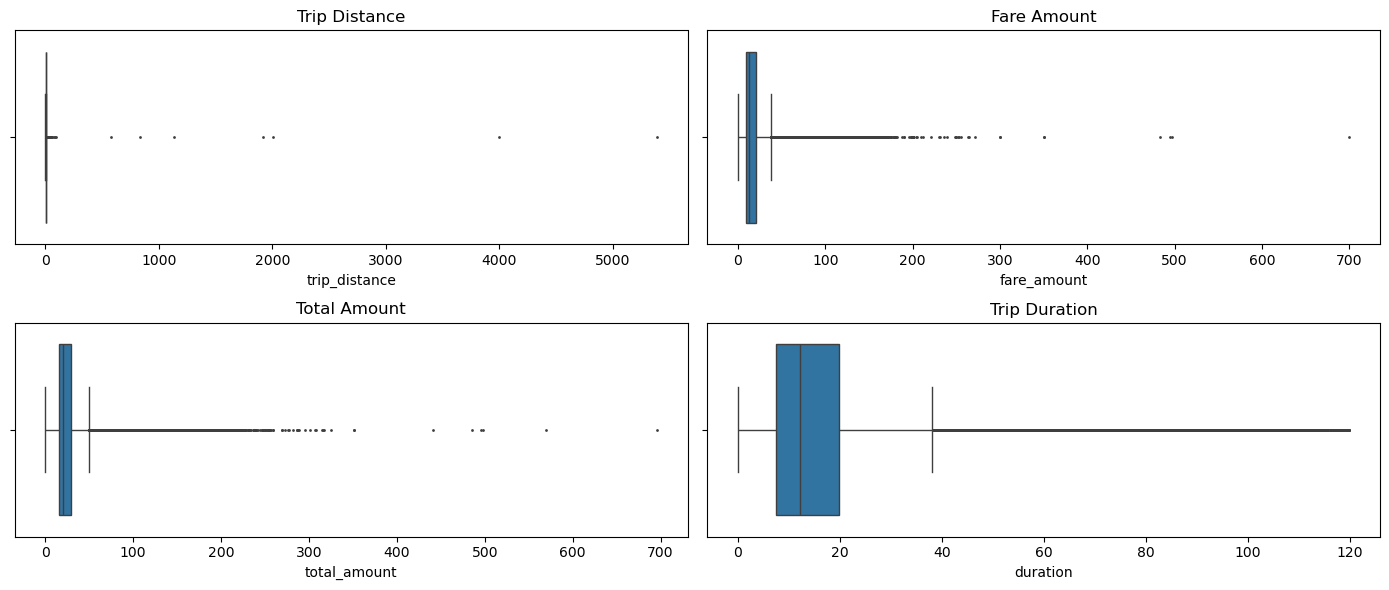

In [47]:
fig, axes = plt.subplots(2,2, figsize=(14,6))

axes= axes.flatten()
sns.boxplot(x=lyft['trip_distance'], ax=axes[0], fliersize=1)
axes[0].set_title('Trip Distance')

sns.boxplot(x=lyft['fare_amount'], ax= axes[1], fliersize=1)
axes[1].set_title('Fare Amount')


sns.boxplot(x=lyft['total_amount'], ax= axes[2], fliersize=1)
axes[2].set_title('Total Amount')

sns.boxplot(x=lyft['duration'], ax= axes[3], fliersize=1)
axes[3].set_title('Trip Duration')



plt.tight_layout()
plt.show()

There are a lot of outliers, we want to impute those outliers by changing the maximum value to  `Q3 + (10 * IQR)`.

In [49]:
### YOUR CODE HERE ###
def outlier_imputer (df, column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for column in column_list:
        # Reassign minimum to zero
        df.loc[df[column]< 0 , column] = 0

        # Calculate upper threshold
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)

        # Reassign values > threshold to threshold
        df.loc[df[column] > upper_threshold , column] = upper_threshold

In [50]:
outlier_imputer(lyft,['fare_amount'], 10)
outlier_imputer(lyft,['total_amount'], 10)
outlier_imputer(lyft,['trip_distance'], 10)
outlier_imputer(lyft,['tip_amount'], 10)

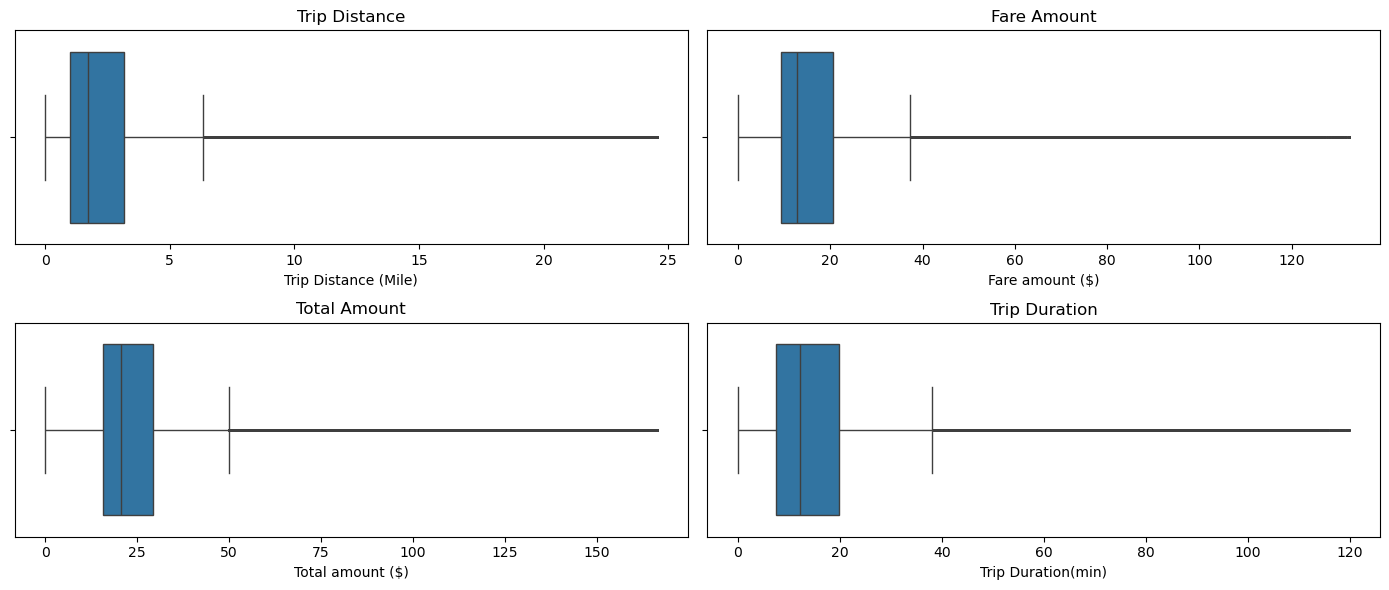

In [51]:
fig, axes = plt.subplots(2,2, figsize=(14,6))

axes= axes.flatten()
sns.boxplot(x=lyft['trip_distance'], ax=axes[0], fliersize=1)
axes[0].set(title= 'Trip Distance' , xlabel ='Trip Distance (Mile)' )

sns.boxplot(x=lyft['fare_amount'], ax= axes[1], fliersize=1)
axes[1].set(title = 'Fare Amount', xlabel ='Fare amount (\$)')


sns.boxplot(x=lyft['total_amount'], ax= axes[2], fliersize=1)
axes[2].set(title = 'Total Amount', xlabel ='Total amount (\$)')

sns.boxplot(x=lyft['duration'], ax= axes[3], fliersize=1)
axes[3].set(title='Trip Duration', xlabel = 'Trip Duration(min)')



plt.tight_layout()
plt.show()

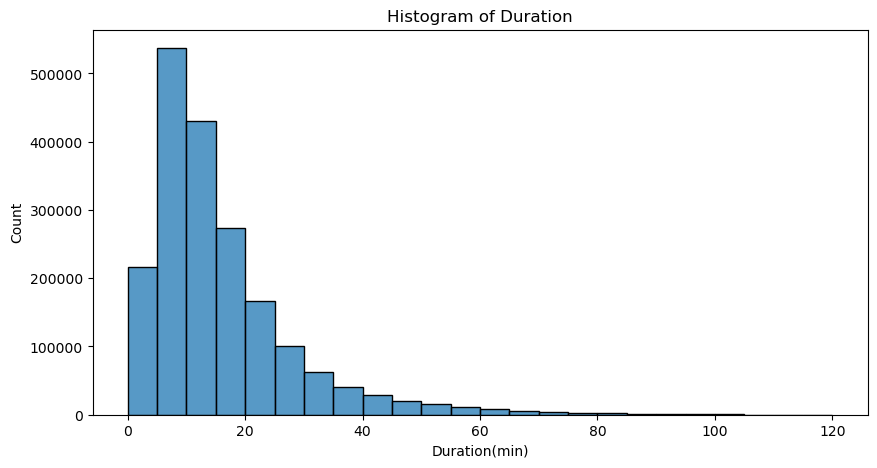

In [239]:
plt.figure(figsize=(10,5))
sns.histplot(lyft['duration'], bins=range(0,121,5))
plt.xlabel('Duration(min)')
plt.title('Histogram of Duration')
plt.show()

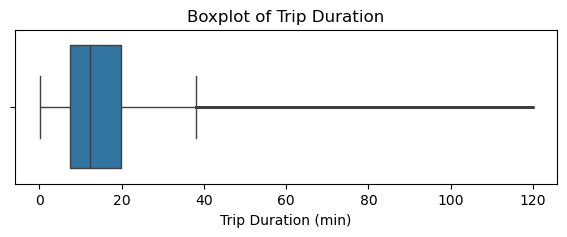

The lower limit is  0.00, and the upper limit is  38.17


In [240]:
plt.figure(figsize=(7,2))
sns.boxplot(x= lyft['duration'], fliersize=1)
plt.xlabel('Trip Duration (min)')
plt.title('Boxplot of Trip Duration')
plt.show()

# Calculate 25th percentile 
percentile25 = lyft['duration'].quantile(0.25)

# Calculate 75th percentile
percentile75 = lyft['duration'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print(f'The lower limit is {max(lower_limit,0): .2f}, and the upper limit is {upper_limit: .2f}')



#### Drop the irrelevant columns

We remove the columns that are not needed for our machine learning practice, as well as those from which we derive other features.

In [62]:
lyft=lyft.drop(['tpep_dropoff_datetime','tpep_pickup_datetime','store_and_fwd_flag',
                'extra','mta_tax','improvement_surcharge','congestion_surcharge',
                'Airport_fee','hour','year','weekday'],axis=1)

## Exploratory Data Analysis (EDA)

In [65]:
numeric_variables = ['total_amount',
 'trip_distance',
 'duration',
 'fare_amount',
 'tip_amount',
 'passenger_count',
 'tolls_amount']

In [67]:
lyft[numeric_variables]=lyft[numeric_variables].astype('float')
lyft['passenger_count']= lyft['passenger_count'].astype('int')

In [903]:
lyft[numeric_variables].describe().T

count       mean        std       min        25%  \
total_amount     1928609.0  27.870437  21.055519  0.100000  15.700000   
trip_distance    1928609.0   3.244549   4.194175  0.010000   1.010000   
duration         1928609.0  15.729028  12.549179  0.016667   7.466667   
fare_amount      1928609.0  18.710509  16.277174  0.010000   9.300000   
tip_amount       1928609.0   3.555577   3.770803  0.000000   1.000000   
passenger_count  1928609.0   1.351989   0.824513  1.000000   1.000000   
tolls_amount     1928609.0   0.565699   2.107906  0.000000   0.000000   

                       50%    75%     max  
total_amount     20.550000  29.40  166.40  
trip_distance     1.700000   3.15   24.55  
duration         12.183333  19.75  119.95  
fare_amount      12.800000  20.50  132.50  
tip_amount        2.880000   4.40   38.40  
passenger_count   1.000000   1.00    6.00  
tolls_amount      0.000000   0.00  185.00

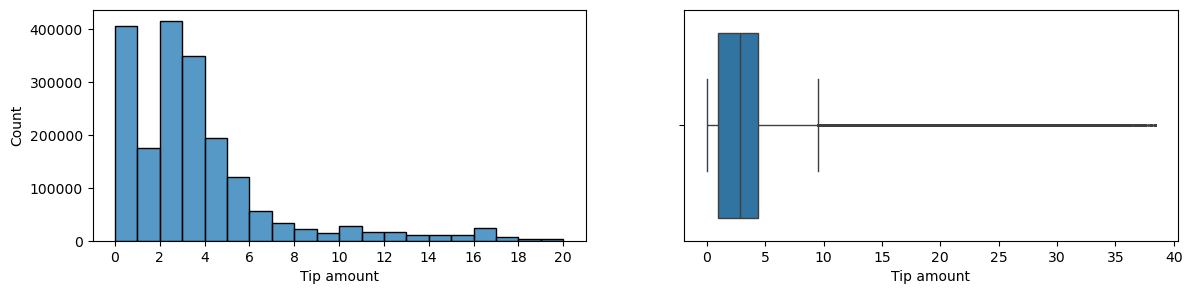

In [255]:
fig, axes = plt.subplots(1,2, figsize=(14,3))

sns.histplot(lyft['tip_amount'] , ax= axes[0] , bins=range(0,21,1))
axes[0].set(xlabel="Tip amount")
axes[0].set_xticks(range(0,21,2))
axes[0].set_xticklabels(range(0,21,2))

sns.boxplot(x=lyft['tip_amount'] , ax = axes[1] ,fliersize=1)
axes[1].set(xlabel="Tip amount")

plt.show()

**tip_amount by vendor**

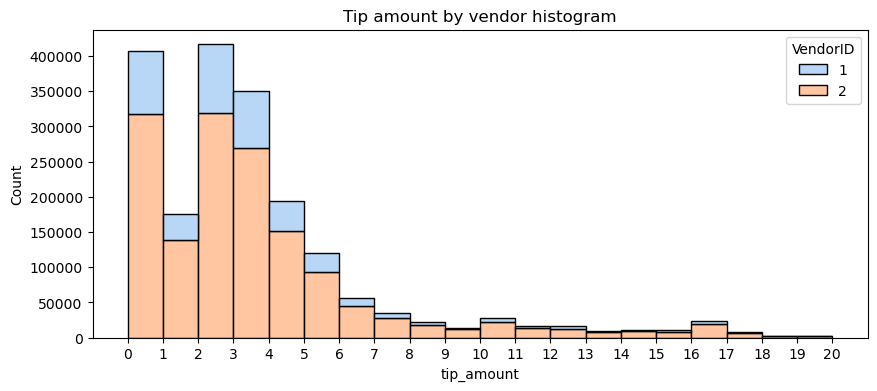

In [257]:
plt.figure(figsize=(10,4))
ax = sns.histplot(data=lyft, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

Separating the tip amount by vendor reveals that there are no noticeable aberrations in the distribution of tips between the two vendors in the dataset. Vendor two has a slightly higher share of the rides, and this proportion is approximately maintained for all tip amounts.

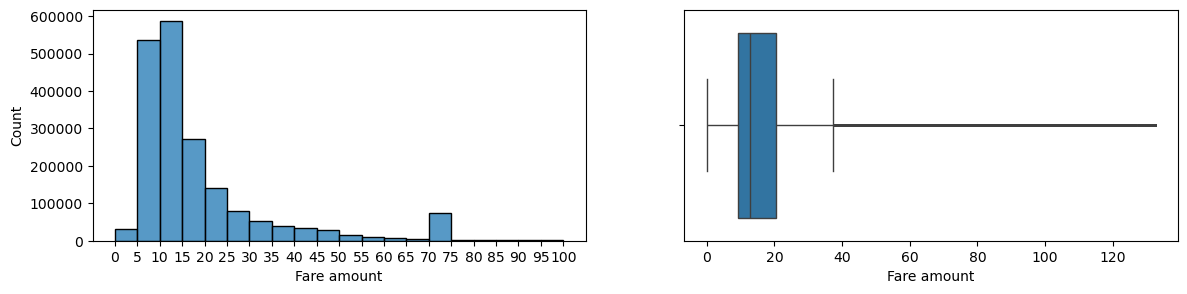

In [259]:
fig, axes = plt.subplots(1,2, figsize=(14,3))

sns.histplot(lyft['fare_amount'] , ax= axes[0] , bins=range(0,101,5))
axes[0].set(xlabel="Fare amount")
axes[0].set_xticks(range(0,101,5))
axes[0].set_xticklabels(range(0,101,5))

sns.boxplot(x=lyft['fare_amount'] , ax = axes[1] ,fliersize=1)
axes[1].set(xlabel="Fare amount")

plt.show()

**fare_amount by vendor**

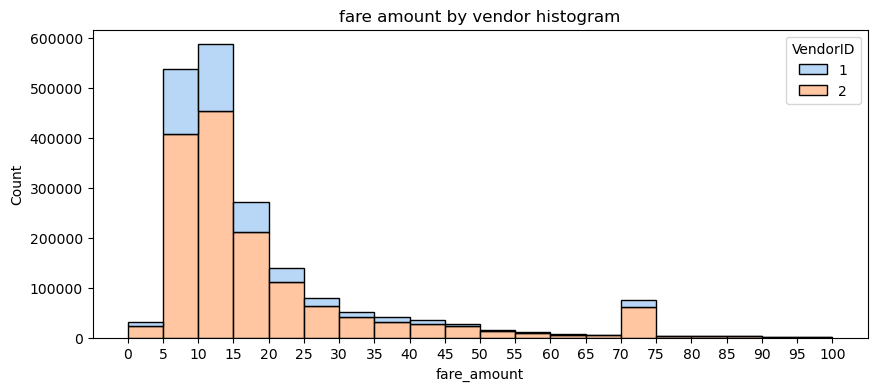

In [261]:
plt.figure(figsize=(10,4))
ax = sns.histplot(data=lyft, x='fare_amount', bins=range(0,101,5), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,101,5))
ax.set_xticklabels(range(0,101,5))
plt.title('fare amount by vendor histogram');

Separating the fare amount by vendor reveals that there are no noticeable aberrations in the distribution of fares between the two vendors in the dataset. Vendor two has a slightly higher share of the rides, and this proportion is approximately maintained for all fare amounts.

**Mean tips by passenger count**

In [264]:
pd.DataFrame({
    'count': lyft['passenger_count'].value_counts(),
    'normalized': lyft['passenger_count'].value_counts(normalize=True)
})

count  normalized
passenger_count                     
1                1505777    0.780758
2                 285735    0.148156
3                  65360    0.033890
4                  38034    0.019721
5                  20222    0.010485
6                  13481    0.006990

Approximately 79% of the trips are single occupancy, and 15% have two people, making up about 94% of the dataset.

In [266]:
#mean tips by passenger_count
mean_tips_by_passenger_count = lyft.groupby(by='passenger_count').mean(numeric_only=True)['tip_amount'].reset_index()
mean_tips_by_passenger_count

passenger_count  tip_amount
0                1    3.507303
1                2    3.816315
2                3    3.591721
3                4    3.507949
4                5    3.535708
5                6    3.410131

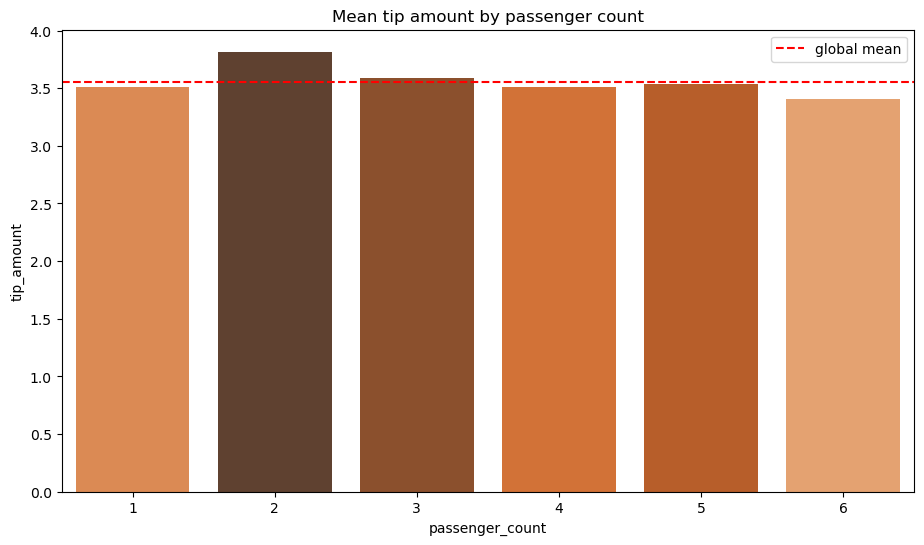

In [385]:
plt.figure(figsize=(11,6))
pal = sns.color_palette("Oranges_d", len(mean_tips_by_passenger_count))
rank = mean_tips_by_passenger_count['tip_amount'].argsort().argsort()
ax= sns.barplot(data= mean_tips_by_passenger_count, x='passenger_count', y='tip_amount',palette=np.array(pal[:])[rank])
ax.axhline(lyft['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean tip amount by passenger count', fontsize=12);

Mean tip amount varies very little by passenger count. It is slightly higher for two-passenger rides, but it is not noticeable.

**Total ride count by month**

In [383]:
#total number of rides for each month

monthly_rides= lyft.groupby(by='month').count()['total_amount'].reset_index(name='counts')
monthly_rides

month  counts
0   January  297966
1  February  296757
2     March  331443
3     April  325592
4       May  348377
5      June  328474

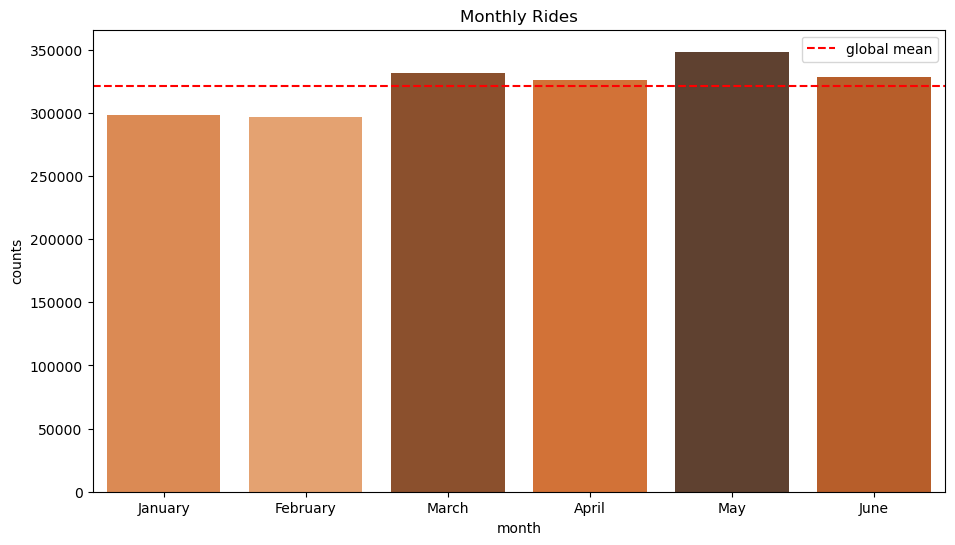

In [369]:
# Bar plot of total rides per month
plt.figure(figsize=(11,6))
pal =sns.color_palette("Oranges_d", len(monthly_rides))
rank= monthly_rides['counts'].argsort().argsort()
ax= sns.barplot(data = monthly_rides, 
                x='month' , y='counts',
                palette=np.array(pal[:])[rank])
ax.axhline(monthly_rides['counts'].mean(), ls='--', color='red', label='global mean')
ax.legend()
ax.set(title="Monthly Rides");

Monthly rides are fairly consistent, with notable dips in the January and February.

**Total revenue by month**

In [374]:
monthly_revenue= lyft.groupby(by='month').sum(numeric_only=True)['total_amount'].reset_index(name='revenue').sort_values(by='month')
monthly_revenue

month      revenue
0   January   8005272.47
1  February   7970823.57
2     March   9218053.50
3     April   9173659.56
4       May  10040478.52
5      June   9342887.61

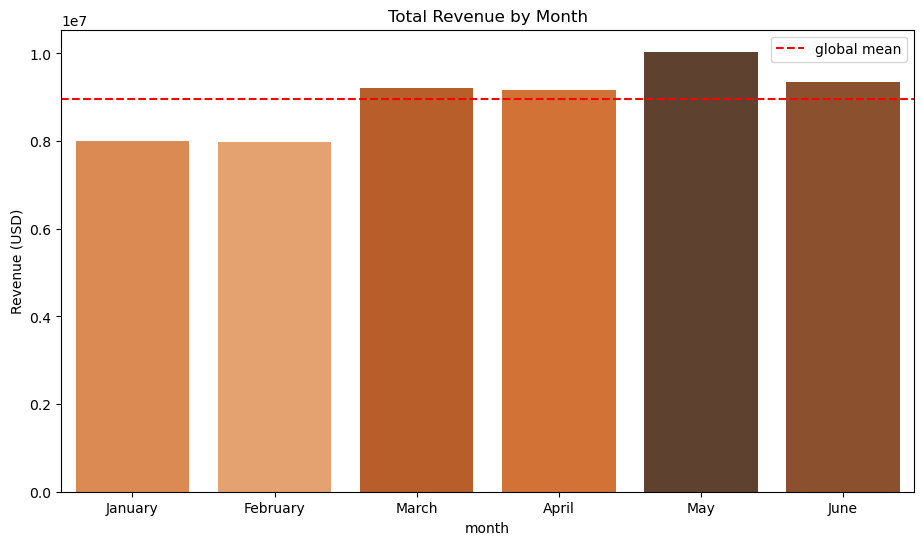

In [429]:
plt.figure(figsize=(11,6))
pal =sns.color_palette("Oranges_d", len(monthly_revenue))
rank= monthly_revenue['revenue'].argsort().argsort()
ax= sns.barplot(data = monthly_revenue, 
                x='month' , y='revenue',
                palette=np.array(pal[:])[rank])
ax.axhline(monthly_revenue['revenue'].mean(), ls='--', color='red', label='global mean')
ax.legend()
ax.set_ylabel('Revenue (USD)')
ax.set(title="Total Revenue by Month");

Monthly revenue generally follows the pattern of monthly rides.

**Total ride count by Week**

In [394]:
weekly_rides= lyft.groupby(by='week').count()['total_amount'].reset_index(name='counts').sort_values(by='week')
#weekly_rides

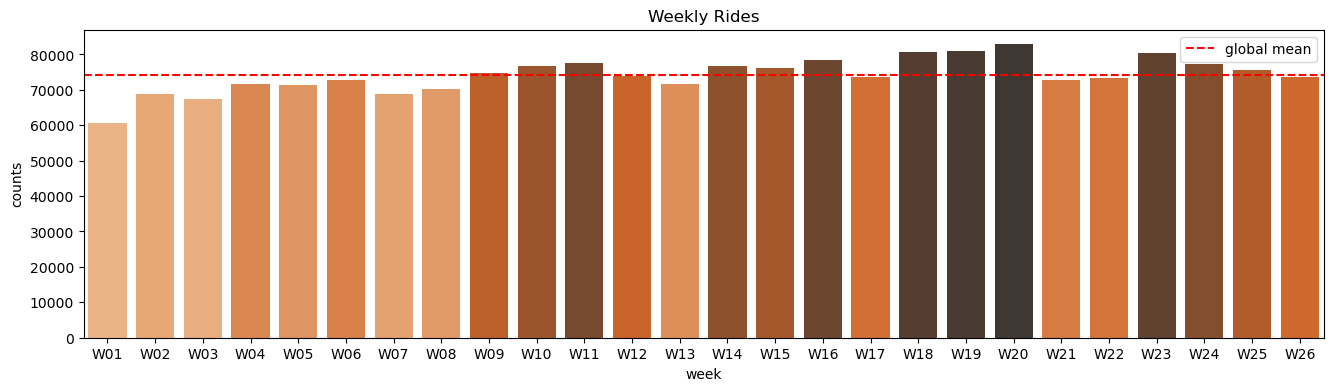

In [407]:
plt.figure(figsize=(16,4))
pal =sns.color_palette("Oranges_d", len(weekly_rides))
rank= weekly_rides['counts'].argsort().argsort()
ax= sns.barplot(data = weekly_rides, 
                x='week' , y='counts',
                palette=np.array(pal[:])[rank])
ax.axhline(weekly_rides['counts'].mean(), ls='--', color='red', label='global mean')
ax.legend()
ax.set(title="Weekly Rides");

**Total revenue by Week**

In [411]:
weekly_revenue= lyft.groupby(by='week').sum(numeric_only=True)['total_amount'].reset_index(name='revenue').sort_values(by='week')
#weekly_revenue

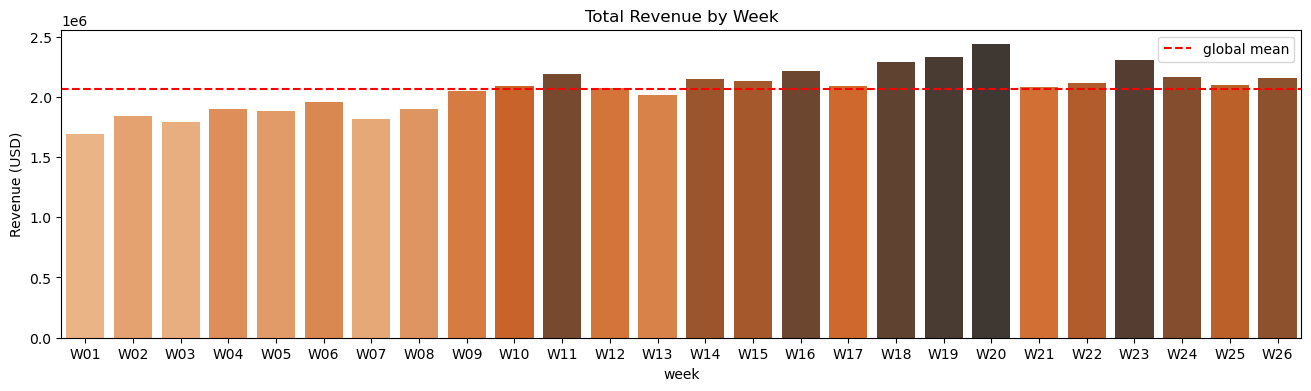

In [431]:
plt.figure(figsize=(16,4))
pal =sns.color_palette("Oranges_d", len(weekly_revenue))
rank= weekly_revenue['revenue'].argsort().argsort()
ax= sns.barplot(data = weekly_revenue, 
                x='week' , y='revenue',
                palette=np.array(pal[:])[rank])
ax.axhline(weekly_revenue['revenue'].mean(), ls='--', color='red', label='global mean')
ax.legend()
ax.set_ylabel('Revenue (USD)')
ax.set(title="Total Revenue by Week");

Weekly revenue generally follows the pattern of weekly rides.

**Total ride count by day**

In [415]:
# Bar plot of total rides by day and time
daily_rides= lyft.groupby(by='day').count()['total_amount'].reset_index(name='counts').sort_values(by='day')
daily_rides

day  counts
0     Monday  237228
1    Tuesday  273764
2  Wednesday  293208
3   Thursday  308747
4     Friday  289466
5   Saturday  288765
6     Sunday  237431

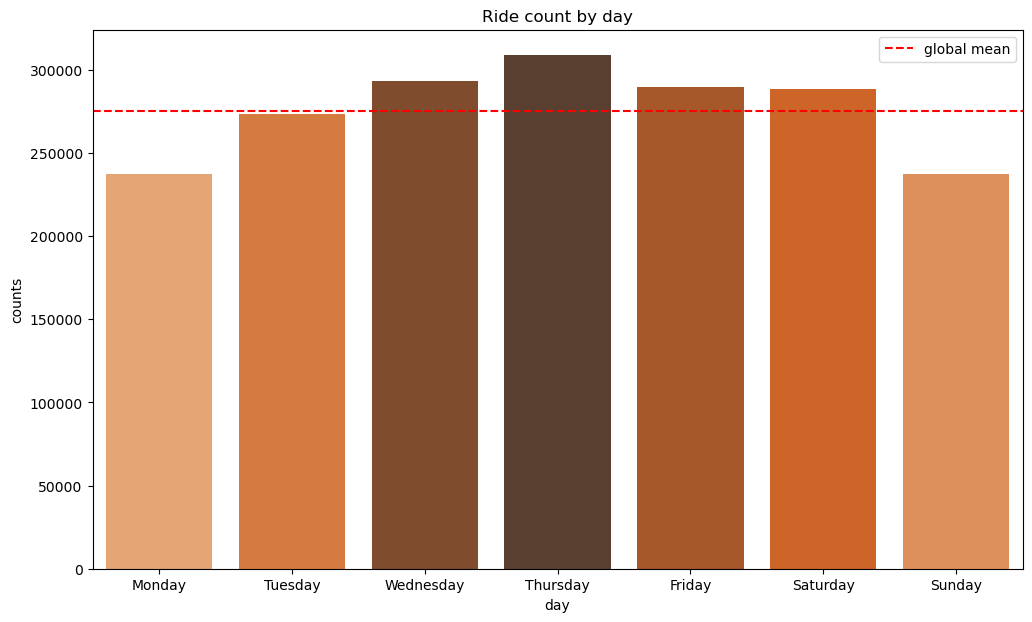

In [417]:
# Create bar plot for ride count by day

plt.figure(figsize=(12,7))
pal =sns.color_palette("Oranges_d", len(daily_rides))
rank= daily_rides['counts'].argsort().argsort()
ax= sns.barplot(data = daily_rides, 
                x='day' , y='counts',
                palette=np.array(pal[:])[rank])
ax.axhline(daily_rides['counts'].mean(), ls='--', color='red', label='global mean')
ax.legend()
ax.set(title="Ride count by day");

Suprisingly, Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.

**Total revenue by day of the week**

In [421]:
total_amount_day= lyft.groupby(by='day').sum(numeric_only=True)['total_amount'].reset_index(name='revenue').sort_values(by='day')
total_amount_day

day     revenue
0     Monday  6901324.10
1    Tuesday  7661903.51
2  Wednesday  8155985.05
3   Thursday  8774079.73
4     Friday  8054438.88
5   Saturday  7440346.47
6     Sunday  6763097.49

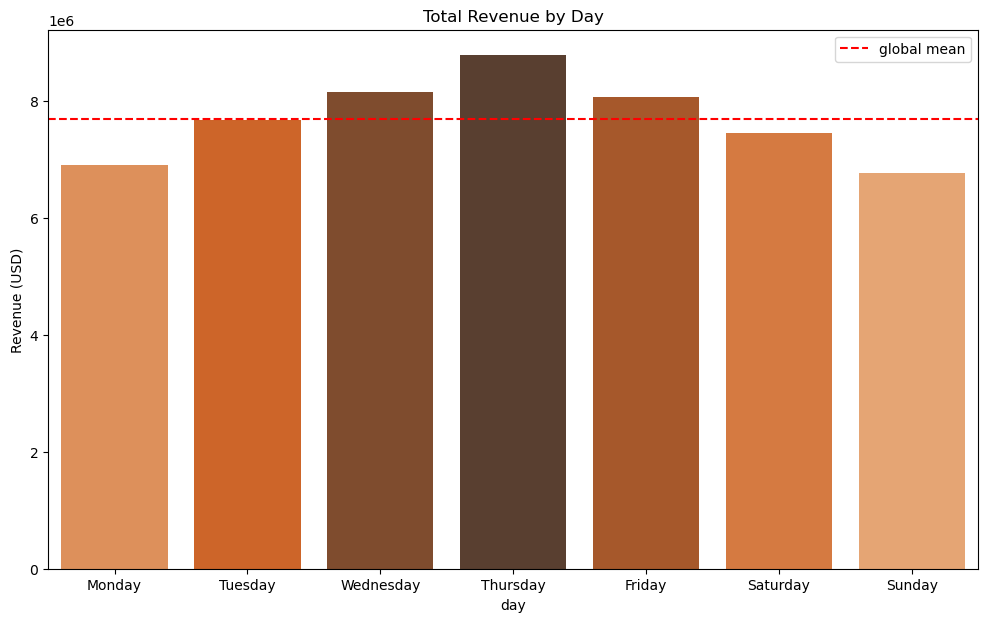

In [433]:
# Create bar plot of total revenue by day

plt.figure(figsize=(12,7))
pal =sns.color_palette("Oranges_d", len(total_amount_day))
rank= total_amount_day['revenue'].argsort().argsort()
ax= sns.barplot(data = total_amount_day, 
                x='day' , y='revenue',
                palette=np.array(pal[:])[rank])
ax.axhline(total_amount_day['revenue'].mean(), ls='--', color='red', label='global mean')
ax.legend()
ax.set_ylabel('Revenue (USD)')
ax.set(title="Total Revenue by Day");

Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. Interestingly, although Saturday had 700 fewer rides than Friday, its gross revenue was ~$600,000 less than Friday's&mdash;more than a 10% drop.

**Average revenue by day of the week**

In [437]:
daily_avg_revenue= lyft.groupby(by='day').mean(numeric_only=True)['total_amount'].reset_index(name='revenue').sort_values(by='day')
daily_avg_revenue

day    revenue
0     Monday  29.091524
1    Tuesday  27.987257
2  Wednesday  27.816380
3   Thursday  28.418348
4     Friday  27.825164
5   Saturday  25.766095
6     Sunday  28.484475

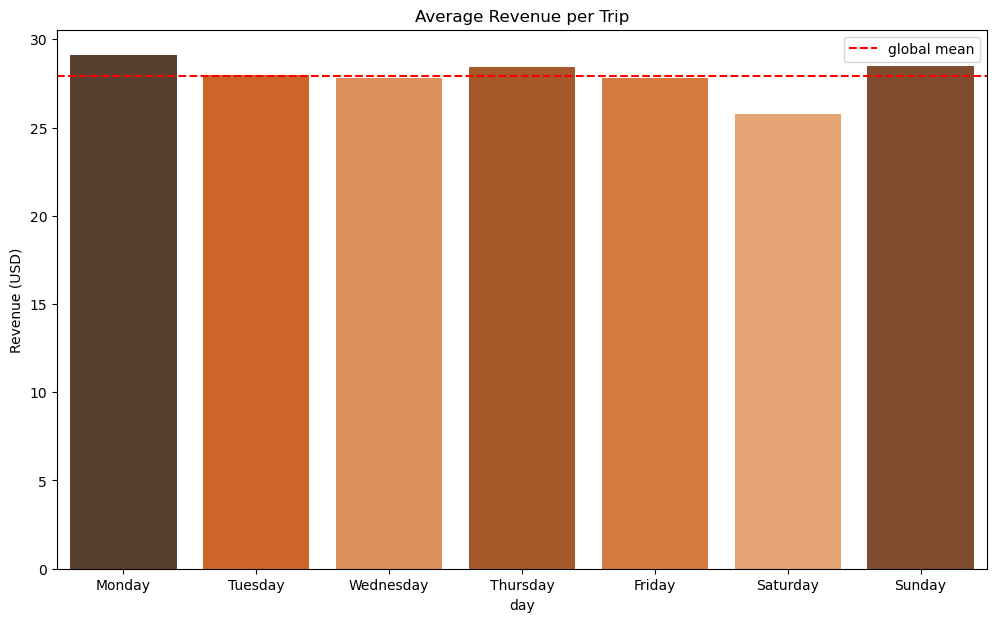

In [441]:
plt.figure(figsize=(12,7))
pal =sns.color_palette("Oranges_d", len(daily_avg_revenue))
rank= daily_avg_revenue['revenue'].argsort().argsort()
ax= sns.barplot(data = daily_avg_revenue, 
                x='day' , y='revenue',
                palette=np.array(pal[:])[rank])
ax.axhline(daily_avg_revenue['revenue'].mean(), ls='--', color='red', label='global mean')
ax.legend()
ax.set_ylabel('Revenue (USD)')
ax.set(title="Average Revenue per Trip");

The average revenue per trip remains consistent across all days, with values close to or slightly above the global mean, indicating stable revenue per ride throughout the week.

On Monday and Sunday, despite having fewer rides and lower total revenue compared to other days, the average revenue per trip is higher. This could be due to longer rides, as riders may travel greater distances, generating more revenue per trip.

In contrast, Saturday sees a high number of rides, but these are likely shorter trips, which results in both lower average revenue per trip and total revenue compared to other days.

**Plot mean trip distance by drop-off location**

In [905]:
# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = lyft.groupby('DOLocationID').mean(numeric_only=True)[['trip_distance']]

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')

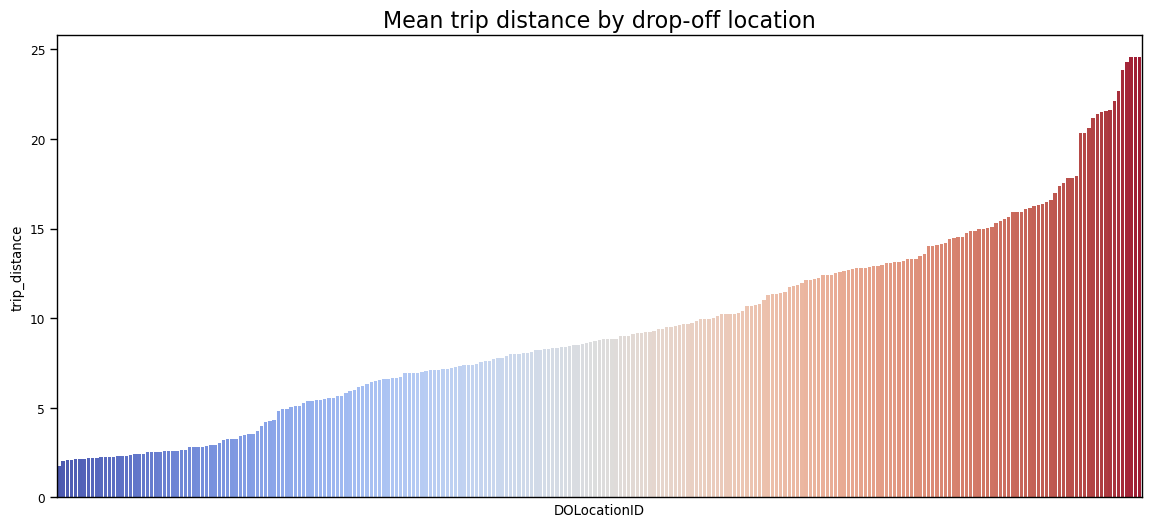

In [907]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance

plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index, 
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index,
                palette='coolwarm')
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16);

This plot represents a characteristic curve of the cumulative density function for a normal distribution. In other words, it suggests that the drop-off points are relatively evenly spread across the area. This is valuable information, as the dataset lacks geographic coordinates, leaving no direct way to assess the distribution of locations.

**Histogram of rides by drop-off location**

First, verify if the drop-off location IDs are numbered consecutively. For example, do they follow a sequence like 1, 2, 3, 4, and so on, or are some numbers missing (e.g., 1, 3, 4)? If the IDs are not consecutive, the histogram may misleadingly appear as though certain locations have very few or no rides, when in fact there are no bars because those locations don’t exist.

In [909]:
# Check if all drop-off locations are consecutively numbered
lyft['DOLocationID'].max() - len(set(lyft['DOLocationID'])) 

6

There are 6 numbers that do not represent a drop-off location.

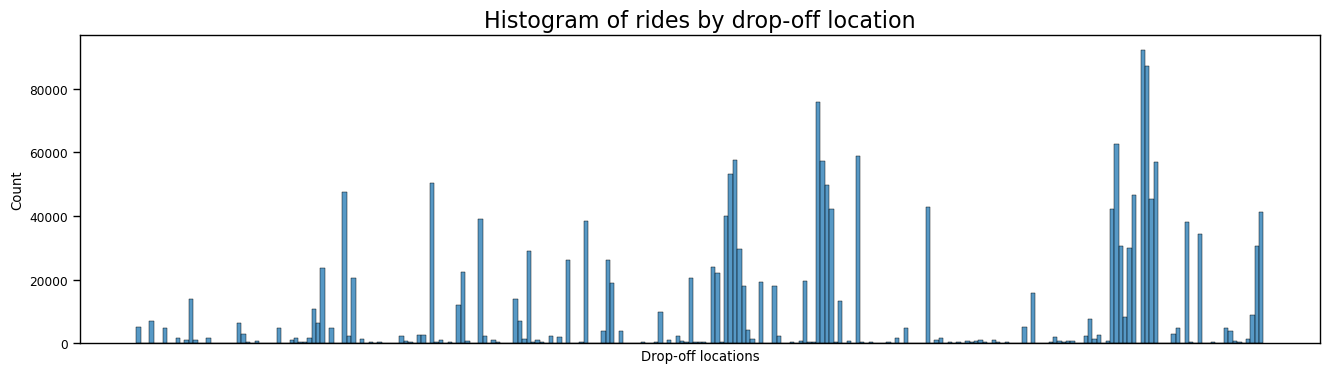

In [912]:
plt.figure(figsize=(16,4))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = lyft['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(sorted_dropoffs, bins=range(0, lyft['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

Notice that among the 200+ drop-off locations, a significant portion of the traffic is concentrated in a few locations, while the rest receive relatively few trips. These high-traffic areas are likely near popular tourist attractions such as the Empire State Building or Times Square, as well as airports and train or bus terminals. However, it would be useful to know the exact locations associated with each ID. Unfortunately, this information is not included in the dataset.

#### Boxplots

In [75]:
numeric_variables = ['total_amount',
 'trip_distance',
 'duration',
 'fare_amount',
 'tip_amount']

**Payment Type**

In [78]:
payment_type_name = {
        1:"Credit card",
        2:"Cash",
        3:"No charge",
        4:"Dispute",
        5:"Unknown",
        6:"Voided trip"
    }

lyft['payment_type'] = lyft['payment_type'].map(payment_type_name)


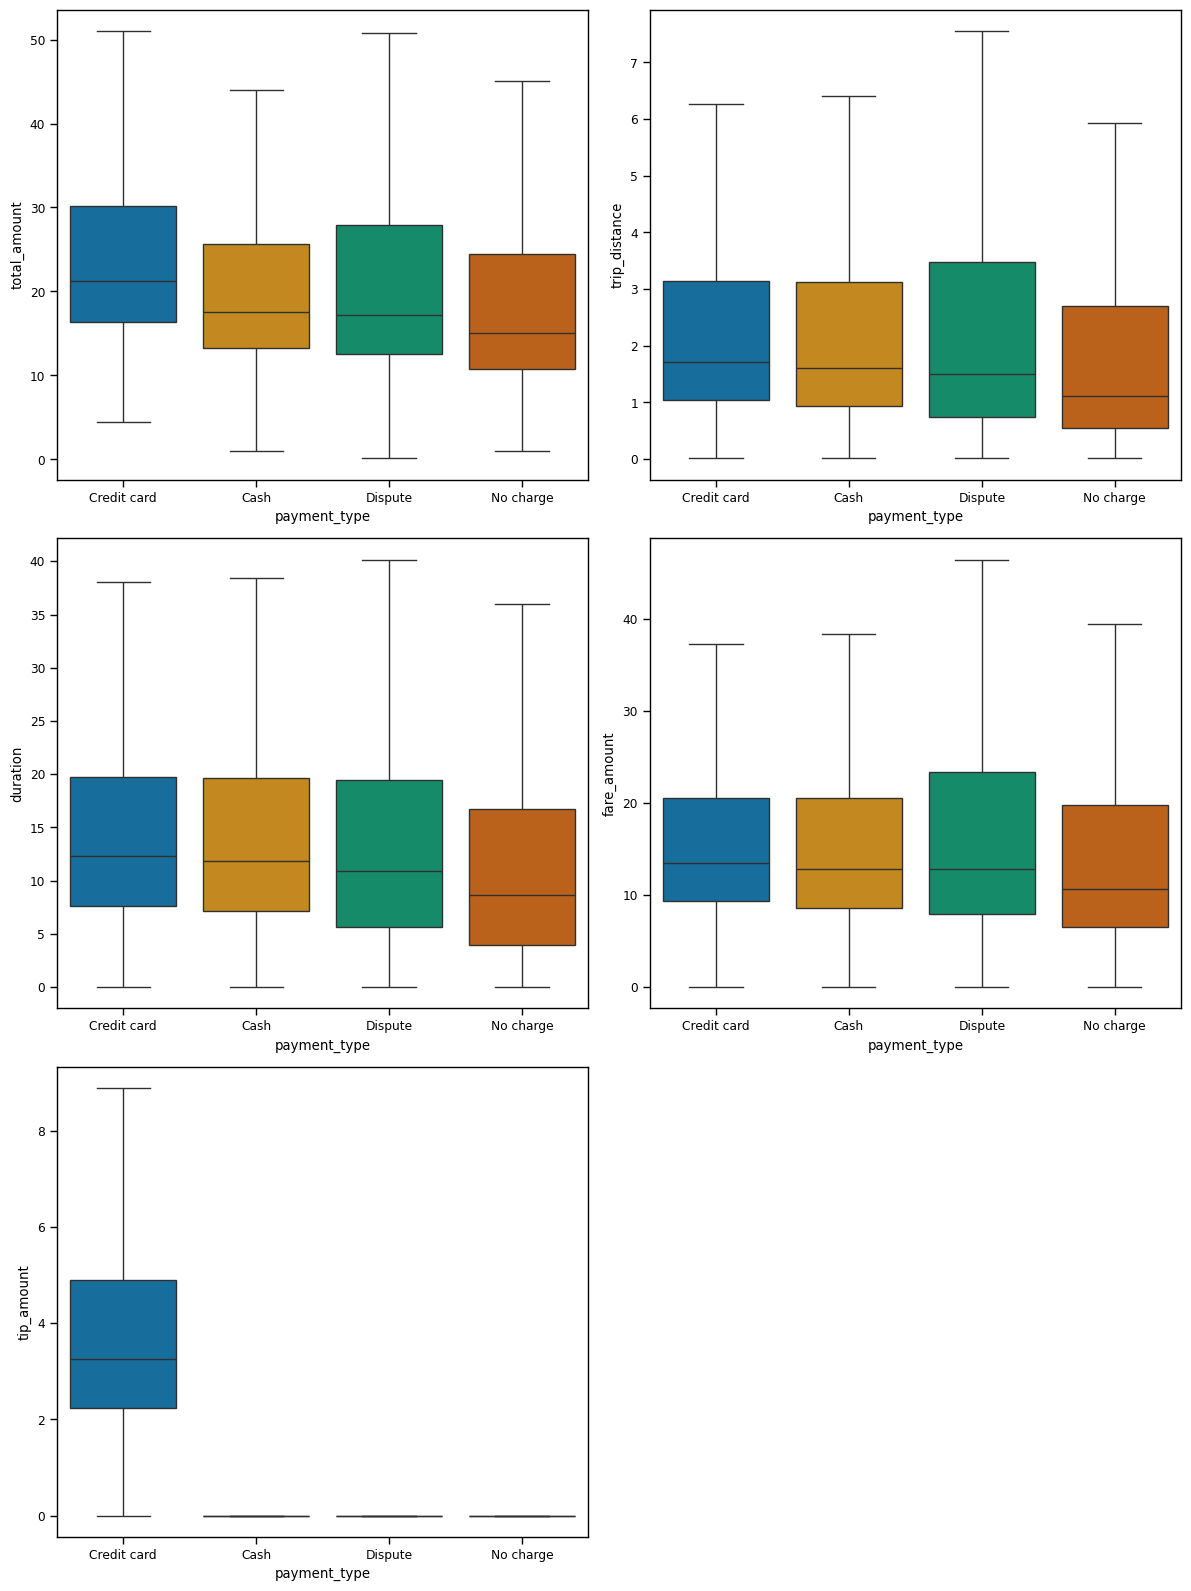

In [919]:
fig, axList = plt.subplots(nrows=3, ncols=2, figsize = (12,16))

axList = axList.flatten()
fig.delaxes(axList[-1])
axList = axList[:-1]

# Set a color palette
palette = sns.color_palette("colorblind", len(lyft['payment_type'].unique()))

for ax , var in zip(axList, numeric_variables):
    sns.boxplot(y=lyft[var], x=lyft['payment_type'] , ax= ax, showfliers= False, palette=palette);
    plt.tight_layout();
    
plt.tight_layout()
plt.show()

The "No Charge" category typically involves shorter trips with lower costs, likely due to specific circumstances such as promotions or unresolved issues. For the other payment types, fare amount, trip distance, and trip duration remain relatively consistent. The main distinction lies in the tip amount, which is significantly higher for credit card payments, leading to a slightly higher total trip cost for rides paid with credit cards.

**Vendor**

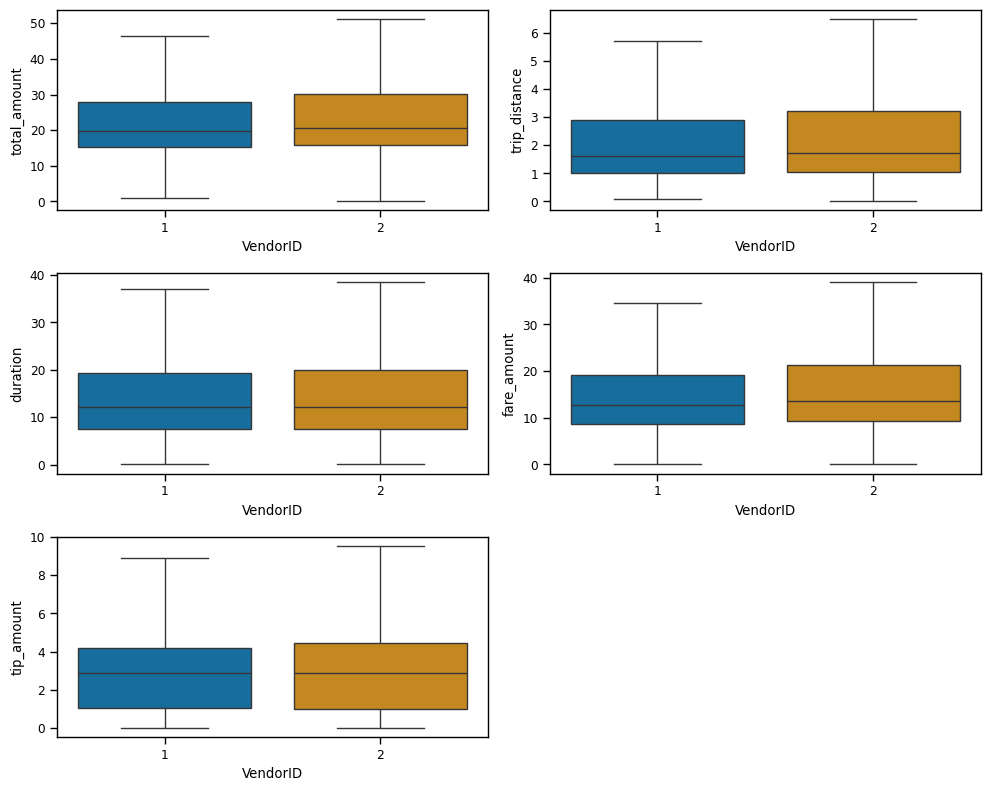

In [922]:
fig, axList = plt.subplots(nrows=3, ncols=2, figsize = (10,8))

axList = axList.flatten()
fig.delaxes(axList[-1])
axList = axList[:-1]

# Set a color palette
palette = sns.color_palette("colorblind", len(lyft['VendorID'].unique()))

for ax , var in zip(axList, numeric_variables):
    sns.boxplot(y=lyft[var], x=lyft['VendorID'] , ax= ax, showfliers= False, palette=palette);
    plt.tight_layout();
    
plt.tight_layout()
plt.show()

For Vendor ID, Vendor 2 appears to have slightly higher fare amounts and trip distances, resulting in a marginally higher total trip cost.

**Number of Passengers**

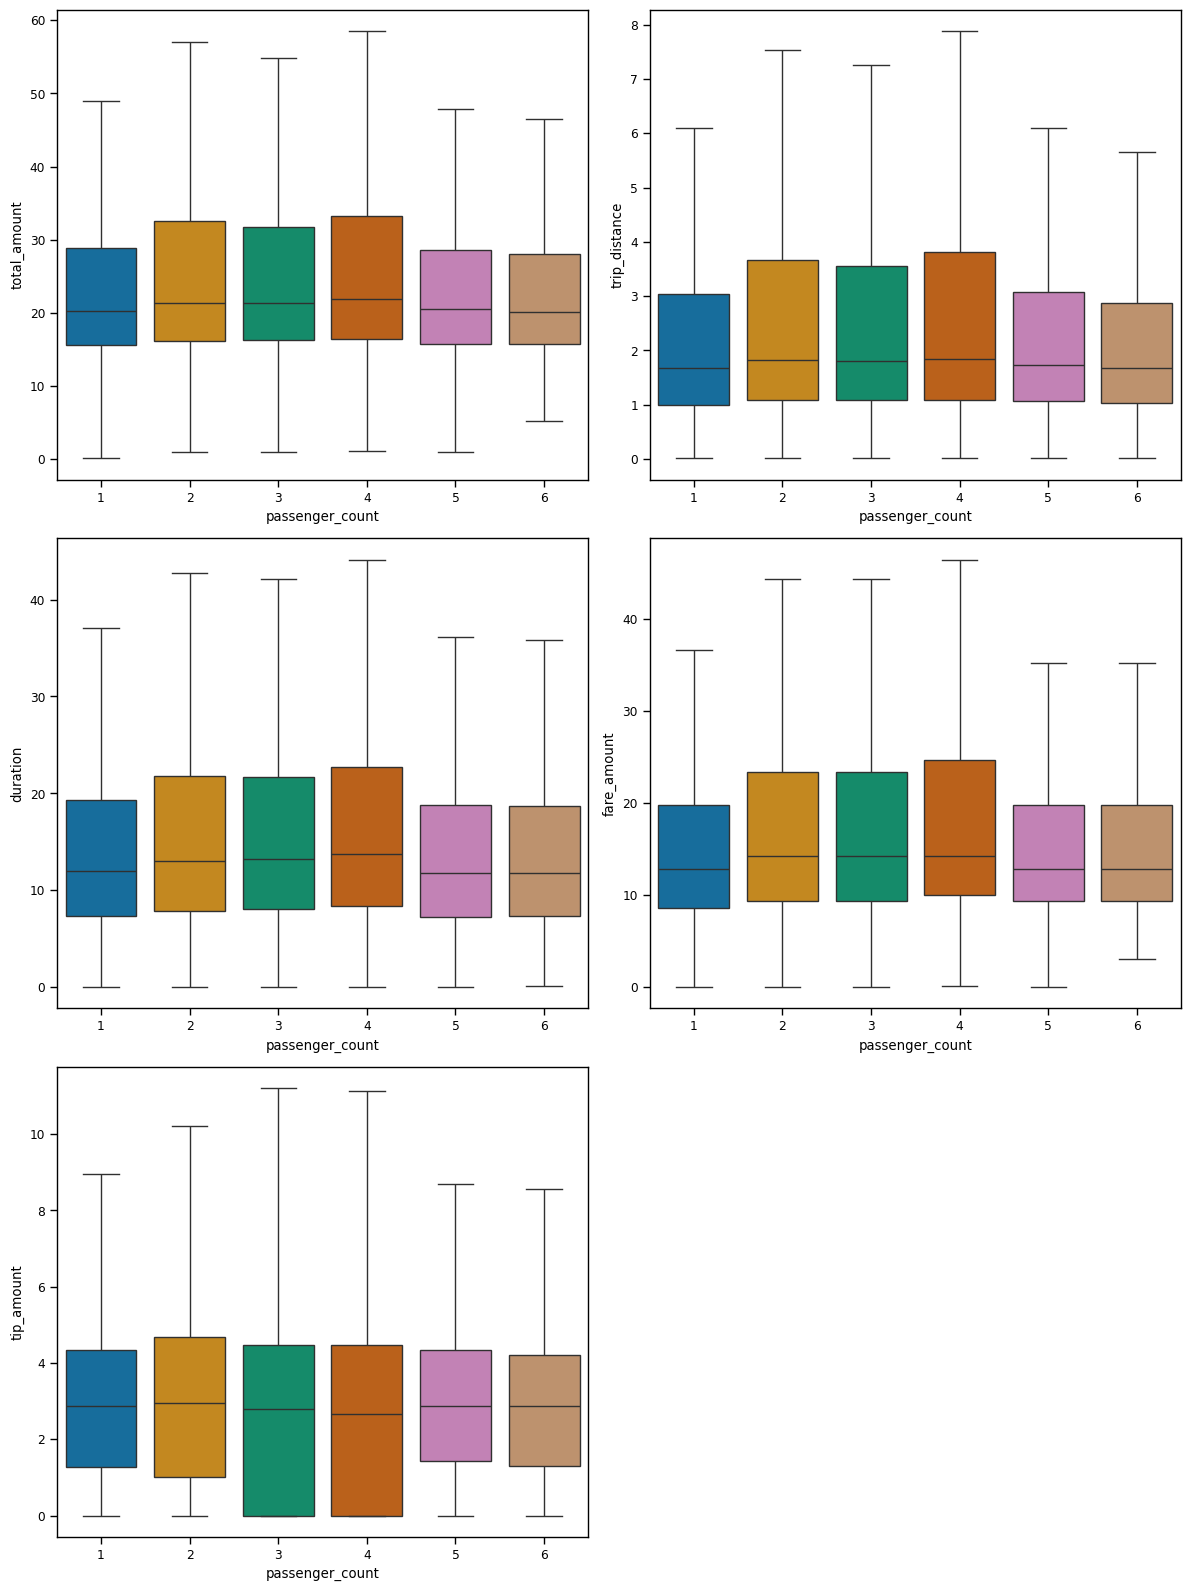

In [925]:
fig, axList = plt.subplots(nrows=3, ncols=2, figsize = (12,16))

axList = axList.flatten()
fig.delaxes(axList[-1])
axList = axList[:-1]

# Set a color palette
palette = sns.color_palette("colorblind", len(lyft['passenger_count'].unique()))

for ax , var in zip(axList, numeric_variables):
    sns.boxplot(y=lyft[var], x=lyft['passenger_count'] , ax= ax, showfliers= False, palette=palette);
    plt.tight_layout();
    
plt.tight_layout()
plt.show()

For passenger counts 1 to 6, metrics such as total amount, trip distance, and duration show similar trends, indicating relatively uniform trip characteristics.

**Day of Week**

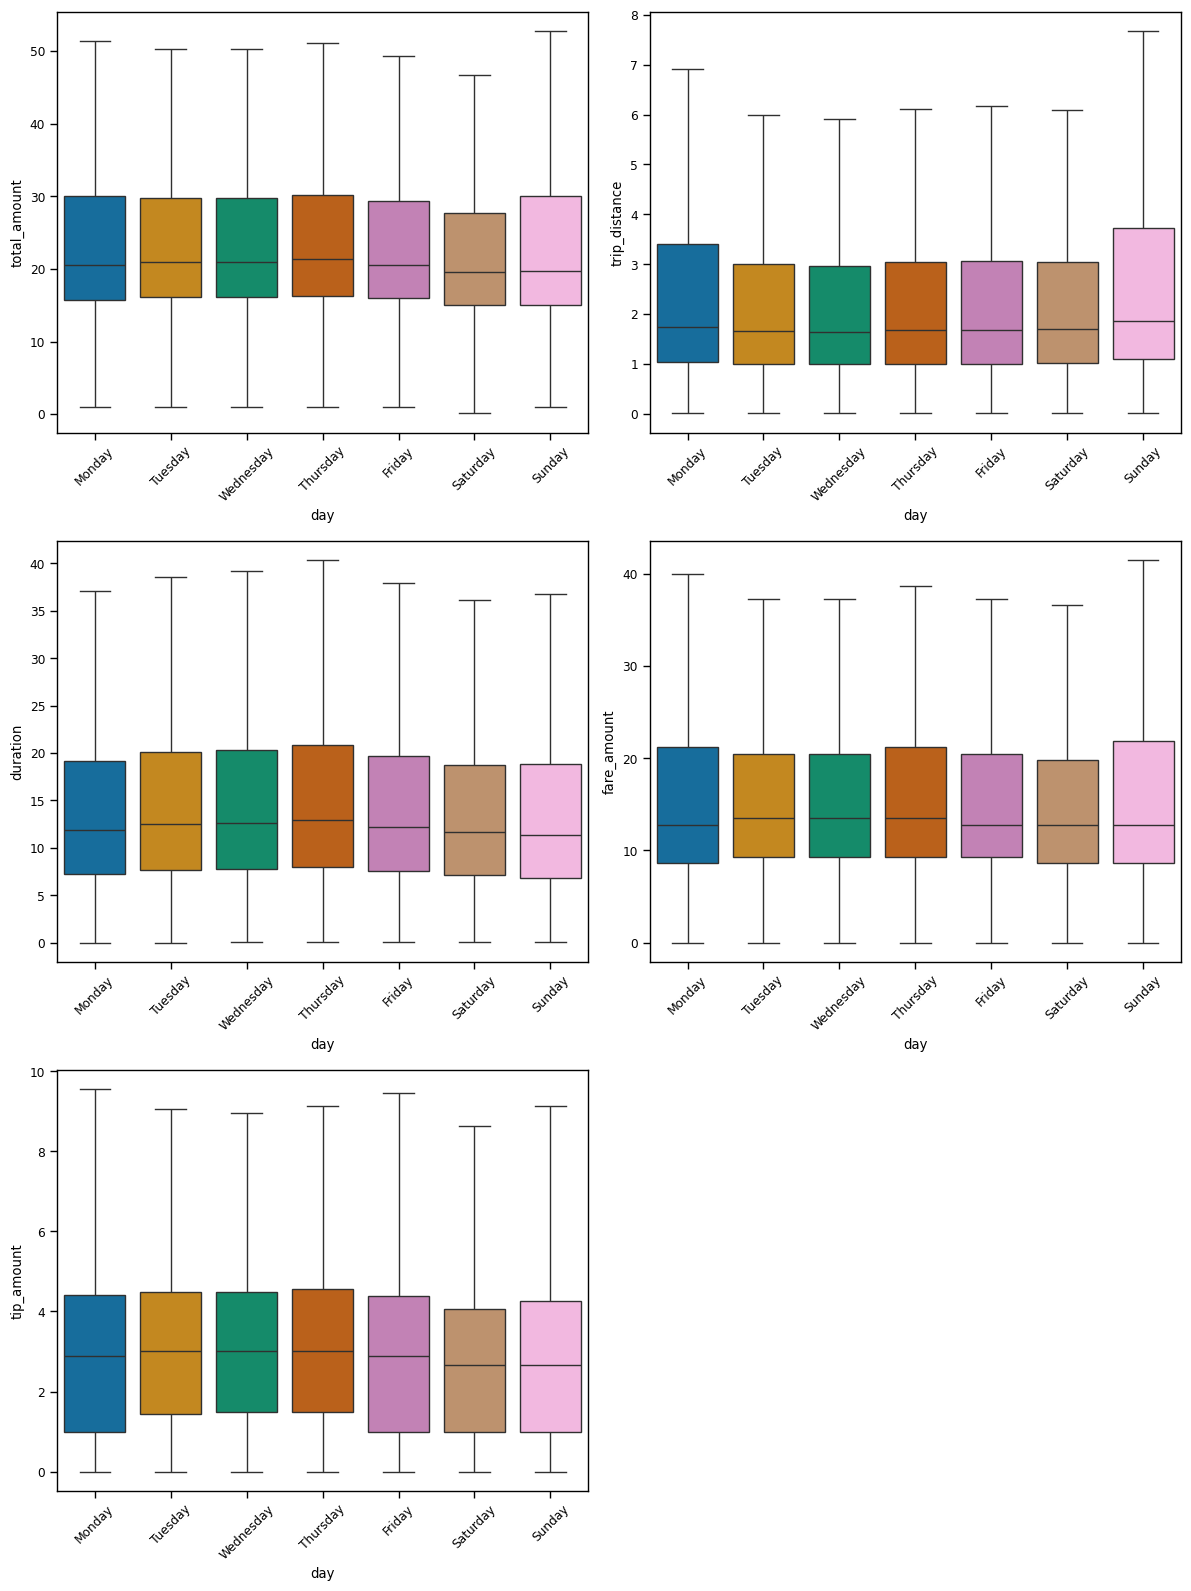

In [928]:
fig, axList = plt.subplots(nrows=3, ncols=2, figsize = (12,16))

axList = axList.flatten()
fig.delaxes(axList[-1])
axList = axList[:-1]

# Set a color palette
palette = sns.color_palette("colorblind", len(lyft['day'].unique()))

for ax , var in zip(axList, numeric_variables):
    sns.boxplot(y=lyft[var], x=lyft['day'] , ax= ax, showfliers= False, palette=palette);
    plt.tight_layout();
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
    
plt.tight_layout()
plt.show()

For different days, metrics such as total amount, trip distance, and duration show similar trends, indicating relatively uniform trip characteristics.
for Sundays and Mondays, the trip distances are relatively longer. 

**Month**

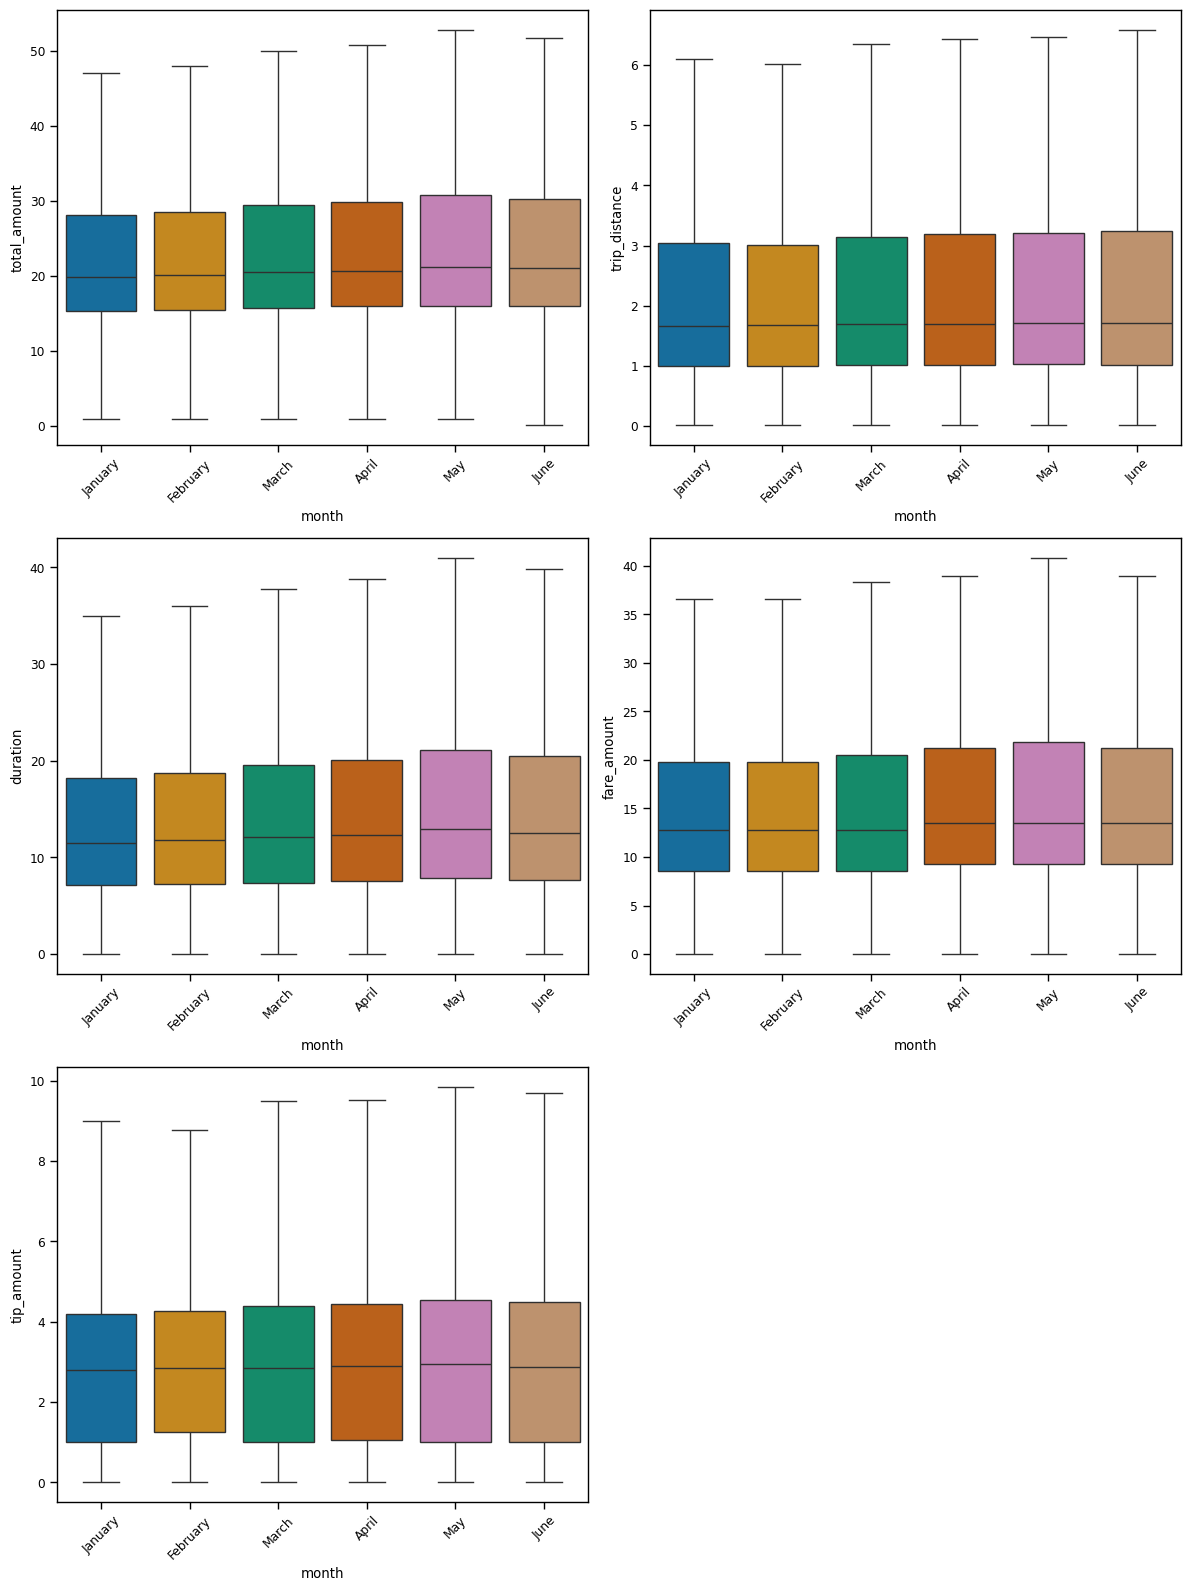

In [931]:
fig, axList = plt.subplots(nrows=3, ncols=2, figsize = (12,16))

axList = axList.flatten()
fig.delaxes(axList[-1])
axList = axList[:-1]

# Set a color palette
palette = sns.color_palette("colorblind", len(lyft['month'].unique()))

for ax , var in zip(axList, numeric_variables):
    sns.boxplot(y=lyft[var], x=lyft['month'] , ax= ax, showfliers= False, palette=palette);
    plt.tight_layout();
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
    
plt.tight_layout()
plt.show()

For different month, metrics such as total amount, trip distance, and duration show similar trends, indicating relatively uniform trip characteristics.
for fare amount,i it seems that prices went up from April.

**Rate Code**

In [80]:
rate_code_type = {
        1:"Standard rate",
        2:"JFK",
        3:"Newark",
        4:"Nassau or Westchester",
        5:"Negotiated fare",
        6:"Group ride",
        99:None}

lyft['rate_code'] = lyft['RatecodeID'].map(rate_code_type)

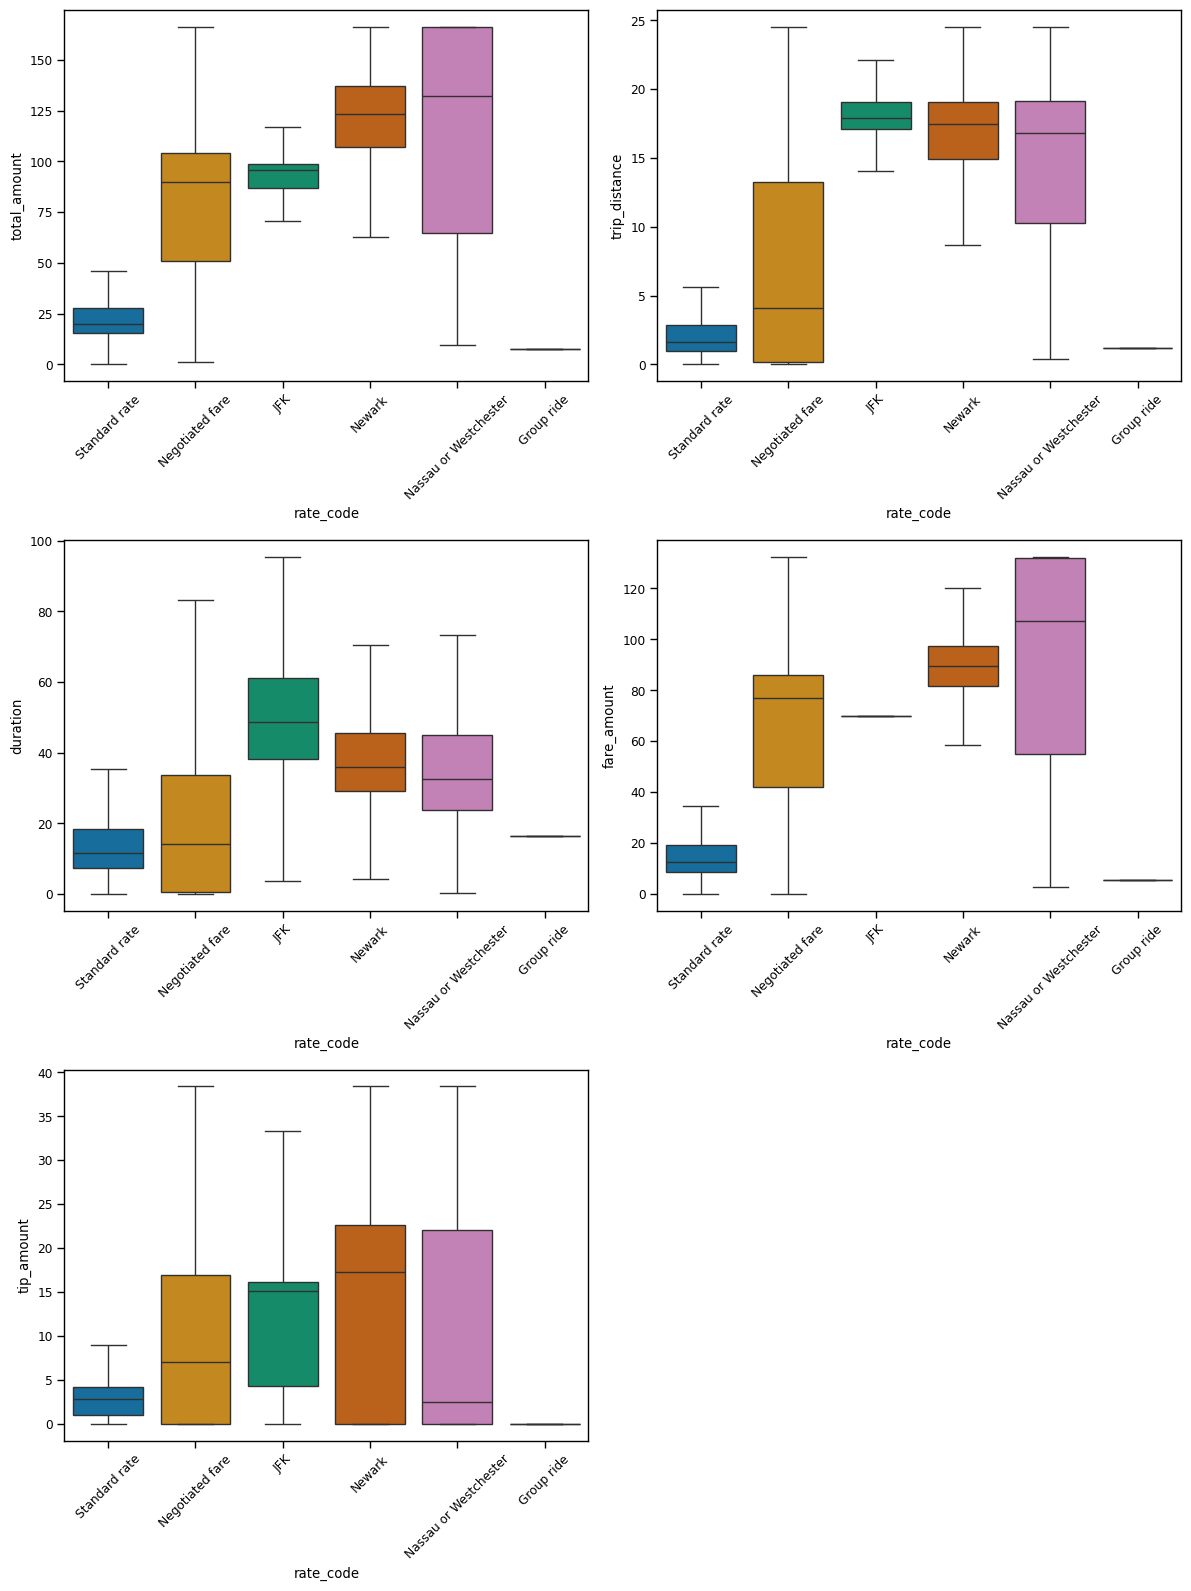

In [935]:
fig, axList = plt.subplots(nrows=3, ncols=2, figsize = (12,16))

axList = axList.flatten()
fig.delaxes(axList[-1])
axList = axList[:-1]

# Set a color palette
palette = sns.color_palette("colorblind", len(lyft['rate_code'].unique()))

for ax , var in zip(axList, numeric_variables):
    sns.boxplot(y=lyft[var], x=lyft['rate_code'] , ax= ax, showfliers= False, palette=palette);
    plt.tight_layout();
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
    
plt.tight_layout()
plt.show()

1) Standard Rate Trips: These trips are generally local and cover short distances. They are characterized by lower fares, shorter durations, and smaller total amounts, making them the most economical option in the dataset.

2) JFK Trips: Trips to JFK Airport have a fixed fare amount, placing them in the high range for distance traveled. However, the trip durations are notably the highest among all categories and exhibit significant variability. This variability likely reflects traffic conditions commonly experienced when traveling to this major airport.

3) Newark Trips: Trips to Newark Airport have a higher fare amount compared to JFK trips, but this fare is not fixed. Interestingly, Newark trips cover shorter distances and have shorter durations than JFK trips, suggesting that their pricing accounts for other factors such as tolls or dynamic pricing.

4) Nassau or Westchester Trips: This category stands out with the highest values across most metrics. The fare amounts are significantly high, and tips are also higher, possibly due to the elevated costs of these longer trips. Additionally, trip distances within this category are highly variable, indicating a wide range of travel lengths.

5) Group Rides: These trips appear to be an outlier category, with minimal metrics across all aspects. They likely represent shared or discounted services, such as ride-pooling options, which are typically characterized by lower total amounts and shorter trip distances.

### Feature Engineering

#### Create `mean_distance` column

When the model is deployed, it won't have access to the trip duration until it is completed. Therefore, we cannot train a model using this feature. However, we can leverage known trip statistics to make generalizations about unknown trips.

In this step, we create a new column called `mean_distance`, which captures the average distance for groups of trips sharing the same pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results will be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. Each unique pair of pickup and dropoff locations is grouped and averaged independently.

Next, the `mean_distance` column is added to the dataset. Its value for each row represents the average distance of all trips with the same pickup and dropoff points:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


To achieve this, begin by creating a helper column called `pickup_dropoff`, which uniquely identifies each trip's pickup and dropoff locations. This can be done by concatenating the pickup and dropoff location IDs as strings, separated by a space. Using a space ensures that combinations like 12 & 151 are distinguished from 121 & 51.

For instance, the `pickup_dropoff` column would look like this

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |

This helper column facilitates grouping trips by unique pickup and dropoff locations, allowing for the calculation of the `mean_distance` column.

In [82]:
lyft['pickup_dropoff'] = lyft['PULocationID'].astype(str) + '-' +lyft['DOLocationID'].astype(str)
lyft.head(2)

VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
6277555          2                1           2.33         1.0           142   
12331145         2                1           0.90         1.0            97   

          DOLocationID payment_type  fare_amount  tip_amount  tolls_amount  \
6277555            262  Credit card         14.9        3.98           0.0   
12331145           181  Credit card          9.3        1.00           0.0   

          total_amount   duration       day  month week Period time_period  \
6277555          23.88  13.816667  Thursday  March  W10     PM  night_time   
12331145         12.80   8.133333    Sunday    May  W18     PM  night_time   

              rate_code pickup_dropoff  
6277555   Standard rate        142-262  
12331145  Standard rate         97-181

In [83]:
grouped =  lyft.groupby(by='pickup_dropoff').mean(numeric_only=True)['trip_distance'].round(2)
grouped_dict = grouped.to_dict()

In [86]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
lyft['mean_distance'] = lyft['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
lyft['mean_distance'] = lyft['mean_distance'].map(grouped_dict)

lyft.head(3)


VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
6277555          2                1           2.33         1.0           142   
12331145         2                1           0.90         1.0            97   
15021017         1                1           1.10         1.0           161   

          DOLocationID payment_type  fare_amount  tip_amount  tolls_amount  \
6277555            262  Credit card         14.9        3.98           0.0   
12331145           181  Credit card          9.3        1.00           0.0   
15021017           170  Credit card         12.1        1.30           0.0   

          total_amount   duration       day  month week Period time_period  \
6277555          23.88  13.816667  Thursday  March  W10     PM  night_time   
12331145         12.80   8.133333    Sunday    May  W18     PM  night_time   
15021017         19.90  12.866667    Friday    May  W22     PM     pm_rush   

              rate_code pickup_dropoff  mean_distance  
6277555   Standard rate        142-262           2.66  
12331145  Standard rate         97-181           1.71  
15021017  Standard rate        161-170           0.97

#### Create `mean_duration` column

we follow the same steps we did to develop `mean_distance`.

In [89]:

grouped = lyft.groupby(by='pickup_dropoff').mean(numeric_only=True)['duration'].round(2)
grouped_dict = grouped.to_dict()


# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
lyft['mean_duration'] = lyft['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
lyft['mean_duration'] = lyft['mean_duration'].map(grouped_dict)

# Confirm
lyft.head(3)

VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
6277555          2                1           2.33         1.0           142   
12331145         2                1           0.90         1.0            97   
15021017         1                1           1.10         1.0           161   

          DOLocationID payment_type  fare_amount  tip_amount  tolls_amount  \
6277555            262  Credit card         14.9        3.98           0.0   
12331145           181  Credit card          9.3        1.00           0.0   
15021017           170  Credit card         12.1        1.30           0.0   

          total_amount   duration       day  month week Period time_period  \
6277555          23.88  13.816667  Thursday  March  W10     PM  night_time   
12331145         12.80   8.133333    Sunday    May  W18     PM  night_time   
15021017         19.90  12.866667    Friday    May  W22     PM     pm_rush   

              rate_code pickup_dropoff  mean_distance  mean_duration  
6277555   Standard rate        142-262           2.66          16.06  
12331145  Standard rate         97-181           1.71          13.23  
15021017  Standard rate        161-170           0.97           9.26

#### Create `tip_percent` and `generous` columns

We add a `tip_percent` column to the dataframe by performing the following calculation:  
<br/>  


$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  

We round the result to three places beyond the decimal.

In [92]:
lyft['tip_percent'] = np.round(lyft['tip_amount']/(lyft['total_amount']- lyft['tip_amount']),3)

Now we create another column called `generous`. This will be the target variable for our Classification model. 
The column would be a binary indicator of whether or not a cuipped ≥ 20% (0=no, 1=yes).

In [95]:
# Create 'generous' col (target)
def generous(col):
    if col >= 0.2:
        return 1
    else:
        return 0

In [97]:
lyft['generous'] = lyft['tip_percent'].apply(generous)

In [99]:
lyft['generous'].value_counts(normalize= True)

generous
1    0.502031
0    0.497969
Name: proportion, dtype: float64

The data set has a balanced number for the generous category.

## Regression Model

For the regression task, our goal is to predict the fare amount using the pickup and dropoff locations, which are transformed into the mean distance and mean duration between those locations, along with other relevant variables.

### Isolate modeling variables

we drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [101]:
df =lyft.copy()
columns = ['VendorID','rate_code','mean_distance', 'mean_duration','passenger_count' ,'month','time_period','fare_amount']
df =lyft[columns]

Since Category of "Negotiated Fare" is happening at the end of the trip and we dont know it at the beginning of the trip, we remove these points from the dataset.

In [104]:
df = df[df['rate_code'] != 'Negotiated fare']

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1923226 entries, 6277555 to 1438485
Data columns (total 8 columns):
 #   Column           Dtype   
---  ------           -----   
 0   VendorID         int32   
 1   rate_code        object  
 2   mean_distance    float64 
 3   mean_duration    float64 
 4   passenger_count  int32   
 5   month            category
 6   time_period      object  
 7   fare_amount      float64 
dtypes: category(1), float64(3), int32(2), object(2)
memory usage: 104.5+ MB


In [108]:
df['month']= df['month'].astype('str')
df['VendorID'] = df['VendorID'].astype('str')

In [109]:
df.shape

(1923226, 8)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1923226 entries, 6277555 to 1438485
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   VendorID         object 
 1   rate_code        object 
 2   mean_distance    float64
 3   mean_duration    float64
 4   passenger_count  int32  
 5   month            object 
 6   time_period      object 
 7   fare_amount      float64
dtypes: float64(3), int32(1), object(4)
memory usage: 124.7+ MB


#### Identify correlations

Next, we code a correlation matrix to help determine most correlated variables.

In [115]:
correlation_matrix = df.corr(numeric_only=True, method='pearson')
correlation_matrix

mean_distance  mean_duration  passenger_count  fare_amount
mean_distance         1.000000       0.934835         0.038482     0.945077
mean_duration         0.934835       1.000000         0.041851     0.916214
passenger_count       0.038482       0.041851         1.000000     0.046103
fare_amount           0.945077       0.916214         0.046103     1.000000

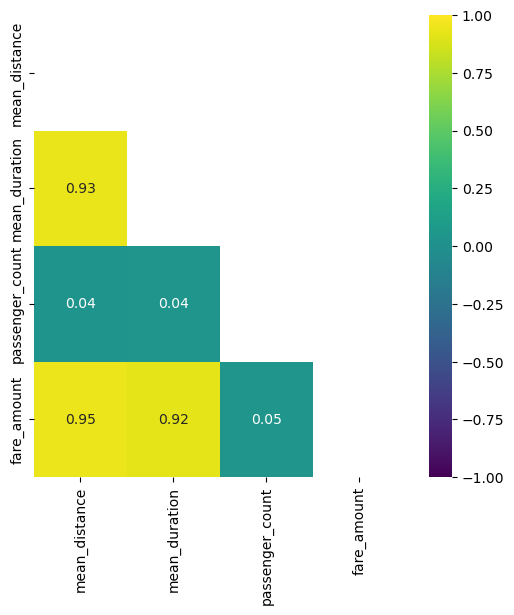

In [117]:
fig, ax = plt.subplots(figsize=(6,6))
mask = np.triu(np.ones_like(correlation_matrix,dtype=bool))
sns.heatmap(correlation_matrix , mask = mask , annot = True, fmt=".2f" , vmin=-1 , vmax=+1 , cmap='viridis')
plt.show()

 `mean_duration` and `mean_distance` are both highly correlated with the target variable of `fare_amount` They're also both correlated with each other, with a Pearson correlation of 0.93.

Recall that highly correlated predictor variables can be bad for linear regression models when you want to be able to draw statistical inferences about the data from the model. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about your data.

This model will predict `fare_amount`, which will be used as a predictor variable in machine learning models. Therefore, try modeling with both variables even though they are correlated.

#### Pair plot

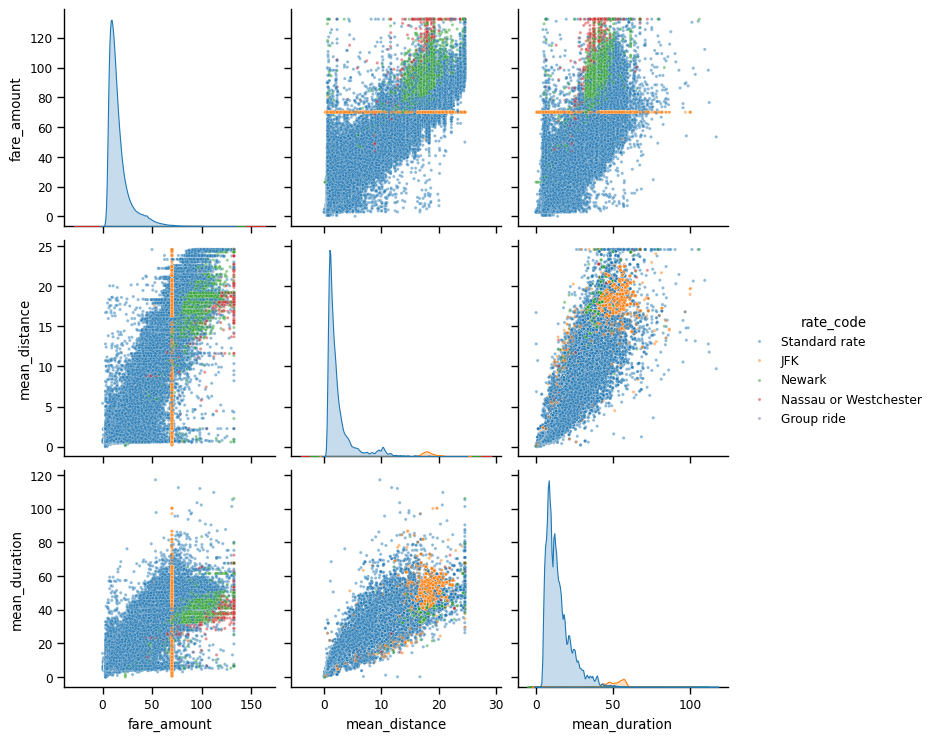

In [986]:
df_p = df[['fare_amount','mean_distance','mean_duration','rate_code']]
sns.pairplot(data = df_p, plot_kws={'alpha': 0.5, 's': 5} , hue='rate_code')
plt.show();

Since most of the data points correspond to the standard rate, it becomes challenging to identify trends for other rate codes. However, the linear relationships between variables are generally apparent. In the next pair plot, we exclude the standard rate and focus solely on the other rate codes to better observe their trends.

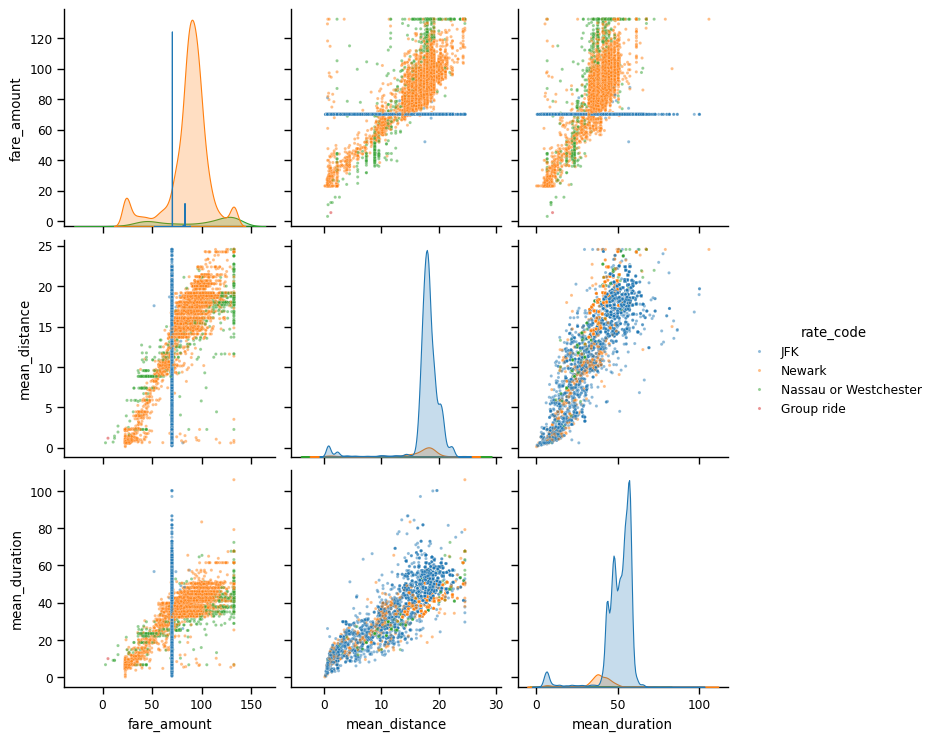

In [988]:
# Create a pairplot to visualize pairwise relationships between variables in the data
df_p = df[df['rate_code'] != 'Standard rate'][['fare_amount','mean_distance','mean_duration','rate_code']]
sns.pairplot(data = df_p, plot_kws={'alpha': 0.5, 's': 5} , hue='rate_code')
plt.show();

It is obvious that the JFK has a fixed rate and we weill find the rate later.

In [119]:
df[df['fare_amount'] > 60]['fare_amount'].value_counts().head()

fare_amount
70.0    70682
60.4     1208
61.1     1117
62.5      987
61.8      983
Name: count, dtype: int64

The Fare amount of 70 is the fixed value for JFK trips.

In [122]:
# Define thresholds
#distance_threshold = 2
#duration_threshold = 3
#fare_threshold = 5

# Filter the data
#df = df[~(
    #((df['mean_distance'] < distance_threshold) | (df['mean_duration'] < duration_threshold)) &
    #(df['fare_amount'] > fare_threshold)
#)]
df = df[(df['mean_distance'] >0) & (df['mean_duration'] >0) & (df['fare_amount'] >0)]

In [124]:
df.head()

VendorID      rate_code  mean_distance  mean_duration  \
6277555         2  Standard rate           2.66          16.06   
12331145        2  Standard rate           1.71          13.23   
15021017        1  Standard rate           0.97           9.26   
6385001         1  Standard rate           1.23          11.69   
5034703         2  Standard rate           0.74           6.12   

          passenger_count     month time_period  fare_amount  
6277555                 1     March  night_time         14.9  
12331145                1       May  night_time          9.3  
15021017                1       May     pm_rush         12.1  
6385001                 1     March  night_time         13.5  
5034703                 2  February    day_time         10.0

### Data Preparation for Models

#### Variable encoding

In [128]:
df_uniques = df.nunique().to_frame().rename(columns={0:'Unique Values'})
df_uniques

Unique Values
VendorID                     2
rate_code                    5
mean_distance             2117
mean_duration             4882
passenger_count              6
month                        6
time_period                  4
fare_amount                474

In [130]:
binary_columns = ['VendorID']

In [132]:
dummy_columns = ['rate_code','time_period','month']

In [134]:
df = pd.get_dummies(df, columns=dummy_columns , drop_first=True , dtype='int8')

In [135]:
df.head()

VendorID  mean_distance  mean_duration  passenger_count  fare_amount  \
6277555         2           2.66          16.06                1         14.9   
12331145        2           1.71          13.23                1          9.3   
15021017        1           0.97           9.26                1         12.1   
6385001         1           1.23          11.69                1         13.5   
5034703         2           0.74           6.12                2         10.0   

          rate_code_JFK  rate_code_Nassau or Westchester  rate_code_Newark  \
6277555               0                                0                 0   
12331145              0                                0                 0   
15021017              0                                0                 0   
6385001               0                                0                 0   
5034703               0                                0                 0   

          rate_code_Standard rate  time_period_day_time  \
6277555                         1                     0   
12331145                        1                     0   
15021017                        1                     0   
6385001                         1                     0   
5034703                         1                     1   

          time_period_night_time  time_period_pm_rush  month_February  \
6277555                        1                    0               0   
12331145                       1                    0               0   
15021017                       0                    1               0   
6385001                        1                    0               0   
5034703                        0                    0               1   

          month_January  month_June  month_March  month_May  
6277555               0           0            1          0  
12331145              0           0            0          1  
15021017              0           0            0          1  
6385001               0           0            1          0  
5034703               0           0            0          0

In [138]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in binary_columns:
    df[column] = le.fit_transform(df[column])
df.head()

VendorID  mean_distance  mean_duration  passenger_count  \
6277555          1           2.66          16.06                1   
12331145         1           1.71          13.23                1   
15021017         0           0.97           9.26                1   
6385001          0           1.23          11.69                1   
5034703          1           0.74           6.12                2   

          fare_amount  rate_code_JFK  rate_code_Nassau or Westchester  \
6277555          14.9              0                                0   
12331145          9.3              0                                0   
15021017         12.1              0                                0   
6385001          13.5              0                                0   
5034703          10.0              0                                0   

          rate_code_Newark  rate_code_Standard rate  time_period_day_time  \
6277555                  0                        1                     0   
12331145                 0                        1                     0   
15021017                 0                        1                     0   
6385001                  0                        1                     0   
5034703                  0                        1                     1   

          time_period_night_time  time_period_pm_rush  month_February  \
6277555                        1                    0               0   
12331145                       1                    0               0   
15021017                       0                    1               0   
6385001                        1                    0               0   
5034703                        0                    0               1   

          month_January  month_June  month_March  month_May  
6277555               0           0            1          0  
12331145              0           0            0          1  
15021017              0           0            0          1  
6385001               0           0            1          0  
5034703               0           0            0          0

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1923226 entries, 6277555 to 1438485
Data columns (total 17 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   VendorID                         int32  
 1   mean_distance                    float64
 2   mean_duration                    float64
 3   passenger_count                  int32  
 4   fare_amount                      float64
 5   rate_code_JFK                    int8   
 6   rate_code_Nassau or Westchester  int8   
 7   rate_code_Newark                 int8   
 8   rate_code_Standard rate          int8   
 9   time_period_day_time             int8   
 10  time_period_night_time           int8   
 11  time_period_pm_rush              int8   
 12  month_February                   int8   
 13  month_January                    int8   
 14  month_June                       int8   
 15  month_March                      int8   
 16  month_May                        int8   
dtypes: floa

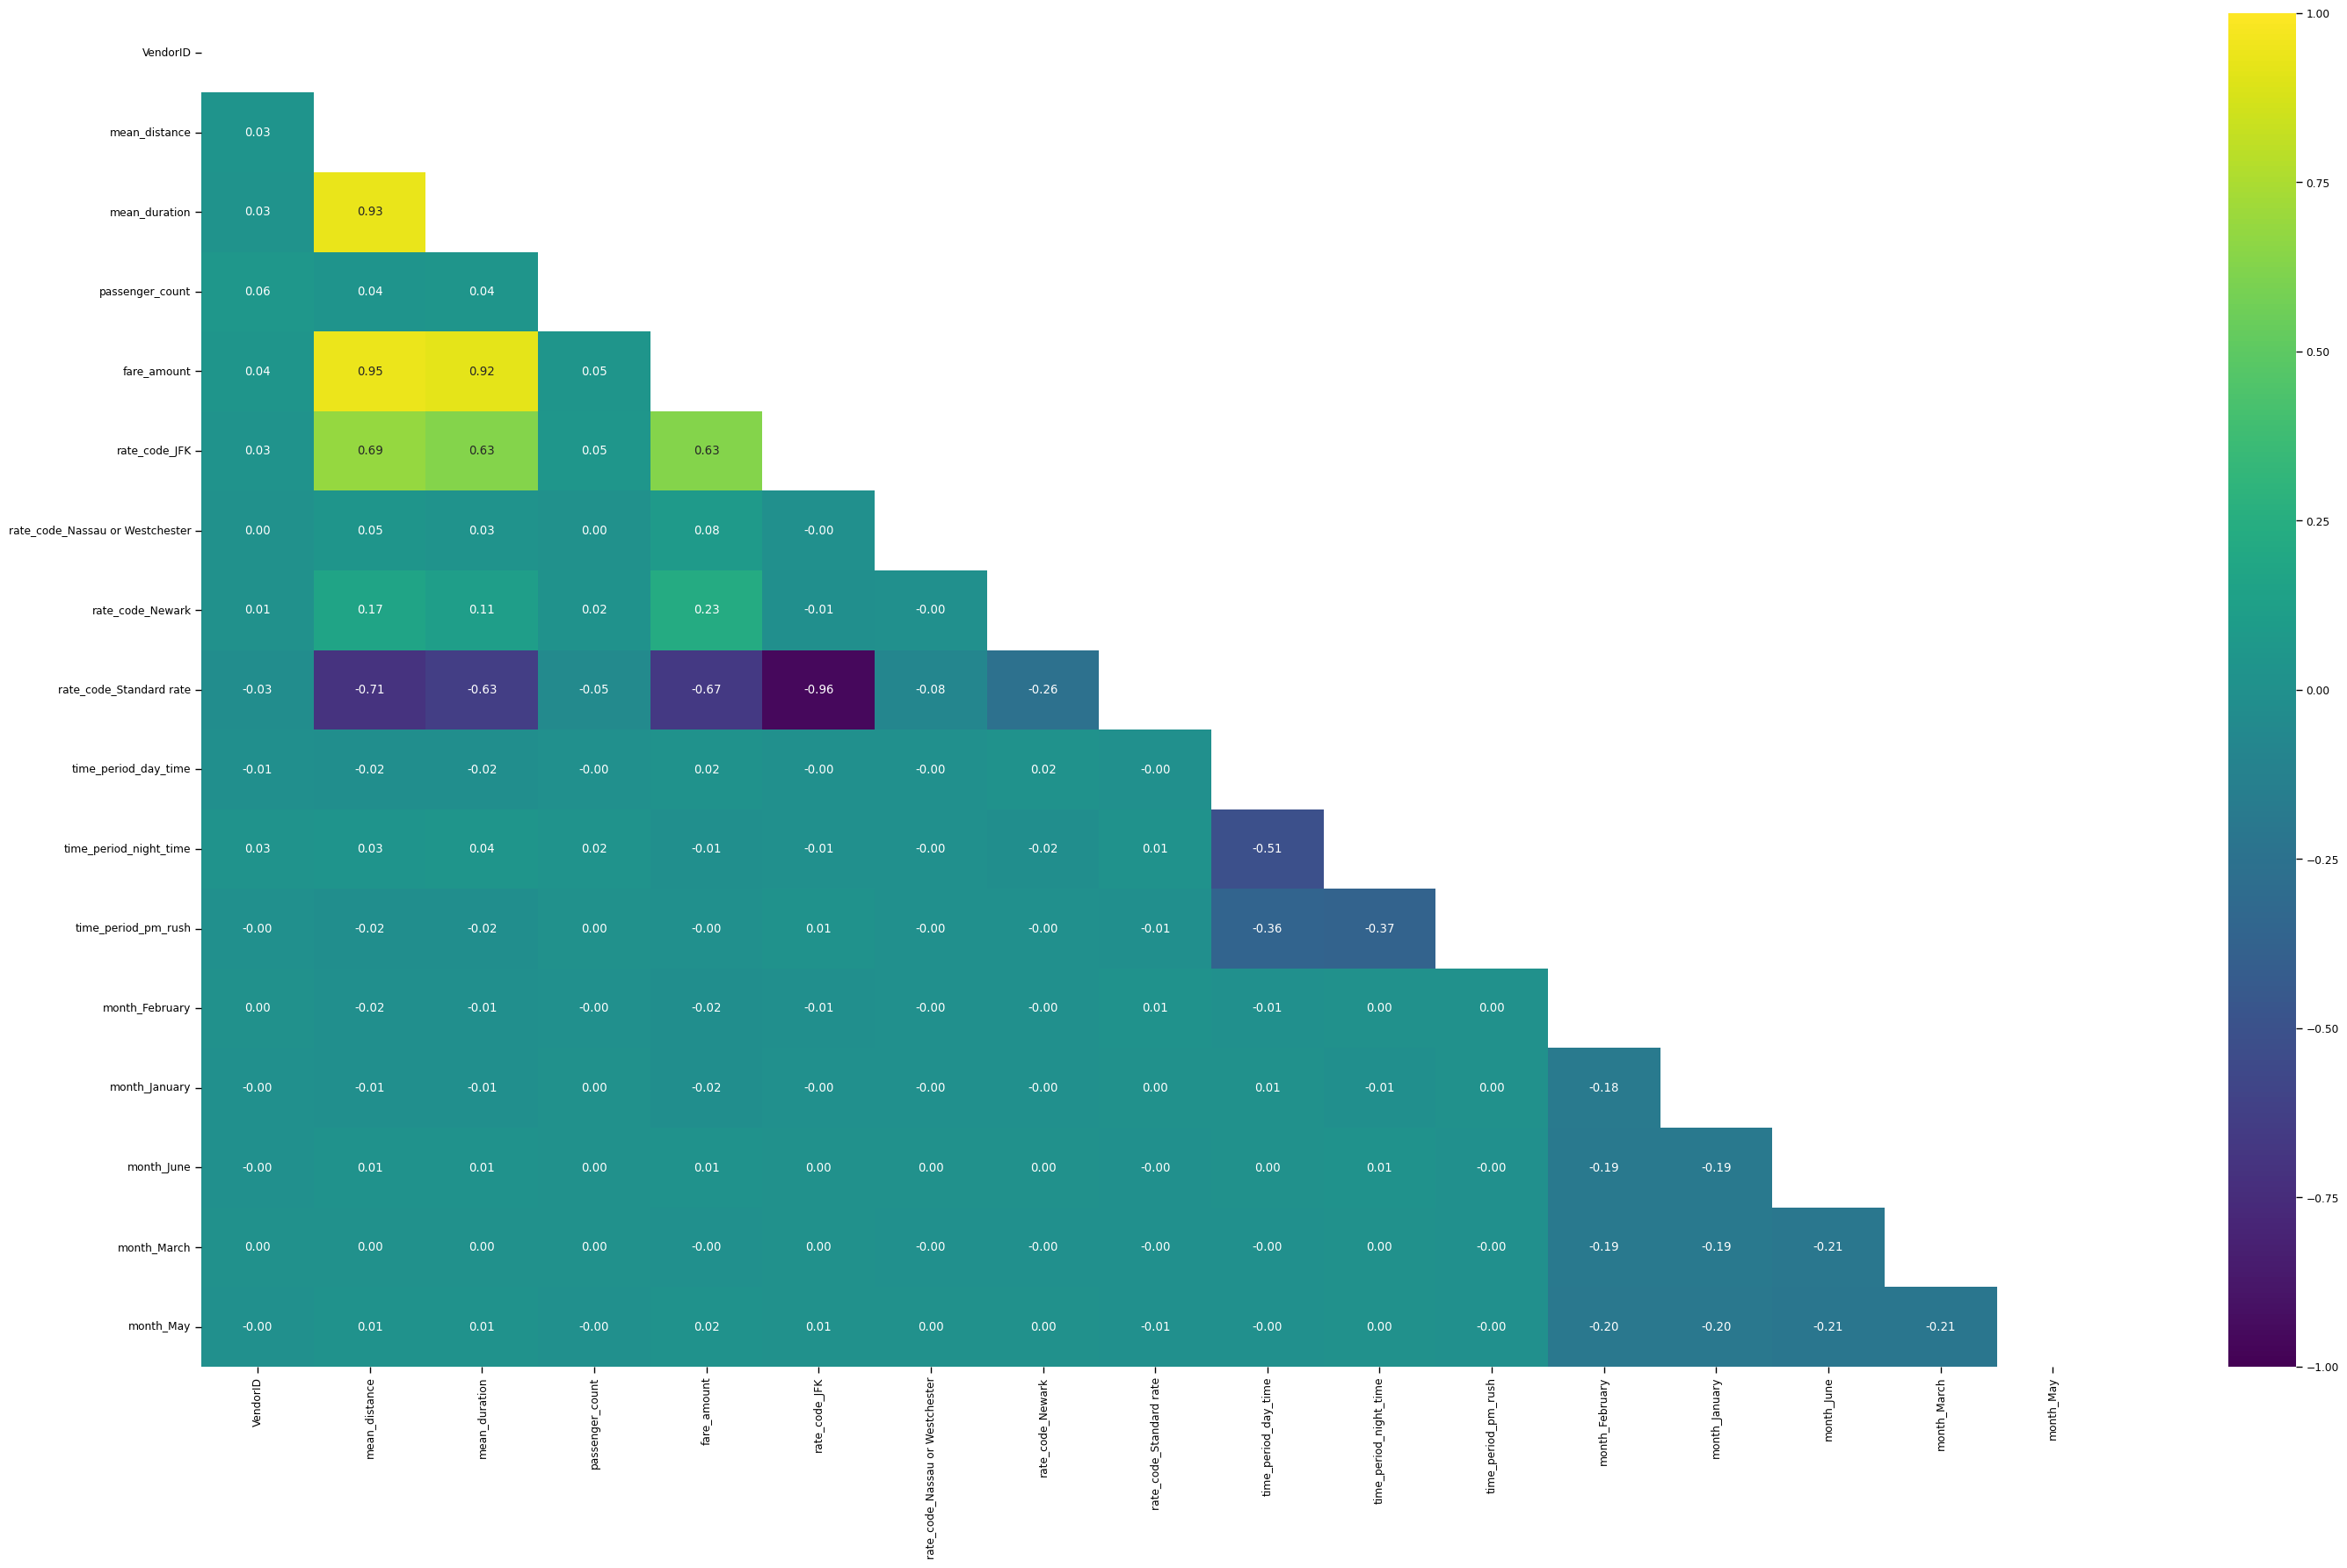

In [1003]:
fig, ax = plt.subplots(figsize=(35,20))

correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix,dtype=bool))
sns.heatmap(correlation_matrix , mask = mask , annot = True, fmt=".2f" , vmin=-1 , vmax=+1 , cmap='viridis');

#### Split data into training and test sets

We convert the y ('fare amount') to log to have a normal distributation.

In [142]:
X= df.drop('fare_amount', axis= 1)

X.to_csv('X_regression.csv', index=True)

print("CSV file saved successfully!")


# Set y variable
y= df['fare_amount']

# Display first few rows
X.head()


CSV file saved successfully!


VendorID  mean_distance  mean_duration  passenger_count  \
6277555          1           2.66          16.06                1   
12331145         1           1.71          13.23                1   
15021017         0           0.97           9.26                1   
6385001          0           1.23          11.69                1   
5034703          1           0.74           6.12                2   

          rate_code_JFK  rate_code_Nassau or Westchester  rate_code_Newark  \
6277555               0                                0                 0   
12331145              0                                0                 0   
15021017              0                                0                 0   
6385001               0                                0                 0   
5034703               0                                0                 0   

          rate_code_Standard rate  time_period_day_time  \
6277555                         1                     0   
12331145                        1                     0   
15021017                        1                     0   
6385001                         1                     0   
5034703                         1                     1   

          time_period_night_time  time_period_pm_rush  month_February  \
6277555                        1                    0               0   
12331145                       1                    0               0   
15021017                       0                    1               0   
6385001                        1                    0               0   
5034703                        0                    0               1   

          month_January  month_June  month_March  month_May  
6277555               0           0            1          0  
12331145              0           0            0          1  
15021017              0           0            0          1  
6385001               0           0            1          0  
5034703               0           0            0          0

In [143]:
# Create training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

train_indices = X_train.index
test_indices = X_test.index

#### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [145]:
# Standardize the X variables
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [146]:
import joblib

# Save the StandardScaler object to a file
joblib.dump(ss, 'standard_scaler.pkl')

print("StandardScaler saved successfully!")


StandardScaler saved successfully!


In [147]:
X_train

array([[ 0.53390284, -0.4291928 , -0.79851014, ..., -0.45268297,
        -0.45567795, -0.46953316],
       [ 0.53390284, -0.5971635 , -0.81158091, ..., -0.45268297,
        -0.45567795, -0.46953316],
       [ 0.53390284,  3.66296293,  3.85094956, ..., -0.45268297,
         2.19453236, -0.46953316],
       ...,
       [ 0.53390284,  0.35953918,  0.5655181 , ...,  2.20905152,
        -0.45567795, -0.46953316],
       [ 0.53390284, -0.44623331, -0.4334622 , ..., -0.45268297,
         2.19453236, -0.46953316],
       [-1.87299995, -0.31477798, -0.33636505, ..., -0.45268297,
         2.19453236, -0.46953316]])

In [148]:
X_test

array([[ 0.53390284, -0.28313133, -0.22432988, ..., -0.45268297,
        -0.45567795,  2.12977505],
       [ 0.53390284, -0.49492047, -0.7406253 , ..., -0.45268297,
        -0.45567795, -0.46953316],
       [ 0.53390284,  0.10393159,  0.55711546, ..., -0.45268297,
        -0.45567795, -0.46953316],
       ...,
       [ 0.53390284, -0.15897907, -0.08428591, ...,  2.20905152,
        -0.45567795, -0.46953316],
       [-1.87299995, -0.40241487, -0.21779449, ...,  2.20905152,
        -0.45567795, -0.46953316],
       [ 0.53390284,  1.53289971,  1.23772914, ...,  2.20905152,
        -0.45567795, -0.46953316]])

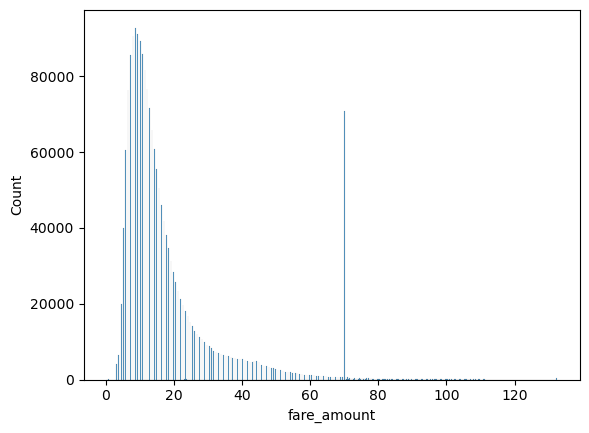

In [149]:
sns.histplot(y);

### Linear Regression

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

LR = LinearRegression()

# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(X_train, y_train.values.ravel())
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': r2_score(y_train, y_train_pred),
                           'test' : r2_score(y_test,  y_test_pred)},
                           name='$R^2$'))

error_df.append(pd.Series({'train': np.sqrt(mean_squared_error(y_train, y_train_pred)),
                           'test' : np.sqrt(mean_squared_error(y_test,  y_test_pred))},
                           name='RMSE'))

# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df

$R^2$      RMSE
train  0.912945  4.729903
test   0.912440  4.742517

In [159]:
LR.coef_

array([ 0.20486263, 10.6840644 ,  4.70156496,  0.10943205,  0.5963883 ,
        0.72640825,  1.52038129,  0.87044908,  0.56280619, -0.2808431 ,
        0.38993363, -0.10839195, -0.18373995,  0.04409949, -0.06260161,
        0.13420042])

**Define a function for plotting the coefficients**

In [163]:
def plot_coef(X, model, name=None):
    coef = model.coef_
    colors = ['green' if c > 0 else 'red' for c in coef]
    
    plt.figure(figsize=(15,6))
    plt.bar(X.columns, coef, color=colors)
    plt.xticks(rotation=90)
    plt.ylabel("$coefficients$")
    plt.title(name)
    plt.tight_layout()
    plt.show()
    
    print(f"R^2 on training data: {model.score(X_train, y_train):.3f}")
    print(f"R^2 on testing data: {model.score(X_test, y_test):.3f}")


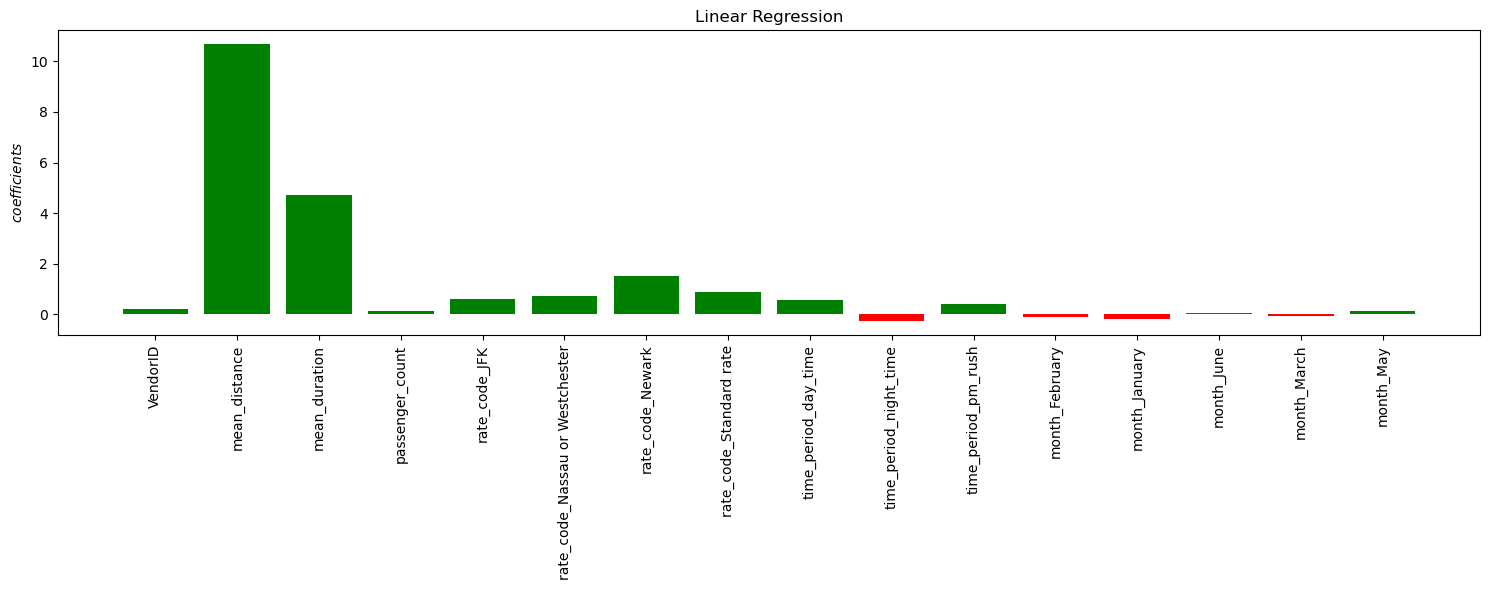

R^2 on training data: 0.913
R^2 on testing data: 0.912


In [165]:
plot_coef(X,LR, name='Linear Regression')

The most important variables are mean distance and mean duration, followed by Newark rate code, with a linear regression $R^2$ alue of 0.91. It’s important to note that the RMSE is $4.80.

### More Complex Models with Grid Search

We decided to evaluate the KNN Regressor, Ridge, Lasso, Random Forest, Extreme Gradient Boosting Regressor, and Light Gradient Boosting Machine Regressor. For metrics, we focused on mean squared error (MSE), mean absolute error (MAE), R-squared $R^2$, and primarily the root mean squared error (RMSE).

In [167]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer
from tqdm import tqdm
import time
import pickle

#### KNN Elbow Method
The elbow method is a technique used to find the optimal number of neighbors ((k)) in a K-Nearest Neighbors (KNN) regressor. The best (k) value is indicated by the lowest error. Initially, the error decreases sharply, and the “elbow” point on the plot is where the error starts to decrease more gradually. This point represents a balance between underfitting and overfitting, indicating the optimal (k) value.

Processing k values: 100%|██████████| 15/15 [1:51:33<00:00, 446.21s/it]


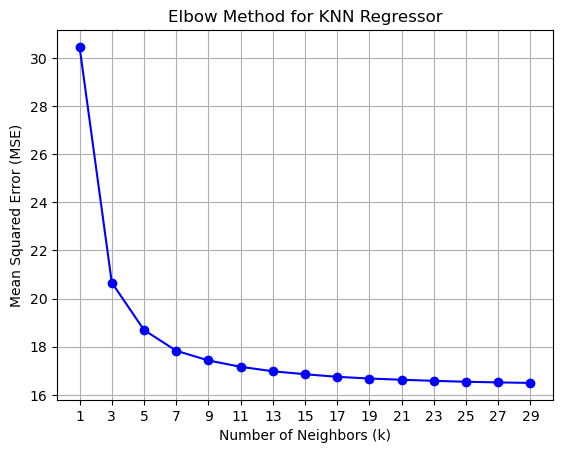

In [131]:
# Define a range of k values to test
k_values = list(range(1, 31, 2))

# Store the error rates for each k
error_rates = []

# Loop over the values of k to compute error
for k in tqdm(k_values, desc="Processing k values"):
    # Initialize the KNN Regressor with k neighbors
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Fit the model on the training data
    knn.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = knn.predict(X_test)
    
    # Compute the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    
    # Append the error (MSE) to the list
    error_rates.append(mse)

# Plot the Elbow Graph
#plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for KNN Regressor')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values) 
plt.grid(True)
plt.show()

The model results improved by increasing the K value, the elbow point would be around 21 to 29.

#### Ridge and Lasso Regression Models
Ridge regression (L2 regularization) and Lasso regression (L1 regularization) are both techniques used to improve linear regression models, particularly when dealing with issues like multicollinearity or overfitting. Ridge regression adds a penalty to the loss function based on the sum of the squared coefficients, which helps to reduce their magnitude but not to zero, thus lowering their variance. This method is useful when you want to keep all predictors in the model but with less influence. In contrast, Lasso regression adds a penalty based on the sum of the absolute values of the coefficients, which can shrink some coefficients to exactly zero. This makes Lasso effective for feature selection, as it can eliminate less important predictors from the model. Both methods aim to enhance the model’s ability to generalize by balancing bias and variance.

We run Ridge and Lasso models across various alpha values, observing the trends in the coefficients and the  $R^2$ values. From these graphs, we will determine the optimal alpha value.

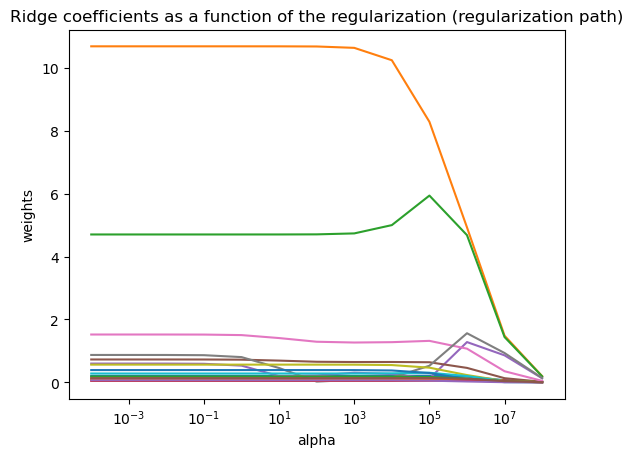

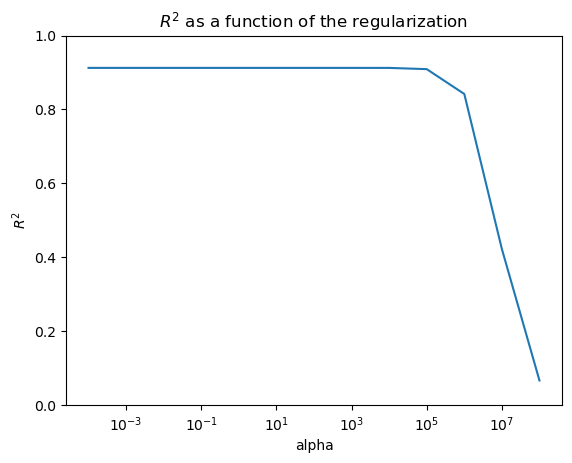

In [169]:
alphas = np.logspace(-4, 8, 13)
R_2=[]
coefs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    coefs.append(abs(ridge.coef_))
    R_2.append(ridge.score(X_test,y_test))


ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization (regularization path)")
plt.show()


ax = plt.gca()
ax.plot(alphas, R_2)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("$R^2$")
plt.title("$R^2$ as a function of the regularization")
plt.ylim(0, 1)
#plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.show()

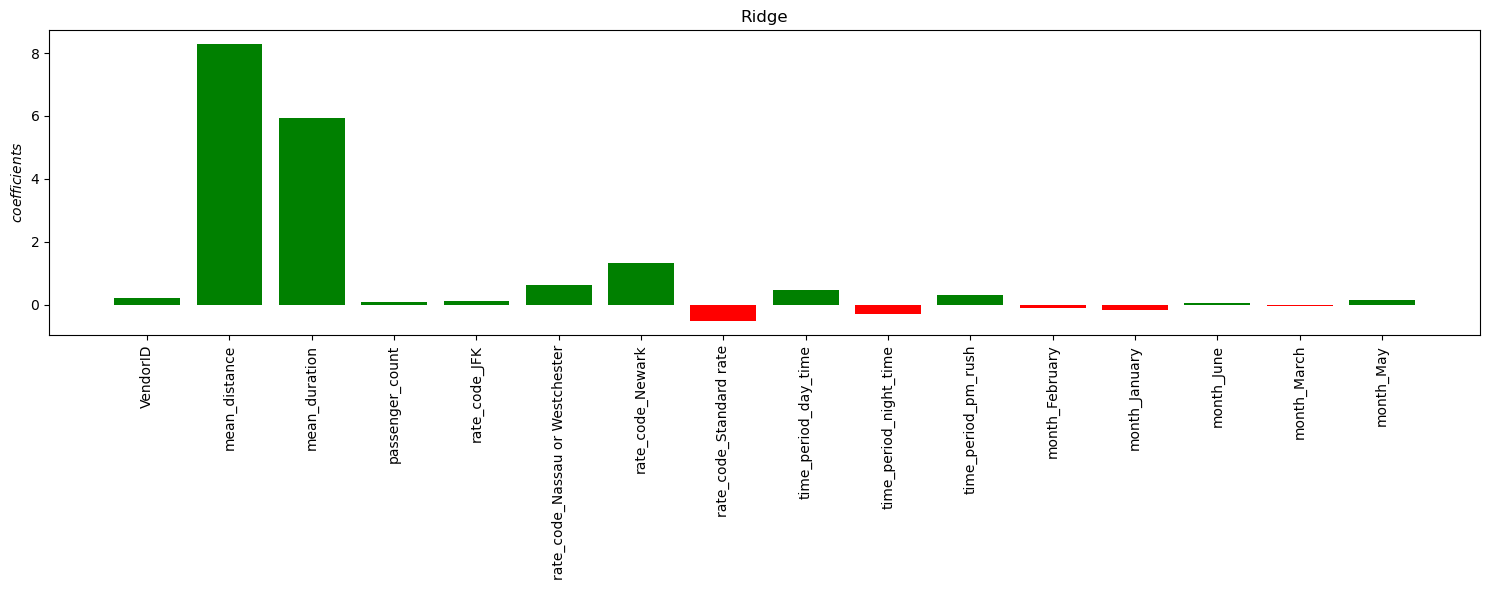

R^2 on training data: 0.909
R^2 on testing data: 0.909


In [170]:
rr = Ridge(alpha=10**5)
rr.fit(X_train, y_train)
plot_coef(X,rr, name='Ridge')

From the graphs, we can see that in the Ridge model, with an alpha value of$10^5$, the $R^2$ score is 0.91. The most significant variables in the model are mean distance, mean duration, and the Newark rate code. Contrary to the linear regression model, the standard rate code has a negative coefficient value.

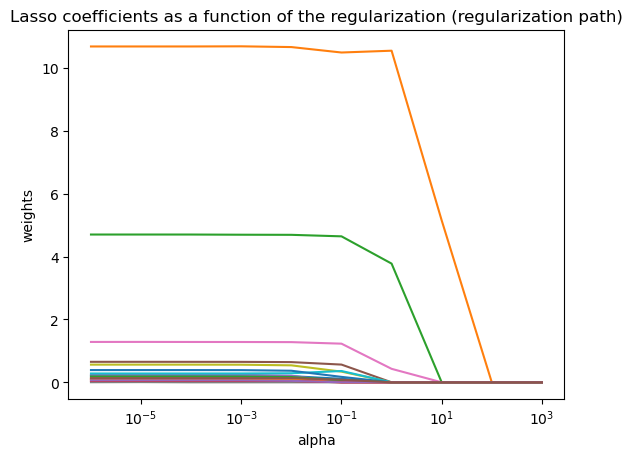

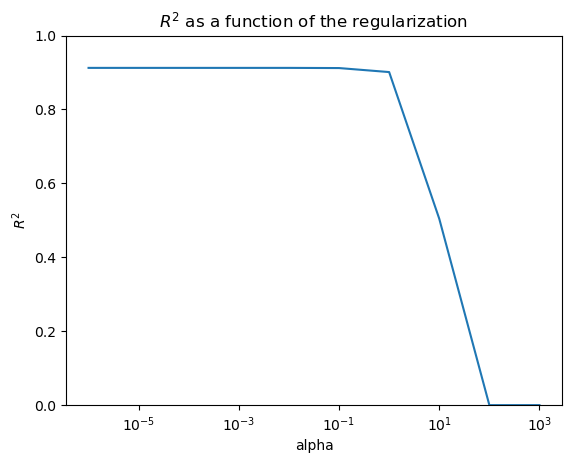

In [172]:
alphas = np.logspace(-6, 3, 10)
R_2=[]
coefs = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    coefs.append(abs(lasso.coef_))
    R_2.append(lasso.score(X_test,y_test))


ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization (regularization path)")
plt.show()


ax = plt.gca()
ax.plot(alphas, R_2)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("$R^2$")
plt.title("$R^2$ as a function of the regularization")
plt.ylim(0, 1)
#plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.show()

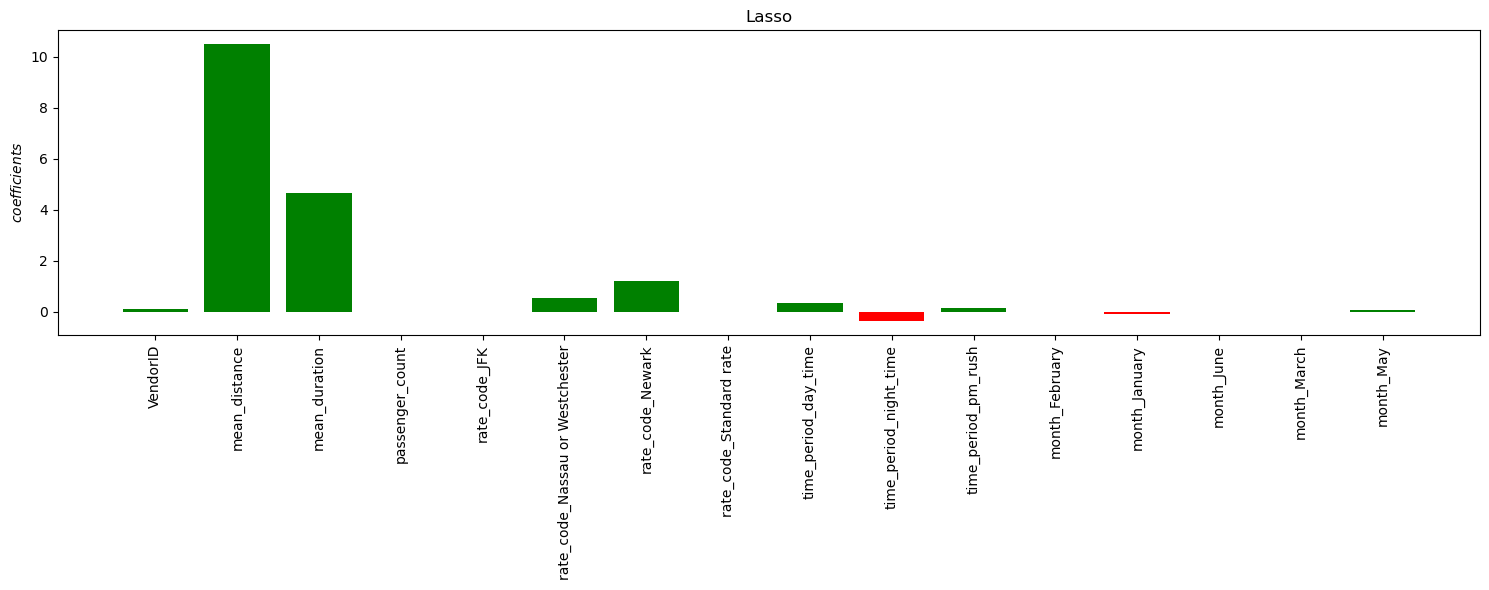

R^2 on training data: 0.912
R^2 on testing data: 0.912


In [173]:
lasso = Lasso(alpha=10**-1)
lasso.fit(X_train, y_train)
plot_coef(X,lasso, name='Lasso')

From the graphs, we observe that in the Lasso model, with an alpha value of $10-1$, the $ R2$ score is 0.91. The key variables influencing the model are mean distance, mean duration, and the Newark rate code. Interestingly, the standard rate code, JFK code, and Months of February and March have coefficients of zero in the Lasso model.

#### GridSearch CV

Rather than evaluating the model's performance on a single training-test split, we use cross-validation to ensure that the selected model generalizes well across different subsets of the data, minimizing the risk of overfitting. Additionally, GridSearch allows us to optimize the model's hyperparameters by systematically testing multiple combinations in a structured manner.

In [133]:
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Ridge': (Ridge(), {'alpha': np.logspace(-4, 8, 13)}),
    'Lasso': (Lasso(), {'alpha': np.logspace(-4, 3, 8)}),
    'Random Forest': (RandomForestRegressor(), {'n_estimators': [50, 100, 200]}),
    'XGBoost':(XGBRegressor(),{'n_estimators': [50, 100, 200]}),
    'Light GBM':(LGBMRegressor(),{'n_estimators': [50, 100, 200],'force_row_wise': [True]}),
    'KNN': (KNeighborsRegressor(), {'n_neighbors': [25,31,37,43]}),
}

**Define a function for evaluating the models**

In [176]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    metrics = {
        'MSE_train': mean_squared_error(y_train, y_train_pred),
        'RMSE_train': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'R2_train': r2_score(y_train, y_train_pred),
        'MAE_train': mean_absolute_error(y_train, y_train_pred),
        'MSE_test': mean_squared_error(y_test, y_test_pred),
        'RMSE_test': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'R2_test': r2_score(y_test, y_test_pred),
        'MAE_test': mean_absolute_error(y_test, y_test_pred)
    }
    return metrics

**Perform grid search and evaluate models**

In [137]:
results = []

for name, (model, params) in tqdm(models.items(), desc="Processing models"):
    grid_search = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error',n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters found: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_
    metrics = evaluate_model(best_model, X_train, y_train, X_test, y_test)
    metrics['Model'] = name
    results.append(metrics)

results_df = pd.DataFrame(results)

Processing models:   0%|          | 0/7 [00:00<?, ?it/s]

Best parameters found: {}


Processing models:  14%|█▍        | 1/7 [00:04<00:24,  4.12s/it]

Best parameters found: {'alpha': 10.0}


Processing models:  29%|██▊       | 2/7 [00:11<00:29,  5.85s/it]

Best parameters found: {'alpha': 0.0001}


Processing models:  43%|████▎     | 3/7 [00:47<01:18, 19.73s/it]

Best parameters found: {'n_estimators': 200}


Processing models:  57%|█████▋    | 4/7 [32:39<38:20, 766.69s/it]

Best parameters found: {'n_estimators': 100}


Processing models:  71%|███████▏  | 5/7 [33:11<16:43, 501.88s/it]

[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 1346258, number of used features: 16
[LightGBM] [Info] Start training from score 18.583861
Best parameters found: {'force_row_wise': True, 'n_estimators': 200}
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 1346258, number of used features: 16
[LightGBM] [Info] Start training from score 18.583861


Processing models:  86%|████████▌ | 6/7 [33:41<05:41, 341.48s/it]

Best parameters found: {'n_neighbors': 37}


Processing models: 100%|██████████| 7/7 [1:29:53<00:00, 770.45s/it] 


In [138]:
results_df = results_df.sort_values('RMSE_test', ascending=True).round(3).reset_index(drop=True)
results_df = results_df.set_index('Model')
results_df

MSE_train  RMSE_train  R2_train  MAE_train  MSE_test  \
Model                                                                     
Light GBM             15.748       3.968     0.939      2.613    15.895   
XGBoost               15.550       3.943     0.940      2.607    15.921   
KNN                   15.707       3.963     0.939      2.594    16.463   
Random Forest         11.363       3.371     0.956      2.227    17.843   
Lasso                 23.063       4.802     0.911      2.937    23.017   
Linear Regression     23.063       4.802     0.911      2.937    23.017   
Ridge                 23.063       4.802     0.911      2.937    23.017   

                   RMSE_test  R2_test  MAE_test  
Model                                            
Light GBM              3.987    0.938     2.618  
XGBoost                3.990    0.938     2.619  
KNN                    4.057    0.936     2.657  
Random Forest          4.224    0.931     2.768  
Lasso                  4.798    0.911     2.937  
Linear Regression      4.798    0.911     2.937  
Ridge                  4.798    0.911     2.937

#### Model Selection and Next Steps

Among the models tested, the **LightGBM** model demonstrated superior performance. Additionally, when considering the running time, the LightGBM model proved to be significantly faster, making it more suitable for this task compared to other models.

Given this advantage, we plan to further explore and fine-tune the hyperparameters of the LightGBM model to optimize its performance. By doing so, we aim to achieve a balance between speed and accuracy, leveraging LightGBM’s efficiency while enhancing its predictive power.


#### Light GBM Hyperparameter Tuning

In [177]:
params = {'n_estimators':[200,300,400,500,600,700],
         'learning_rate':[0.01,0.1,0.2],
         'force_row_wise': [True]}

grid_search = GridSearchCV(LGBMRegressor(), params, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
grid_search.fit(X_train, y_train)

lgb = grid_search.best_estimator_
lgb.fit(X_train,y_train)
y_pred_train = lgb.predict(X_train)
y_pred = lgb.predict(X_test)

[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 1346258, number of used features: 16
[LightGBM] [Info] Start training from score 18.580403
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 1346258, number of used features: 16
[LightGBM] [Info] Start training from score 18.580403


In [178]:
print(f"Best parameters found: {grid_search.best_params_}")

Best parameters found: {'force_row_wise': True, 'learning_rate': 0.1, 'n_estimators': 600}


In [179]:
evaluate_model(lgb, X_train, y_train, X_test, y_test)

[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 1346258, number of used features: 16
[LightGBM] [Info] Start training from score 18.580403


{'MSE_train': 15.378479770043873,
 'RMSE_train': 3.9215404843050994,
 'R2_train': 0.9401586946799949,
 'MAE_train': 2.5948385351545493,
 'MSE_test': 15.710847916272378,
 'RMSE_test': 3.963691198399842,
 'R2_test': 0.9388371014173033,
 'MAE_test': 2.6083944933337797}

The best model has the learning rate of 0.1 and 600 estimator trees. The $R^2$ is almost 0.94, and the RMSE is $3.96.

**Create a datafram of all predicted values**

In [182]:
predictions_df = pd.DataFrame(index=X.index)

predictions_df.loc[train_indices, 'Predictions'] = y_pred_train
predictions_df.loc[test_indices, 'Predictions'] = y_pred

predictions_df = predictions_df.sort_index()

predictions_df.to_csv('fare_prediction.csv', index=True)

print("CSV file saved successfully!")

CSV file saved successfully!


**Save the Model**

In [184]:
model = lgb

# Save the model to a file
with open('lgb-reg-model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")

Model saved successfully!


**Results Visuals**

In [186]:
lgb_results = pd.DataFrame(data={'actual': y_test,
                             'predicted': y_pred.ravel()})
lgb_results['residual'] = lgb_results['actual'] - lgb_results['predicted']
lgb_results.head()

actual  predicted  residual
14259714    17.7  15.810767  1.889233
4280267      5.8   9.474523 -3.674523
3328205     20.5  23.760769 -3.260769
6974168     30.3  35.391541 -5.091541
3447297     12.8  10.482083  2.317917

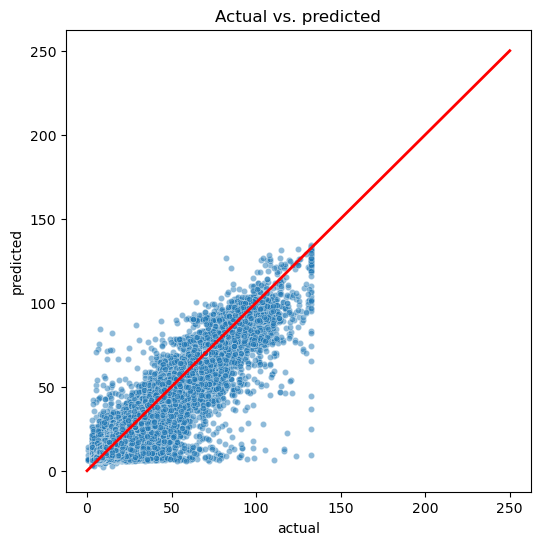

In [187]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
#sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=lgb_results,
                s=20,
                alpha=0.5,
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,250], [0,250], c='red', linewidth=2)
plt.title('Actual vs. predicted')
plt.show();

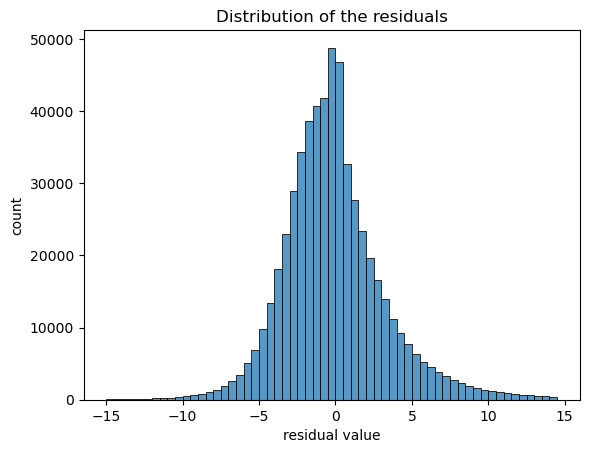

In [188]:
sns.histplot(lgb_results['residual'], bins=np.arange(-15,15,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count')
plt.show();

In [189]:
lgb_results['residual'].mean()

0.0248715604732908

The distribution of the residuals is approximately normal and has a mean of 0.025. The residuals represent the variance in the outcome variable that is not explained by the model. A normal distribution around zero is good, as it demonstrates that the model's errors are evenly distributed and unbiased.

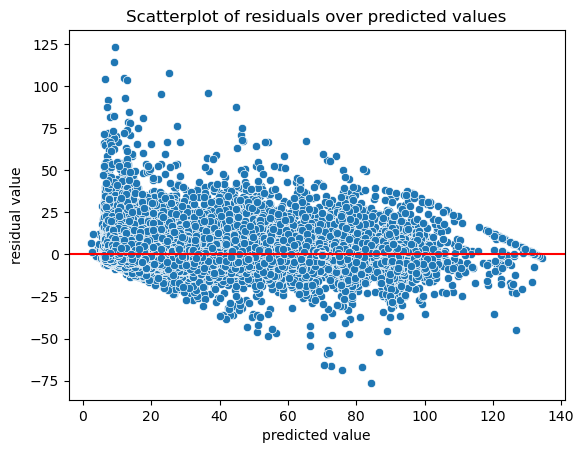

In [191]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=lgb_results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

The model's residuals are evenly distributed above and below zero, with the exception of the sloping lines from the upper-left corner to the lower-right corner, which you know are the imputed maximum of \\$250 and the flat rate of \\$70 for JFK airport trips.

In [193]:
feature_importances = lgb.feature_importances_

feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df

Feature  Importance
1                     mean_distance        5188
2                     mean_duration        5059
3                   passenger_count        1325
8              time_period_day_time         876
9            time_period_night_time         876
10              time_period_pm_rush         727
15                        month_May         542
0                          VendorID         518
13                       month_June         499
12                    month_January         493
14                      month_March         455
11                   month_February         356
7           rate_code_Standard rate         329
4                     rate_code_JFK         313
6                  rate_code_Newark         239
5   rate_code_Nassau or Westchester         205

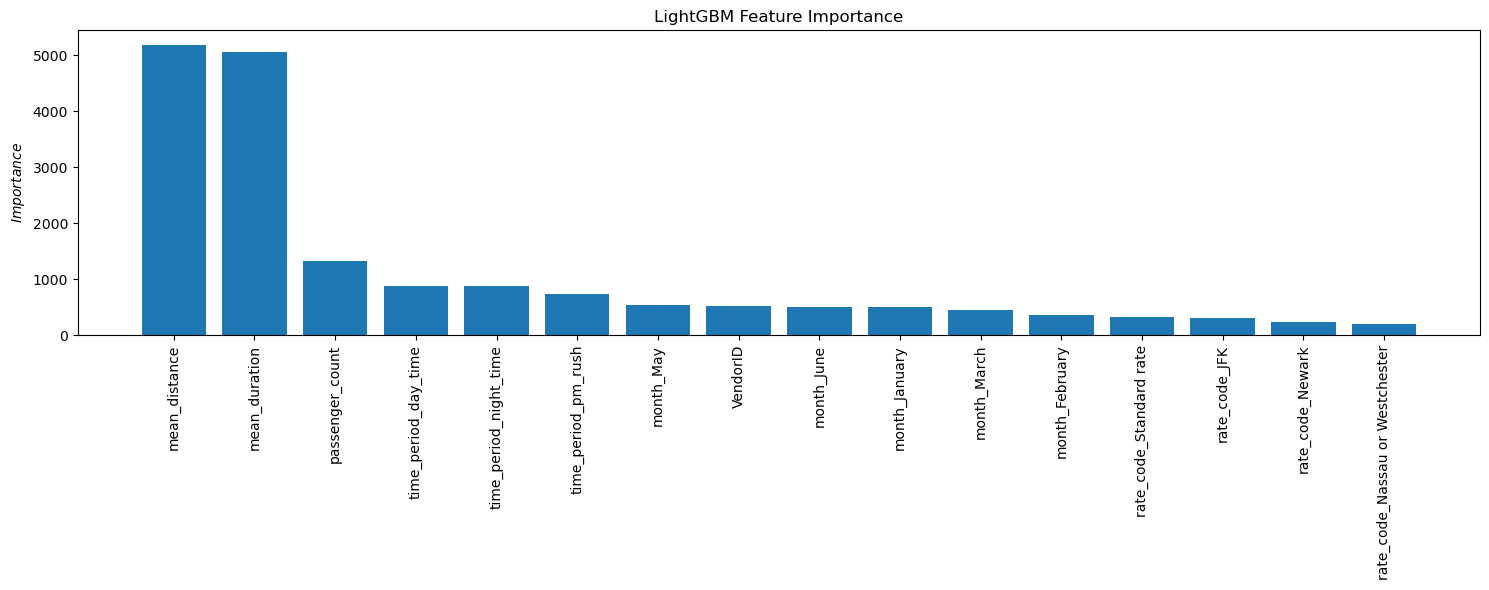

In [194]:
# Plot feature importances
plt.figure(figsize=(15,6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.ylabel("$Importance$")
plt.title('LightGBM Feature Importance')
plt.tight_layout()
plt.show()

Interestingly, in the LightGBM model, mean duration emerges as the most important factor, followed by mean distance as the second most important, with passenger count ranking third. These results differ from the rankings observed in the linear model.

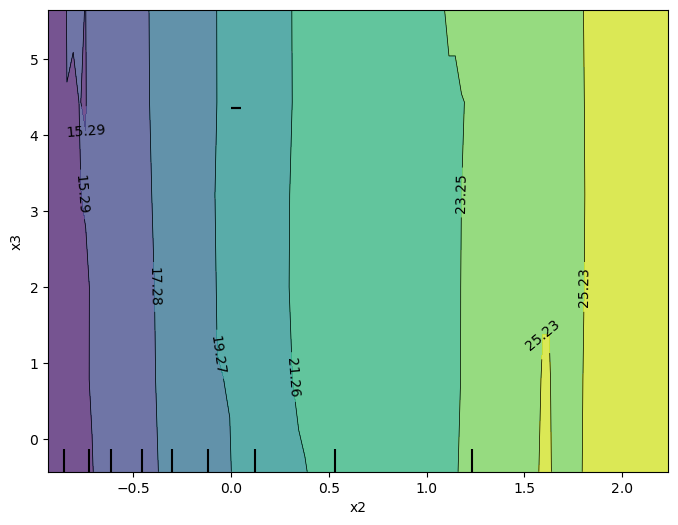

In [196]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

# Features to plot partial dependence for
features_to_plot = [(2, 3)]  # 2D plot for features at index 0 and 1

# Plot 2D partial dependence for those features
fig, ax = plt.subplots(figsize=(8, 6))

# This will plot the 2D partial dependence plot for the chosen features
PartialDependenceDisplay.from_estimator(lgb, X_train, features_to_plot, ax=ax)

plt.show()

## Classification

Our goal is to create a machine learning model that identifies the most generous tippers. This approach seeks to help taxi drivers maximize their tip earnings while ensuring fair access to taxi services for all customers, avoiding any unintended bias or exclusion.

### Imports and data loading

In [283]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from xgboost import plot_importance

from lightgbm import LGBMClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (f1_score, accuracy_score , precision_score , recall_score , 
                             precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay, 
                             classification_report, auc, roc_auc_score, roc_curve , precision_recall_curve)

import pickle

### Define the functions for evaluation, confusion Matrix, and ROC curves

In [286]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    fpr, tpr, thresholds = roc_curve(yt, yp, pos_label=1)
    results_pos['AUC']=auc(fpr, tpr)
    return results_pos

In [288]:
def get_confusion_matrix (y_pred, y_test , model):
    sns.set_context('paper')
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=model.classes_)
    disp.plot(values_format='')
    plt.show()

In [290]:
def get_roc_curves (X_test, y_test , model):
    sns.set_context('talk')
    fig, axList = plt.subplots(ncols=2)
    fig.set_size_inches(16, 8)
    
    # Get the probabilities for each of the two categories
    y_prob = model.predict_proba(X_test)

    # Plot the ROC-AUC curve
    ax = axList[0]
    fpr, tpr, thresholds_roc = roc_curve(y_test, y_prob[:,1])
    
    ax.plot(fpr, tpr, linewidth=5)
    # It is customary to draw a diagonal dotted line in ROC plots for random performance
    ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
    ax.set(xlabel='False Positive Rate',
           ylabel='True Positive Rate',
           xlim=[-.01, 1.01], ylim=[-.01, 1.01],
           title='ROC curve')
    ax.grid(True)

    # Plot the precision-recall curve
    ax = axList[1]
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob[:,1])
    ax.plot(recall, precision, linewidth=5)
    ax.set(xlabel='Recall', ylabel='Precision',
           xlim=[-.01, 1.01], ylim=[-.01, 1.01],
           title='Precision-Recall curve')
    ax.grid(True)

    # Compute F1 scores for each threshold in Precision-Recall curve
    f1_scores = 2 * (precision * recall) / (precision + recall)
    f1_scores = np.nan_to_num(f1_scores)  # Replace NaN with 0
    best_threshold_index = np.argmax(f1_scores)
    
    # Since thresholds are shorter by one, use best_threshold_index + 1 for precision and recall
    best_threshold = thresholds_pr[best_threshold_index]
    best_f1_score = f1_scores[best_threshold_index]

    # Plot the red dot for the best threshold on the Precision-Recall curve
    ax.plot(recall[best_threshold_index], precision[best_threshold_index], 'ro', label=f'Best Threshold: {best_threshold:.2f}', zorder=5)
    
    # Optional: Add a legend to display the best threshold on Precision-Recall curve
    ax.legend(loc='best')

    # Now, let's add the corresponding point to the ROC curve

    # Find the closest threshold on the ROC curve to the best threshold from the Precision-Recall curve
    best_threshold_roc_index = np.argmin(np.abs(thresholds_roc - best_threshold))

    # Get FPR and TPR for this threshold
    best_fpr = fpr[best_threshold_roc_index]
    best_tpr = tpr[best_threshold_roc_index]

    # Plot the red dot for the best threshold on the ROC curve
    axList[0].plot(best_fpr, best_tpr, 'ro', label=f'Best Threshold: {best_threshold:.2f}', zorder=5)
    
    # Optional: Add a legend to display the best threshold on ROC curve
    axList[0].legend(loc='best')

    # Print the best threshold and F1 score for debugging or output purposes
    print(f'Best Threshold: {best_threshold}')
    print(f'Best F1 Score: {best_f1_score}')
    
    plt.tight_layout()
    plt.show()

### Isolate modeling variables

we drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [293]:
data =lyft.copy()
columns = ['VendorID', 'rate_code','passenger_count','mean_distance', 'mean_duration', 'day','month','time_period','PULocationID','DOLocationID','fare_amount','generous']
data =lyft[columns]
data = data[data['rate_code'] != 'Negotiated fare']

In [295]:
print(df.shape, data.shape)

(1923226, 17) (1923226, 12)


Since we need to determine whether a customer is generous at the start of the trip, we don’t have access to the actual fare amount. However, we can use the predictions from our regression model to estimate the fare amount and incorporate it into our model to assess a customer's generosity.

**Load our Saved Regression Model, $X$ and StandardScaler**

In [299]:
# #Regression Model
# with open('lgb-reg-model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)

# lgb = loaded_model
# print("Model loaded successfully!")

# #Standard Scaler
# ss = joblib.load('standard_scaler.pkl')

# print("StandardScaler loaded successfully!")

# #X Dataset
# X = pd.read_csv('X_regression.csv')

**Transform The $X$ and create the predicted `Prediction`** 

Notice that $X$ is the dataset we used in the regression section, and `ss` refers to the `StandardScaler` that was previously fitted and applied to $X_{\text{train}}$. Now, we use the same scaler to transform the entire $X$ dataset, preparing it for use in the best regression model we identified earlier.


In [302]:
#predictions_df = pd.read_csv('fare_prediction.csv', index=True)

In [304]:
data = data.merge(predictions_df, left_index=True, right_index=True)

In [305]:
# Define thresholds
data = data[(data['mean_distance'] >0) & (data['mean_duration'] >0) & (data['fare_amount'] >0)]

In [308]:
data.head()

VendorID      rate_code  passenger_count  mean_distance  \
6277555          2  Standard rate                1           2.66   
12331145         2  Standard rate                1           1.71   
15021017         1  Standard rate                1           0.97   
6385001          1  Standard rate                1           1.23   
5034703          2  Standard rate                2           0.74   

          mean_duration       day     month time_period  PULocationID  \
6277555           16.06  Thursday     March  night_time           142   
12331145          13.23    Sunday       May  night_time            97   
15021017           9.26    Friday       May     pm_rush           161   
6385001           11.69    Friday     March  night_time           230   
5034703            6.12  Saturday  February    day_time           234   

          DOLocationID  fare_amount  generous  Predictions  
6277555            262         14.9         1    15.727713  
12331145           181          9.3         0    12.406030  
15021017           170         12.1         0    10.394897  
6385001            170         13.5         1    10.321526  
5034703             90         10.0         1     7.922087

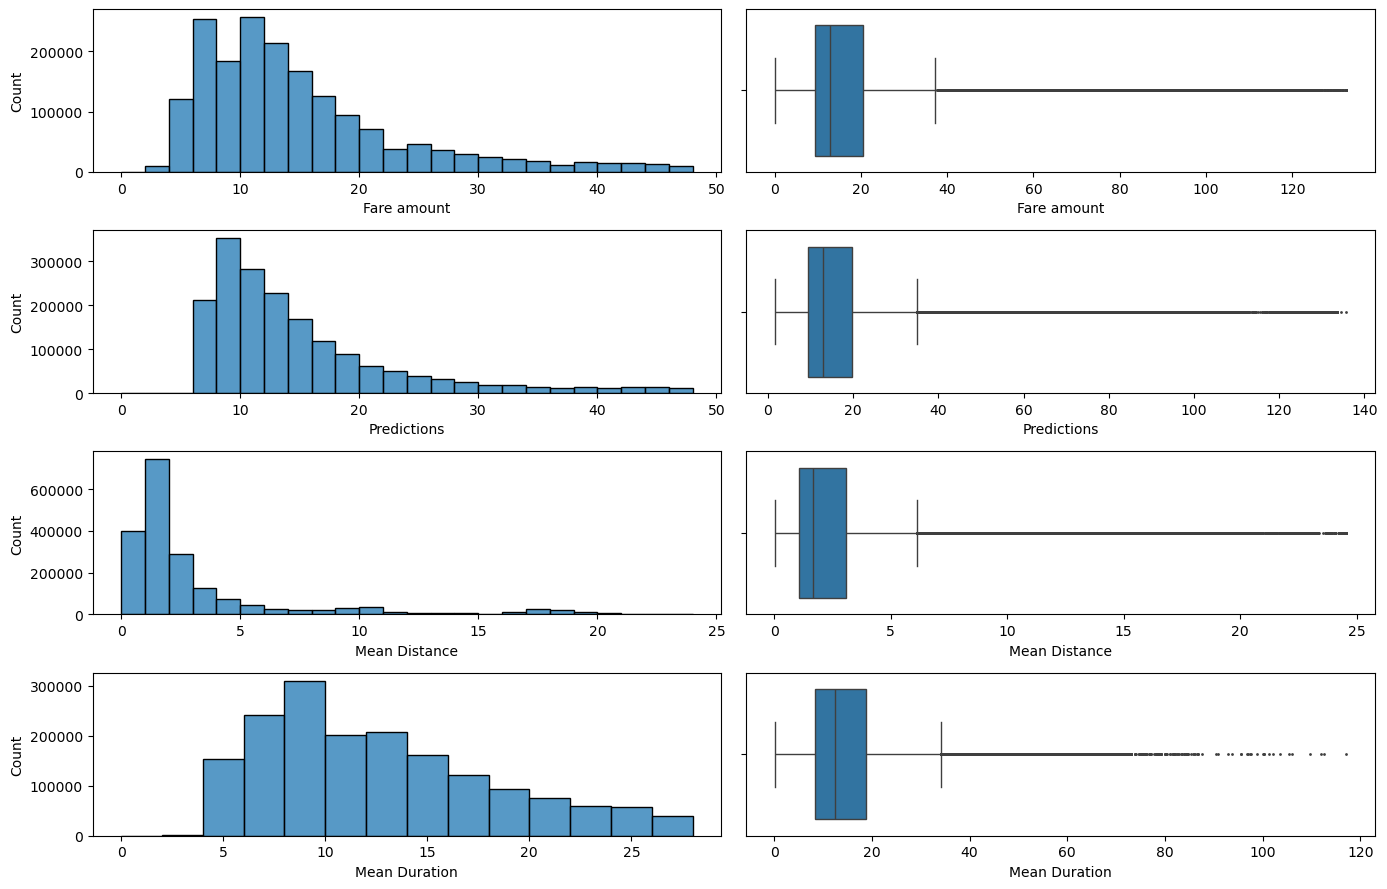

In [310]:
fig, axes = plt.subplots(4,2, figsize=(14,9))

axes= axes.flatten()

sns.histplot(data['fare_amount'] , ax= axes[0] , bins=range(0,50,2))
axes[0].set(xlabel="Fare amount")

sns.boxplot(x=data['fare_amount'] , ax = axes[1] ,fliersize=1)
axes[1].set(xlabel="Fare amount")

sns.histplot(data['Predictions'] , ax= axes[2] , bins=range(0,50,2))
axes[2].set(xlabel="Predictions")

sns.boxplot(x=data['Predictions'] , ax = axes[3] ,fliersize=1)
axes[3].set(xlabel="Predictions")

sns.histplot(data['mean_distance'] , ax= axes[4] ,bins=range(0,25,1))
axes[4].set(xlabel="Mean Distance")

sns.boxplot(x=data['mean_distance'] , ax = axes[5] ,fliersize=1)
axes[5].set(xlabel="Mean Distance")


sns.histplot(data['mean_duration'] , ax= axes[6] ,bins=range(0,30,2))
axes[6].set(xlabel="Mean Duration")

sns.boxplot(x=data['mean_duration'] , ax = axes[7] ,fliersize=1)
axes[7].set(xlabel="Mean Duration")

plt.tight_layout()
plt.show()

In [311]:
# # Define the categorization function
# def categorize(value, thresholds):
#     if value <= thresholds[0]:
#         return 1
#     elif value <= thresholds[1]:
#         return 2
#     else:
#         return 3

In [312]:
# data['fare_p_category'] = data['Predictions'].apply(categorize, thresholds=(10, 20))
# data['distance_category'] = data['mean_distance'].apply(categorize, thresholds=(5000,20000))
# data['duration_category'] = data['mean_duration'].apply(categorize, thresholds=(10,20))

In [313]:
data.head()

VendorID      rate_code  passenger_count  mean_distance  \
6277555          2  Standard rate                1           2.66   
12331145         2  Standard rate                1           1.71   
15021017         1  Standard rate                1           0.97   
6385001          1  Standard rate                1           1.23   
5034703          2  Standard rate                2           0.74   

          mean_duration       day     month time_period  PULocationID  \
6277555           16.06  Thursday     March  night_time           142   
12331145          13.23    Sunday       May  night_time            97   
15021017           9.26    Friday       May     pm_rush           161   
6385001           11.69    Friday     March  night_time           230   
5034703            6.12  Saturday  February    day_time           234   

          DOLocationID  fare_amount  generous  Predictions  
6277555            262         14.9         1    15.727713  
12331145           181          9.3         0    12.406030  
15021017           170         12.1         0    10.394897  
6385001            170         13.5         1    10.321526  
5034703             90         10.0         1     7.922087

#### Variable encoding

In [315]:
data_uniques = data.nunique().to_frame().rename(columns={0:'Unique Values'})
data_uniques

Unique Values
VendorID                     2
rate_code                    5
passenger_count              6
mean_distance             2117
mean_duration             4882
day                          7
month                        6
time_period                  4
PULocationID               239
DOLocationID               257
fare_amount                474
generous                     2
Predictions             273578

In [316]:
binary_columns = ['VendorID']

dummy_columns = ['rate_code','day','month','time_period','PULocationID','DOLocationID']

In [317]:
data = pd.get_dummies(data, columns=dummy_columns , drop_first=True , dtype='int')

In [318]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in binary_columns:
    data[column] = le.fit_transform(data[column])
data.head()

VendorID  passenger_count  mean_distance  mean_duration  \
6277555          1                1           2.66          16.06   
12331145         1                1           1.71          13.23   
15021017         0                1           0.97           9.26   
6385001          0                1           1.23          11.69   
5034703          1                2           0.74           6.12   

          fare_amount  generous  Predictions  rate_code_JFK  \
6277555          14.9         1    15.727713              0   
12331145          9.3         0    12.406030              0   
15021017         12.1         0    10.394897              0   
6385001          13.5         1    10.321526              0   
5034703          10.0         1     7.922087              0   

          rate_code_Nassau or Westchester  rate_code_Newark  \
6277555                                 0                 0   
12331145                                0                 0   
15021017                                0                 0   
6385001                                 0                 0   
5034703                                 0                 0   

          rate_code_Standard rate  day_Tuesday  day_Wednesday  day_Thursday  \
6277555                         1            0              0             1   
12331145                        1            0              0             0   
15021017                        1            0              0             0   
6385001                         1            0              0             0   
5034703                         1            0              0             0   

          day_Friday  day_Saturday  day_Sunday  month_February  month_March  \
6277555            0             0           0               0            1   
12331145           0             0           1               0            0   
15021017           1             0           0               0            0   
6385001            1             0           0               0            1   
5034703            0             1           0               1            0   

          month_April  month_May  month_June  time_period_day_time  \
6277555             0          0           0                     0   
12331145            0          1           0                     0   
15021017            0          1           0                     0   
6385001             0          0           0                     0   
5034703             0          0           0                     1   

          time_period_night_time  time_period_pm_rush  PULocationID_3  \
6277555                        1                    0               0   
12331145                       1                    0               0   
15021017                       0                    1               0   
6385001                        1                    0               0   
5034703                        0                    0               0   

          PULocationID_4  PULocationID_6  PULocationID_7  PULocationID_8  \
6277555                0               0               0               0   
12331145               0               0               0               0   
15021017               0               0               0               0   
6385001                0               0               0               0   
5034703                0               0               0               0   

          PULocationID_9  PULocationID_10  PULocationID_11  PULocationID_12  \
6277555                0                0                0                0   
12331145               0                0                0                0   
15021017               0                0                0                0   
6385001                0                0                0                0   
5034703                0                0                0                0   

          PULocationID_13  PULocationID_14  PULocationID_15  PULocationID_16  \
6277555        

In [319]:
data.drop(['fare_amount'], axis=1 , inplace=True)

In [320]:
# data.drop(['fare_amount','mean_distance','mean_duration','Predictions'], axis=1 , inplace=True)

In [325]:
data.head()

VendorID  passenger_count  mean_distance  mean_duration  generous  \
6277555          1                1           2.66          16.06         1   
12331145         1                1           1.71          13.23         0   
15021017         0                1           0.97           9.26         0   
6385001          0                1           1.23          11.69         1   
5034703          1                2           0.74           6.12         1   

          Predictions  rate_code_JFK  rate_code_Nassau or Westchester  \
6277555     15.727713              0                                0   
12331145    12.406030              0                                0   
15021017    10.394897              0                                0   
6385001     10.321526              0                                0   
5034703      7.922087              0                                0   

          rate_code_Newark  rate_code_Standard rate  day_Tuesday  \
6277555                  0                        1            0   
12331145                 0                        1            0   
15021017                 0                        1            0   
6385001                  0                        1            0   
5034703                  0                        1            0   

          day_Wednesday  day_Thursday  day_Friday  day_Saturday  day_Sunday  \
6277555               0             1           0             0           0   
12331145              0             0           0             0           1   
15021017              0             0           1             0           0   
6385001               0             0           1             0           0   
5034703               0             0           0             1           0   

          month_February  month_March  month_April  month_May  month_June  \
6277555                0            1            0          0           0   
12331145               0            0            0          1           0   
15021017               0            0            0          1           0   
6385001                0            1            0          0           0   
5034703                1            0            0          0           0   

          time_period_day_time  time_period_night_time  time_period_pm_rush  \
6277555                      0                       1                    0   
12331145                     0                       1                    0   
15021017                     0                       0                    1   
6385001                      0                       1                    0   
5034703                      1                       0                    0   

          PULocationID_3  PULocationID_4  PULocationID_6  PULocationID_7  \
6277555                0               0               0               0   
12331145               0               0               0               0   
15021017               0               0               0               0   
6385001                0               0               0               0   
5034703                0               0               0               0   

          PULocationID_8  PULocationID_9  PULocationID_10  PULocationID_11  \
6277555                0               0                0                0   
12331145               0               0                0                0   
15021017               0               0                0                0   
6385001                0               0                0                0   
5034703                0               0                0                0   

          PULocationID_12  PULocationID_13  PULocationID_14  PULocationID_15  \
6277555                 0                0                0                0   
12331145                0                0                0                0   
15021017                0                0                0                0   
6385001                 0   

In [329]:
data['generous'].value_counts(normalize=True)

generous
1    0.502379
0    0.497621
Name: proportion, dtype: float64

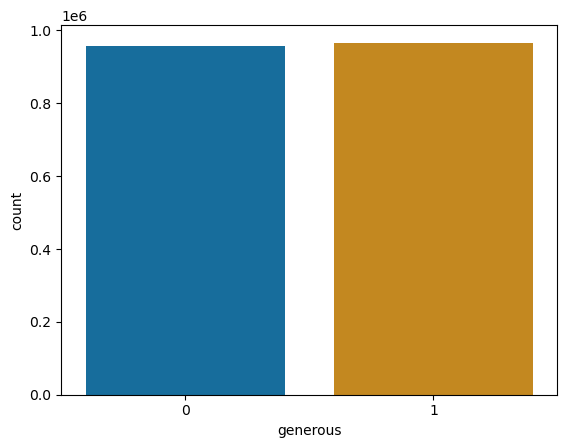

In [333]:
# Set a color palette
palette = sns.color_palette("colorblind", len(data['generous'].unique()))
sns.countplot(x=data['generous'],palette=palette)
plt.show();

### Split The Data and Scale the X

In [337]:
target = 'generous'

X = data.drop(target,axis=1)
y = data[target]

In [339]:
feature_cols = list(X.columns)

In [341]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=0)

print ('Train set', X_train.shape,  y_train.shape)
print ('Test set', X_test.shape,  y_test.shape)

Train set (1346258, 517) (1346258,)
Test set (576968, 517) (576968,)


In [342]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train= ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Logistic Regression model

In [346]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

evaluate_metrics(y_test,y_pred)

{'accuracy': 0.6123563178547163,
 'recall': 0.784648833113166,
 'precision': 0.5861244879813746,
 'f1score': 0.6710108644169017,
 'AUC': 0.6110298797394809}

#### Confusion Matrix

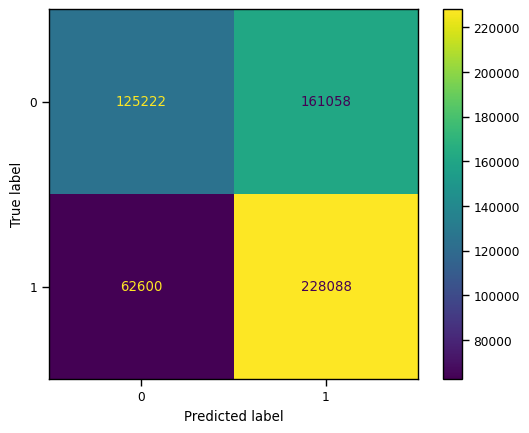

In [349]:
get_confusion_matrix(y_pred, y_test, lr)

The classifier predicts a high number of `1`s, evident from the large number of false positives (FP). Recall is **0.78**, meaning the model correctly identifies 78% of the actual `1`s. This is useful if missing true positives (generous riders) is costly for the taxi drivers. 

Precision is **0.59**, meaning nearly half of the predicted `1`s are incorrect. This indicates many false positives. The F1 score balances precision and recall but is skewed by the low precision. The Area Under the Curve (AUC) is slightly better than random guessing (50%), suggesting poor separability between classes. 

As a result, instead of using the default threshold of 0.5, we experiment with different thresholds to improve the F1 score.


#### ROC Curves

Best Threshold: 0.3734414217874636
Best F1 Score: 0.68266497931728


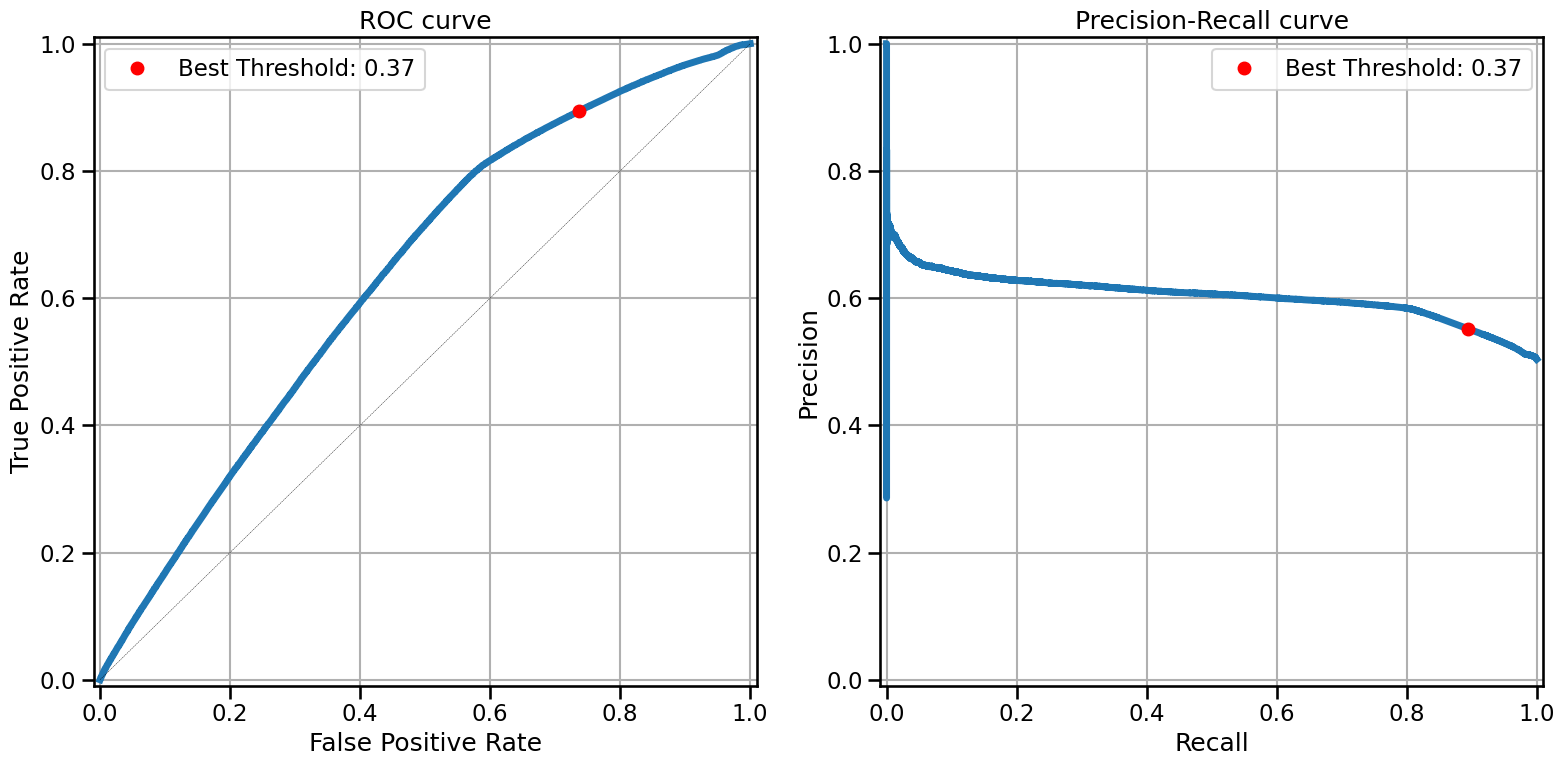

In [353]:
get_roc_curves (X_test, y_test , lr)

#### Finding the New Treshhold

In [356]:
y_prob = lr.predict_proba(X_test)[:, 1]

#Apply the new threshold
best_threshold = 0.37
new_threshold = best_threshold  # Use the best threshold you found from Precision-Recall curve
y_pred_new = (y_prob >= new_threshold).astype(int)  # Convert probabilities to 0/1 predictions

#### New Treshhold Results

In [359]:
evaluate_metrics(y_test,y_pred_new)

{'accuracy': 0.5777166151329016,
 'recall': 0.9012136723910171,
 'precision': 0.5493227091633466,
 'f1score': 0.6825849283730334,
 'AUC': 0.5752260900728314}

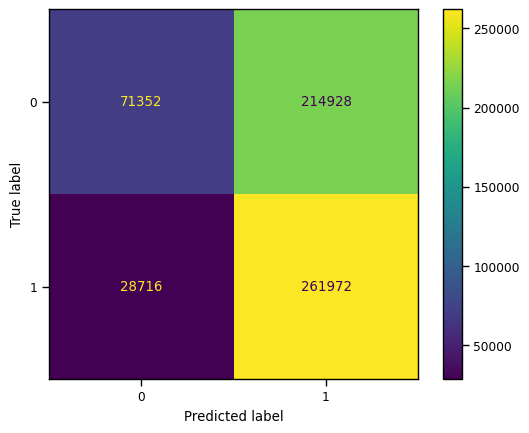

In [361]:
get_confusion_matrix(y_pred_new, y_test, lr)

Although there is a slight improvement in the F1 Score, the accuracy and precision have worsened. Therefore, the original model remains the better choice.

**Final Results**

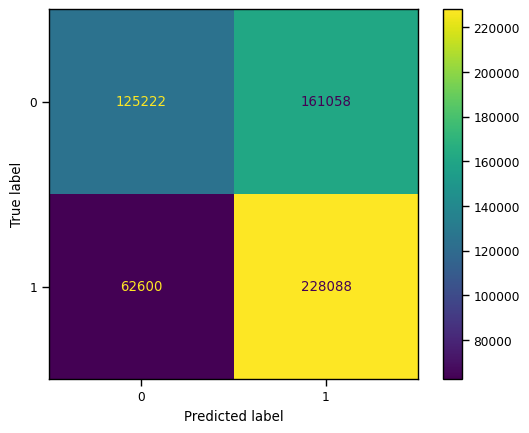

In [366]:
get_confusion_matrix(y_pred, y_test, lr)

**Define The Function to Extract and sort feature coefficients**

In [369]:
def get_feature_coefs(regression_model, label_index, columns , threshold=0.5):
    coef_dict = {}
    for coef, feat in zip(regression_model.coef_[label_index, :], columns):
        if abs(coef) >= threshold:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

# Generate bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualize coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

***Most Important Coefficients***

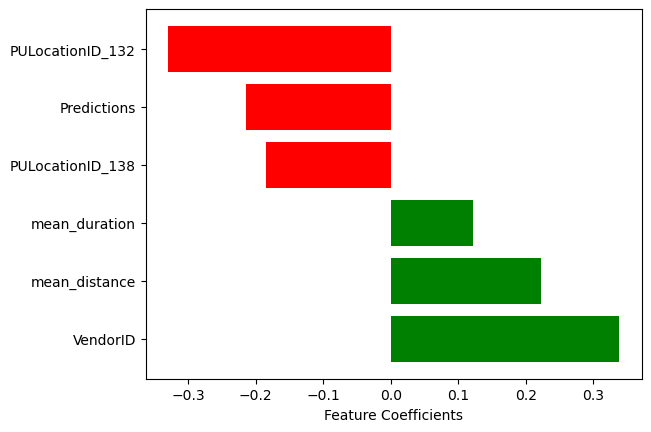

In [372]:
coef_dict = get_feature_coefs(lr, 0, feature_cols , 0.1)
visualize_coefs(coef_dict)

### More Complex Models

In [714]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'Naive Bayes': GaussianNB()
}

In [720]:
results = []

for name, model in tqdm(models.items(), desc="Processing models"):
    try:
        # Perform cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='f1', n_jobs=-1)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Evaluate metrics
        metrics = evaluate_metrics(y_test, y_pred)
        metrics['Model'] = name
        metrics['CV Mean F1 Score'] = cv_scores.mean()
        metrics['CV Std Dev'] = cv_scores.std()
        
        results.append(metrics)
    except Exception as e:
        print(f"Error processing model {name}: {e}")

# Create a DataFrame with the results
results_df = pd.DataFrame(results)

Processing models:  67%|██████▋   | 4/6 [3:43:51<1:34:14, 2827.28s/it]

[LightGBM] [Info] Number of positive: 675456, number of negative: 670802
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.347908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1999
[LightGBM] [Info] Number of data points in the train set: 1346258, number of used features: 413
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501728 -> initscore=0.006914
[LightGBM] [Info] Start training from score 0.006914


Processing models: 100%|██████████| 6/6 [3:45:19<00:00, 2253.33s/it]  


In [721]:
results_df = results_df.sort_values(by='f1score', ascending=False).reset_index(drop=True)
results_df = results_df.set_index('Model')
results_df

accuracy    recall  precision   f1score       AUC  \
Model                                                                    
XGBoost              0.614119  0.805347   0.585005  0.677716  0.612658   
Naive Bayes          0.519693  0.987433   0.512087  0.674418  0.516120   
Logistic Regression  0.612349  0.784506   0.586117  0.670954  0.611034   
LightGBM             0.610959  0.763358   0.587676  0.664095  0.609795   
Random Forest        0.565522  0.590465   0.565933  0.577939  0.565331   
K-Nearest Neighbors  0.550133  0.579817   0.550843  0.564959  0.549906   

                     CV Mean F1 Score  CV Std Dev  
Model                                              
XGBoost                      0.675581    0.000380  
Naive Bayes                  0.672555    0.000135  
Logistic Regression          0.669456    0.000348  
LightGBM                     0.662473    0.001475  
Random Forest                0.573158    0.001015  
K-Nearest Neighbors          0.561542    0.001078

Among the models, **XGBoost** has the highest accuracy, F1 score, and AUC. The standard deviation of the F1 score is fairly low, indicating that the model is well-generalized and not overfitted. 

We further investigate two models for fine-tuning:
1. **Light GBM**
2. **XGBoost**


#### Light GBM Hyperparameter Tuning

In [447]:
cv_params = {
    'n_estimators': [500, 600, 700],
    'learning_rate': [0.1, 0.2],
    'force_row_wise': [True],
    'min_child_weight': [1, 2, 3],

}

# Create the classifier
lgb = LGBMClassifier()

grid_search = GridSearchCV(estimator=lgb, param_grid=cv_params, scoring='precision', cv=3, n_jobs=-1)

# Fit the grid search to the data 
grid_search.fit(X_train, y_train.values.ravel())

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


[LightGBM] [Info] Number of positive: 675500, number of negative: 670758
[LightGBM] [Info] Total Bins 1999
[LightGBM] [Info] Number of data points in the train set: 1346258, number of used features: 413
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501761 -> initscore=0.007045
[LightGBM] [Info] Start training from score 0.007045
Best Parameters: {'force_row_wise': True, 'learning_rate': 0.2, 'min_child_weight': 1, 'n_estimators': 600}
Best Score: 0.5876678078111591


In [451]:
best_lgb= grid_search.best_estimator_

y_pred = best_lgb.predict(X_test)

lgb_evaluate = evaluate_metrics(y_test,y_pred)
lgb_evaluate

{'accuracy': 0.6106196530830132,
 'recall': 0.7437699526640247,
 'precision': 0.5901081385002538,
 'f1score': 0.6580881793416227,
 'AUC': 0.6095945613536695}

**Save The Model**

In [456]:
model = best_lgb

# Save the model to a file
with open('lgb-class-model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")

Model saved successfully!


#### Confusion Matrix

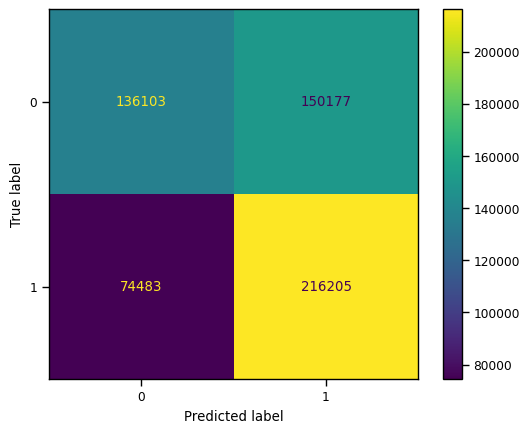

In [387]:
get_confusion_matrix(y_pred, y_test, best_lgb)

#### ROC Curves

Best Threshold: 0.3479289872925246
Best F1 Score: 0.6875751894029946


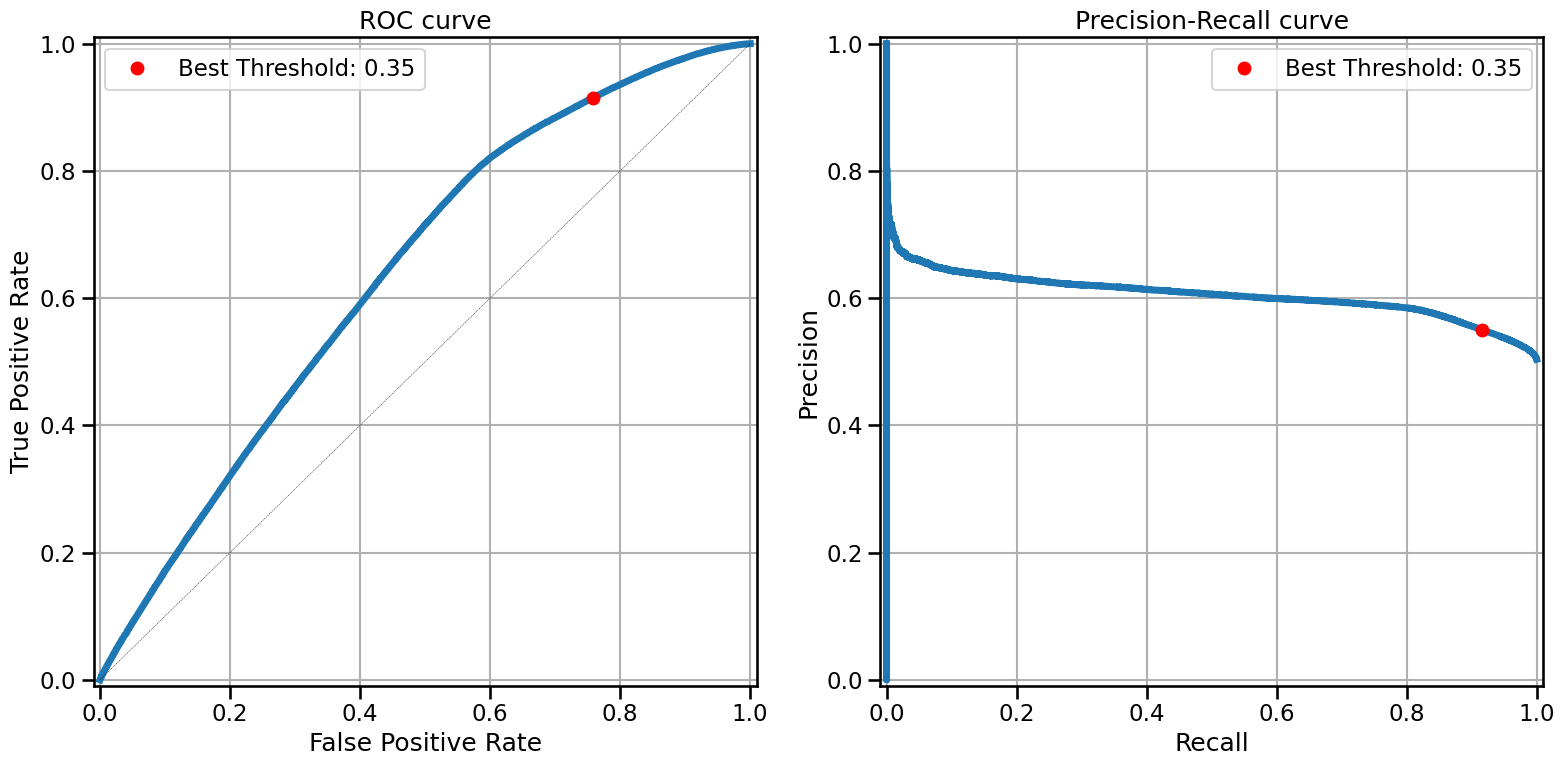

In [389]:
get_roc_curves (X_test, y_test , best_lgb)

#### Finding the New Treshhold

In [391]:
y_prob = best_lgb.predict_proba(X_test)[:, 1]

#Apply the new threshold
best_threshold = 0.35
new_threshold = best_threshold  # Use the best threshold you found from Precision-Recall curve
y_pred_new = (y_prob >= new_threshold).astype(int)  # Convert probabilities to 0/1 predictions

evaluate_metrics(y_test,y_pred_new)

{'accuracy': 0.58259383536002,
 'recall': 0.9113895310435931,
 'precision': 0.5519352002699989,
 'f1score': 0.6875137863472992,
 'AUC': 0.5800625173731309}

#### New Treshhold Results

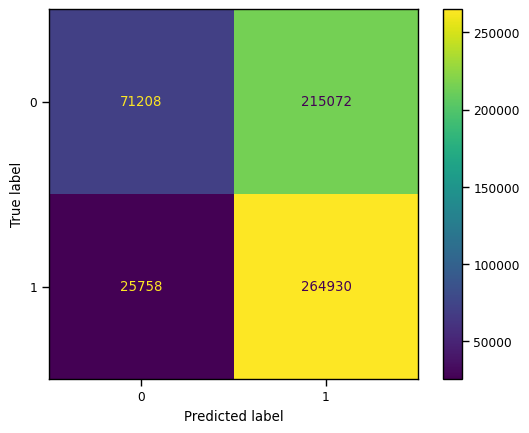

In [392]:
get_confusion_matrix(y_pred_new, y_test, best_lgb)

#### Feature Importance Plot

In [395]:
def get_feature_importance(model, columns, threshold=0.5):
    if not hasattr(model, 'feature_importances_'):
        raise AttributeError("The model does not have a feature_importances_ attribute.")
    
    if len(model.feature_importances_) != len(columns):
        raise ValueError("The length of model.feature_importances_ and columns must match.")
    
    importance_dict = {}
    for coef, feat in zip(model.feature_importances_, columns):
        if abs(coef) >= threshold:
            importance_dict[feat] = coef
    
    importance_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}
    return importance_dict

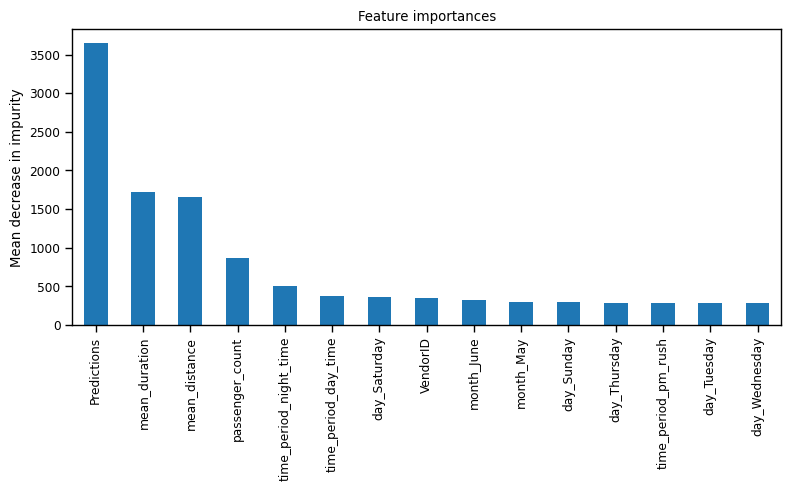

In [397]:
importances = best_lgb.feature_importances_
lgb_importances = pd.Series(importances, index=X.columns)
lgb_importances = lgb_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
lgb_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

The important factors are fare prediction, mean duration and mean distance, and passenger counts.

#### XGBoost Hyperparameter Tuning

In [400]:
# Create the classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

cv_params = {
    'learning_rate': [0.1, 0.2],
    'min_child_weight': [1, 2, 3],
    'n_estimators': [500, 600, 700]
}


# Instantiate the grid search model
grid_search = GridSearchCV(estimator=xgb, param_grid=cv_params, scoring='precision', cv=3)



# Fit the grid search to the data 
grid_search.fit(X_train, y_train.values.ravel())

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.2, 'min_child_weight': 3, 'n_estimators': 700}
Best Score: 0.5859482358100436


In [443]:
best_xgb = grid_search.best_estimator_

y_pred = best_xgb.predict(X_test)

xgb_evaluate = evaluate_metrics(y_test,y_pred)
xgb_evaluate

{'accuracy': 0.6147359992235272,
 'recall': 0.7861728038309115,
 'precision': 0.5879987341088203,
 'f1score': 0.6727960821200358,
 'AUC': 0.6134161490161963}

**Save The Model**

In [458]:
model = best_xgb

# Save the model to a file
with open('xgb-class-model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")

Model saved successfully!


#### Confusion Matrix

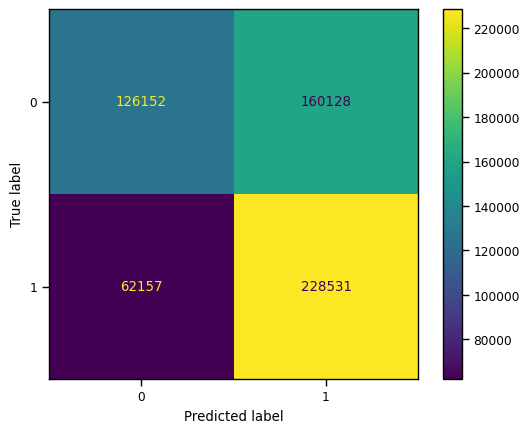

In [404]:
get_confusion_matrix(y_pred, y_test, best_xgb)

#### ROC Curves

Best Threshold: 0.3450974225997925
Best F1 Score: 0.6889039756115326


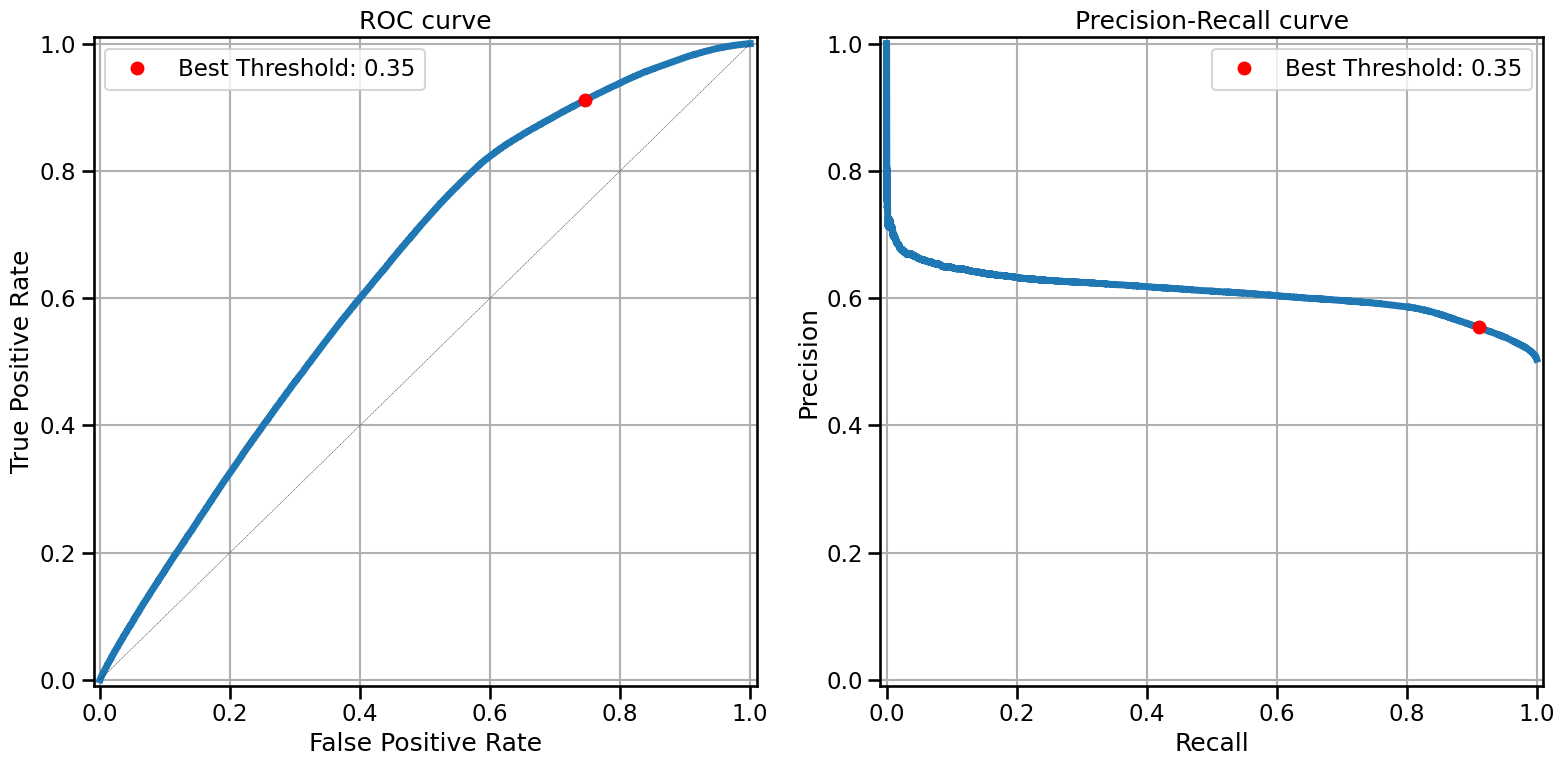

In [405]:
get_roc_curves (X_test, y_test , best_xgb)

#### Finding the New Treshhold

In [428]:
y_prob = best_xgb.predict_proba(X_test)[:, 1]

#Apply the new threshold
best_threshold = 0.35
new_threshold = best_threshold  # Use the best threshold you found from Precision-Recall curve
y_pred_new = (y_prob >= new_threshold).astype(int)  # Convert probabilities to 0/1 predictions

evaluate_metrics(y_test,y_pred_new)

{'accuracy': 0.5883913839242384,
 'recall': 0.9037008751651255,
 'precision': 0.5563367902970645,
 'f1score': 0.6886973619531378,
 'AUC': 0.5859638929409531}

#### New Treshhold Results

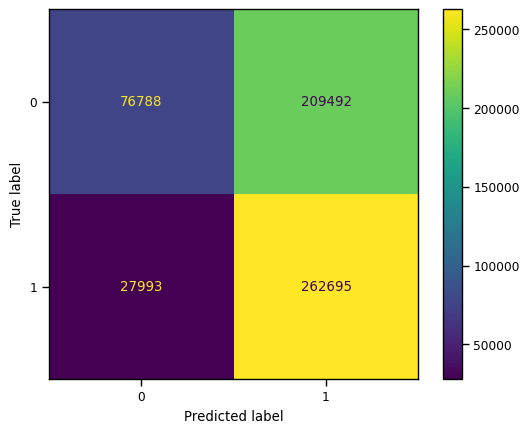

In [430]:
get_confusion_matrix(y_pred_new, y_test, best_xgb)

#### Feature Importance Plot

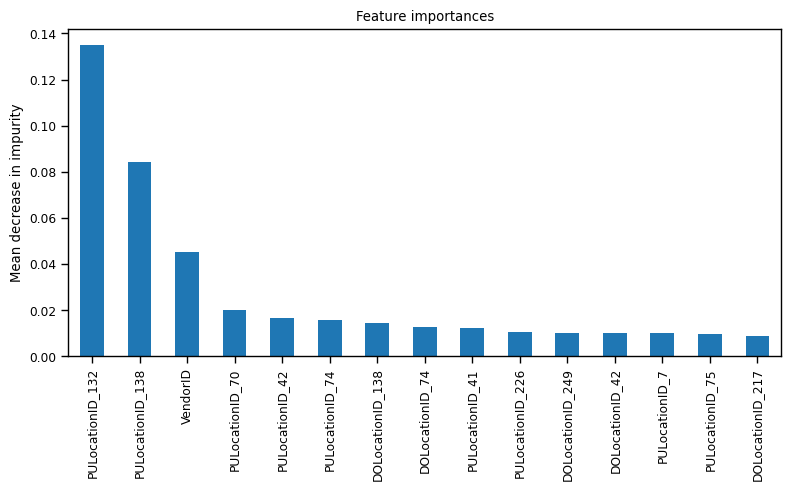

In [434]:
importances = best_xgb.feature_importances_
xgb_importances = pd.Series(importances, index=X.columns)
xgb_importances = xgb_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
xgb_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

Foe XGB model, the location are much more important in the final outcome.

### Final Results Comparison

In [453]:
final_results = list()

final_results.append(pd.Series(lgb_evaluate,
                           name='Light GBM'))

final_results.append(pd.Series(xgb_evaluate,
                           name='XGBoost'))

# Assemble the results
final_results = pd.concat(final_results, axis=1)
final_results

Light GBM   XGBoost
accuracy    0.610620  0.614736
recall      0.743770  0.786173
precision   0.590108  0.587999
f1score     0.658088  0.672796
AUC         0.609595  0.613416

The models show fairly similar performance, although the important factors influencing each model differ. As a result, stacking the models might help us achieve better overall performance.

### Stacking Model

In [465]:
from sklearn.ensemble import VotingClassifier

# The combined model--logistic regression,XGBoost and Light GBM 
estimators = [('LR', lr), ('XGB', best_xgb), ('LGBM',best_lgb )]

# Though it wasn't done here, it is often desirable to train 
# this model using an additional hold-out data set and/or with cross validation
VC = VotingClassifier(estimators, voting='soft')
VC = VC.fit(X_train, y_train)

y_pred = VC.predict(X_test)

VC_evaluate = evaluate_metrics(y_test,y_pred)
VC_evaluate

[LightGBM] [Info] Number of positive: 675500, number of negative: 670758
[LightGBM] [Info] Total Bins 1999
[LightGBM] [Info] Number of data points in the train set: 1346258, number of used features: 413
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501761 -> initscore=0.007045
[LightGBM] [Info] Start training from score 0.007045


{'accuracy': 0.6138988644084248,
 'recall': 0.7771115422721269,
 'precision': 0.588466528079526,
 'f1score': 0.6697590436460993,
 'AUC': 0.6126423297500078}

**SAVE The Model**

In [466]:
model = VC

# Save the model to a file
with open('VC-class-model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")

Model saved successfully!


### Confusion Matrix

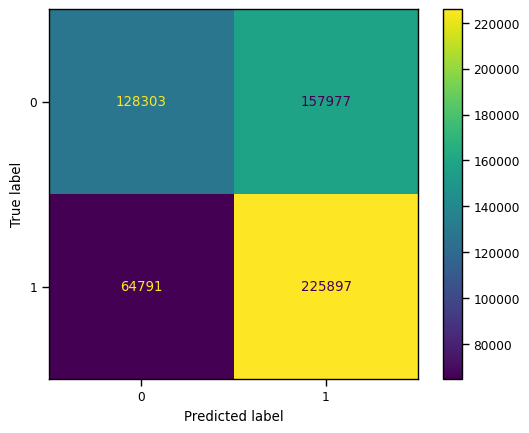

In [468]:
get_confusion_matrix(y_pred, y_test, VC)

Best Threshold: 0.35499024913955957
Best F1 Score: 0.6885605670572205


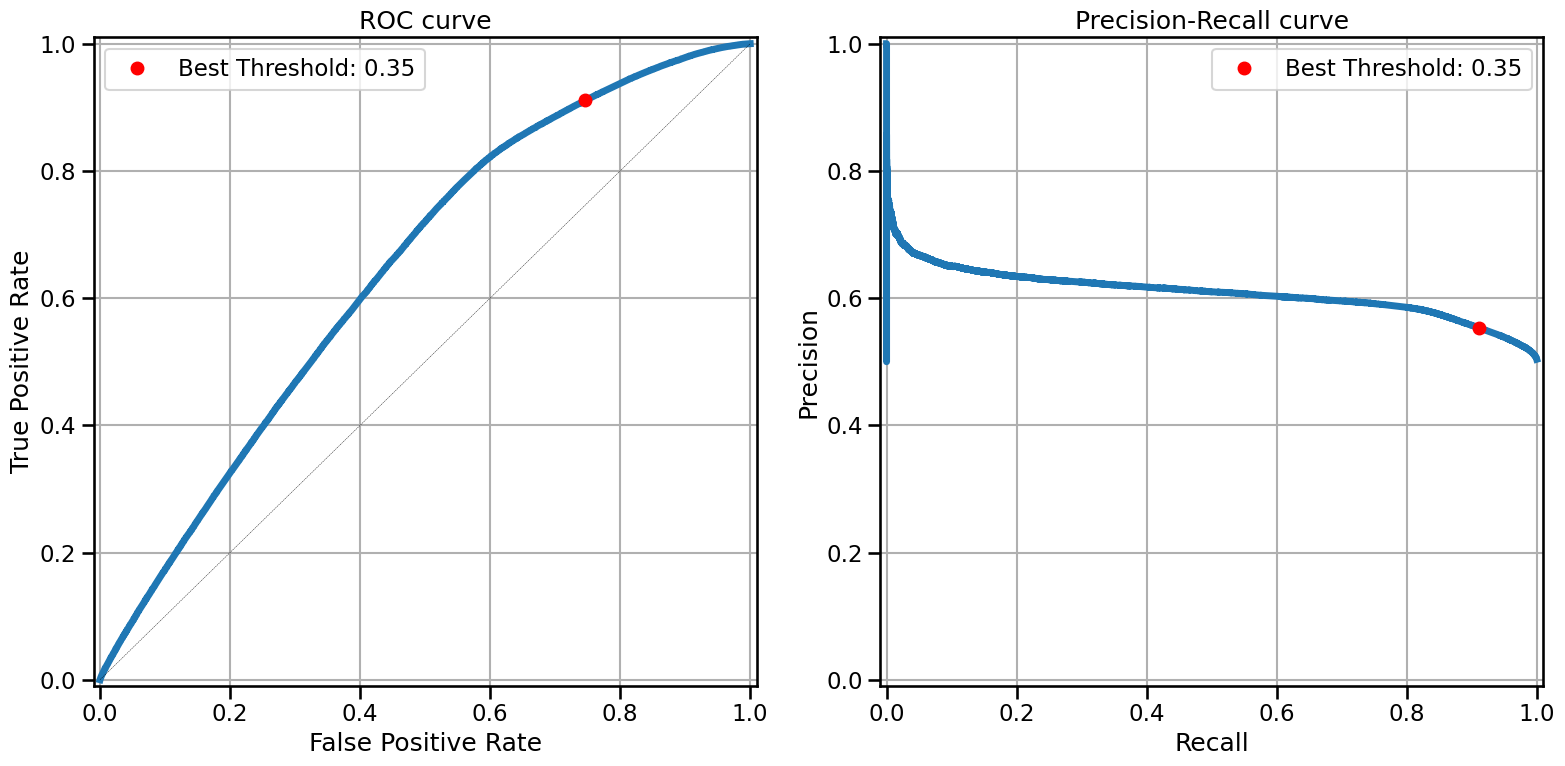

In [474]:
get_roc_curves (X_test, y_test , VC)

Using the satcking model marginally helped but it was not significant.